## Churn Risk prediction

<b>Problem statement</b>

No business can thrive without it’s customers. On the flip side, customers leaving the business is a nightmare that every business owner dreads!

In fact, one of the key metrics to measure a business’ success is by measuring its customer churn rate - the lower the churn, the more loved the company is. 

Typically, every user of a product or a service is assigned a prediction value that estimates their state of churn at any given time. This value may be based on multiple factors such as the user’s demographic, their browsing behavior and historical purchase data, among other details.

This value factors in unique and proprietary predictions of how long a user will remain a customer and is updated every day for all users who have purchased at least one of the products/services. The values assigned are between 1 and 5.

<b>Task</b>

An up-and-coming startup is keen on reducing its customer churn and has hired you as a Machine Learning engineer for this task. As an expert, you are required to build a sophisticated Machine Learning model that predicts the churn score for a website based on multiple features.

<b>Dataset</b>

The dataset consists of parameters such as the user’s demographic and PII details, membership account details, duration and frequency of their visits to the website, reported grievances and feedback, and the like.

The benefits of practicing this problem by using Machine Learning techniques are as follows:

This challenge encourages you to apply your Machine Learning skills to build a model that predicts a user’s churn score.


Churn Risk Prediction
Churn risk prediction is the process of identifying customers who are likely to stop using a product or service in the future. It is a key aspect of customer retention strategies, particularly in industries like telecom, banking, e-commerce, and SaaS (Software as a Service).

How It Works:
Data Collection:

Customer demographics (age, location, income, etc.)
Transaction history (purchases, frequency, spending habits)
Usage behavior (login frequency, feature usage, service interactions)
Customer support interactions (complaints, feedback, ticket resolution)
Feature Engineering:

Calculate customer lifetime value (CLV)
Identify behavioral patterns (active vs. inactive users)
Track engagement metrics (response time, website visits, etc.)
Machine Learning Model Training:

Supervised Learning Models (Logistic Regression, Decision Trees, Random Forest, XGBoost)
Deep Learning Models (LSTMs, Neural Networks for complex patterns)
Anomaly Detection (Isolation Forest, Autoencoders)
Prediction & Insights:

Model assigns a churn probability score to each customer
High-risk customers are flagged for proactive retention strategies
Insights help businesses tailor personalized offers and engagement strategies


## import libraries

In [363]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [364]:
df = pd.read_csv("dataset/train.csv")
df.head()

customer_id              Name  age gender  \
0      fffe4300490044003600300030003800   Pattie Morrisey   18      F   
1  fffe43004900440032003100300035003700       Traci Peery   32      F   
2      fffe4300490044003100390032003600   Merideth Mcmeen   44      F   
3  fffe43004900440036003000330031003600  Eufemia Cardwell   37      M   
4  fffe43004900440031003900350030003600      Meghan Kosak   31      F   

  security_no region_category  membership_category joining_date  \
0     XW0DQ7H         Village  Platinum Membership   2017-08-17   
1     5K0N3X1            City   Premium Membership   2017-08-28   
2     1F2TCL3            Town        No Membership   2016-11-11   
3     VJGJ33N            City        No Membership   2016-10-29   
4     SVZXCWB            City        No Membership   2017-09-12   

  joined_through_referral referral_id  ... avg_time_spent  \
0                      No    xxxxxxxx  ...         300.63   
1                       ?    CID21329  ...         306.34   
2                     Yes    CID12313  ...         516.16   
3                     Yes     CID3793  ...          53.27   
4                      No    xxxxxxxx  ...         113.13   

  avg_transaction_value avg_frequency_login_days points_in_wallet  \
0              53005.25                     17.0           781.75   
1              12838.38                     10.0              NaN   
2              21027.00                     22.0           500.69   
3              25239.56                      6.0           567.66   
4              24483.66                     16.0           663.06   

   used_special_discount  offer_application_preference  past_complaint  \
0                    Yes                           Yes              No   
1                    Yes                            No             Yes   
2                     No                           Yes             Yes   
3                     No                           Yes             Yes   
4                     No                           Yes             Yes   

      complaint_status                  feedback churn_risk_score  
0       Not Applicable  Products always in Stock                2  
1               Solved     Quality Customer Care                1  
2  Solved in Follow-up              Poor Website                5  
3             Unsolved              Poor Website                5  
4               Solved              Poor Website                5  

[5 rows x 25 columns]

In [365]:
df.shape

(36992, 25)

In [366]:
df.describe()

age  days_since_last_login  avg_time_spent  \
count  36992.000000           36992.000000    36992.000000   
mean      37.118161             -41.915576      243.472334   
std       15.867412             228.819900      398.289149   
min       10.000000            -999.000000    -2814.109110   
25%       23.000000               8.000000       60.102500   
50%       37.000000              12.000000      161.765000   
75%       51.000000              16.000000      356.515000   
max       64.000000              26.000000     3235.578521   

       avg_transaction_value  points_in_wallet  churn_risk_score  
count           36992.000000      33549.000000      36992.000000  
mean            29271.194003        686.882199          3.463397  
std             19444.806226        194.063624          1.409661  
min               800.460000       -760.661236         -1.000000  
25%             14177.540000        616.150000          3.000000  
50%             27554.485000        697.620000          4.000000  
75%             40855.110000        763.950000          5.000000  
max             99914.050000       2069.069761          5.000000

In [367]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36992 entries, 0 to 36991
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   customer_id                   36992 non-null  object 
 1   Name                          36992 non-null  object 
 2   age                           36992 non-null  int64  
 3   gender                        36992 non-null  object 
 4   security_no                   36992 non-null  object 
 5   region_category               31564 non-null  object 
 6   membership_category           36992 non-null  object 
 7   joining_date                  36992 non-null  object 
 8   joined_through_referral       36992 non-null  object 
 9   referral_id                   36992 non-null  object 
 10  preferred_offer_types         36704 non-null  object 
 11  medium_of_operation           36992 non-null  object 
 12  internet_option               36992 non-null  object 
 13  l

In [368]:
df.isnull().sum()

customer_id                        0
Name                               0
age                                0
gender                             0
security_no                        0
region_category                 5428
membership_category                0
joining_date                       0
joined_through_referral            0
referral_id                        0
preferred_offer_types            288
medium_of_operation                0
internet_option                    0
last_visit_time                    0
days_since_last_login              0
avg_time_spent                     0
avg_transaction_value              0
avg_frequency_login_days           0
points_in_wallet                3443
used_special_discount              0
offer_application_preference       0
past_complaint                     0
complaint_status                   0
feedback                           0
churn_risk_score                   0
dtype: int64

In [369]:
df.columns

Index(['customer_id', 'Name', 'age', 'gender', 'security_no',
       'region_category', 'membership_category', 'joining_date',
       'joined_through_referral', 'referral_id', 'preferred_offer_types',
       'medium_of_operation', 'internet_option', 'last_visit_time',
       'days_since_last_login', 'avg_time_spent', 'avg_transaction_value',
       'avg_frequency_login_days', 'points_in_wallet', 'used_special_discount',
       'offer_application_preference', 'past_complaint', 'complaint_status',
       'feedback', 'churn_risk_score'],
      dtype='object')

In [370]:
type(df['Name'])

pandas.core.series.Series

In [371]:
df['Name']

0         Pattie Morrisey
1             Traci Peery
2         Merideth Mcmeen
3        Eufemia Cardwell
4            Meghan Kosak
               ...       
36987            Cuc Tarr
36988      Jenni Stronach
36989       Luciana Kinch
36990       Tawana Ardoin
36991    Verlene Beaulieu
Name: Name, Length: 36992, dtype: object

In [372]:
df[['Name', 'internet_option']]

Name internet_option
0       Pattie Morrisey           Wi-Fi
1           Traci Peery     Mobile_Data
2       Merideth Mcmeen           Wi-Fi
3      Eufemia Cardwell     Mobile_Data
4          Meghan Kosak     Mobile_Data
...                 ...             ...
36987          Cuc Tarr           Wi-Fi
36988    Jenni Stronach           Wi-Fi
36989     Luciana Kinch           Wi-Fi
36990     Tawana Ardoin     Mobile_Data
36991  Verlene Beaulieu     Mobile_Data

[36992 rows x 2 columns]

In [373]:
df.internet_option.value_counts()

internet_option
Wi-Fi          12413
Mobile_Data    12343
Fiber_Optic    12236
Name: count, dtype: int64

In [374]:
df['internet_option'].value_counts()

internet_option
Wi-Fi          12413
Mobile_Data    12343
Fiber_Optic    12236
Name: count, dtype: int64

### handle missing data

In [375]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36992 entries, 0 to 36991
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   customer_id                   36992 non-null  object 
 1   Name                          36992 non-null  object 
 2   age                           36992 non-null  int64  
 3   gender                        36992 non-null  object 
 4   security_no                   36992 non-null  object 
 5   region_category               31564 non-null  object 
 6   membership_category           36992 non-null  object 
 7   joining_date                  36992 non-null  object 
 8   joined_through_referral       36992 non-null  object 
 9   referral_id                   36992 non-null  object 
 10  preferred_offer_types         36704 non-null  object 
 11  medium_of_operation           36992 non-null  object 
 12  internet_option               36992 non-null  object 
 13  l

In [376]:
df.region_category.mode()[0]

'Town'

In [377]:
# filling categorical missing column
df['region_category'] = df['region_category'].fillna(df['region_category'].mode()[0])
df['preferred_offer_types'] = df['preferred_offer_types'].fillna(df['preferred_offer_types'].mode()[0])



In [378]:
import numpy as np

# Replace empty strings with NaN
df[['region_category', 'preferred_offer_types']] = df[['region_category', 'preferred_offer_types']].replace("", np.nan)

# Fill missing values with mode
df['region_category'] = df['region_category'].fillna(df['region_category'].mode()[0])
df['preferred_offer_types'] = df['preferred_offer_types'].fillna(df['preferred_offer_types'].mode()[0])



In [379]:
# handle numerical missing column
df['points_in_wallet'] = df['points_in_wallet'].fillna(df['points_in_wallet'].mean())



In [380]:
print(df['preferred_offer_types'].isnull().sum())

0


In [381]:
print(df['points_in_wallet'].isnull().sum())  


0


In [382]:
df.isnull().sum()

customer_id                     0
Name                            0
age                             0
gender                          0
security_no                     0
region_category                 0
membership_category             0
joining_date                    0
joined_through_referral         0
referral_id                     0
preferred_offer_types           0
medium_of_operation             0
internet_option                 0
last_visit_time                 0
days_since_last_login           0
avg_time_spent                  0
avg_transaction_value           0
avg_frequency_login_days        0
points_in_wallet                0
used_special_discount           0
offer_application_preference    0
past_complaint                  0
complaint_status                0
feedback                        0
churn_risk_score                0
dtype: int64

In [383]:
df.describe()

age  days_since_last_login  avg_time_spent  \
count  36992.000000           36992.000000    36992.000000   
mean      37.118161             -41.915576      243.472334   
std       15.867412             228.819900      398.289149   
min       10.000000            -999.000000    -2814.109110   
25%       23.000000               8.000000       60.102500   
50%       37.000000              12.000000      161.765000   
75%       51.000000              16.000000      356.515000   
max       64.000000              26.000000     3235.578521   

       avg_transaction_value  points_in_wallet  churn_risk_score  
count           36992.000000      36992.000000      36992.000000  
mean            29271.194003        686.882199          3.463397  
std             19444.806226        184.811682          1.409661  
min               800.460000       -760.661236         -1.000000  
25%             14177.540000        624.350000          3.000000  
50%             27554.485000        686.882199          4.000000  
75%             40855.110000        757.002500          5.000000  
max             99914.050000       2069.069761          5.000000

#### data analysis

In [384]:
df.head()

customer_id              Name  age gender  \
0      fffe4300490044003600300030003800   Pattie Morrisey   18      F   
1  fffe43004900440032003100300035003700       Traci Peery   32      F   
2      fffe4300490044003100390032003600   Merideth Mcmeen   44      F   
3  fffe43004900440036003000330031003600  Eufemia Cardwell   37      M   
4  fffe43004900440031003900350030003600      Meghan Kosak   31      F   

  security_no region_category  membership_category joining_date  \
0     XW0DQ7H         Village  Platinum Membership   2017-08-17   
1     5K0N3X1            City   Premium Membership   2017-08-28   
2     1F2TCL3            Town        No Membership   2016-11-11   
3     VJGJ33N            City        No Membership   2016-10-29   
4     SVZXCWB            City        No Membership   2017-09-12   

  joined_through_referral referral_id  ... avg_time_spent  \
0                      No    xxxxxxxx  ...         300.63   
1                       ?    CID21329  ...         306.34   
2                     Yes    CID12313  ...         516.16   
3                     Yes     CID3793  ...          53.27   
4                      No    xxxxxxxx  ...         113.13   

  avg_transaction_value avg_frequency_login_days points_in_wallet  \
0              53005.25                     17.0       781.750000   
1              12838.38                     10.0       686.882199   
2              21027.00                     22.0       500.690000   
3              25239.56                      6.0       567.660000   
4              24483.66                     16.0       663.060000   

   used_special_discount  offer_application_preference  past_complaint  \
0                    Yes                           Yes              No   
1                    Yes                            No             Yes   
2                     No                           Yes             Yes   
3                     No                           Yes             Yes   
4                     No                           Yes             Yes   

      complaint_status                  feedback churn_risk_score  
0       Not Applicable  Products always in Stock                2  
1               Solved     Quality Customer Care                1  
2  Solved in Follow-up              Poor Website                5  
3             Unsolved              Poor Website                5  
4               Solved              Poor Website                5  

[5 rows x 25 columns]

In [385]:
df.isnull().sum()

customer_id                     0
Name                            0
age                             0
gender                          0
security_no                     0
region_category                 0
membership_category             0
joining_date                    0
joined_through_referral         0
referral_id                     0
preferred_offer_types           0
medium_of_operation             0
internet_option                 0
last_visit_time                 0
days_since_last_login           0
avg_time_spent                  0
avg_transaction_value           0
avg_frequency_login_days        0
points_in_wallet                0
used_special_discount           0
offer_application_preference    0
past_complaint                  0
complaint_status                0
feedback                        0
churn_risk_score                0
dtype: int64

In [386]:
 #!pip install pandas-profiling

In [387]:
#from ydata_profiling import ProfileReport

#profile = ProfileReport(df)
#profile.to_file("churn_report.html")

In [388]:
# highly correlated
df[['churn_risk_score', 'points_in_wallet']].head()

churn_risk_score  points_in_wallet
0                 2        781.750000
1                 1        686.882199
2                 5        500.690000
3                 5        567.660000
4                 5        663.060000

In [389]:
df.columns

Index(['customer_id', 'Name', 'age', 'gender', 'security_no',
       'region_category', 'membership_category', 'joining_date',
       'joined_through_referral', 'referral_id', 'preferred_offer_types',
       'medium_of_operation', 'internet_option', 'last_visit_time',
       'days_since_last_login', 'avg_time_spent', 'avg_transaction_value',
       'avg_frequency_login_days', 'points_in_wallet', 'used_special_discount',
       'offer_application_preference', 'past_complaint', 'complaint_status',
       'feedback', 'churn_risk_score'],
      dtype='object')

In [390]:
df.drop('complaint_status', axis=1, inplace=True)

In [391]:
df.columns

Index(['customer_id', 'Name', 'age', 'gender', 'security_no',
       'region_category', 'membership_category', 'joining_date',
       'joined_through_referral', 'referral_id', 'preferred_offer_types',
       'medium_of_operation', 'internet_option', 'last_visit_time',
       'days_since_last_login', 'avg_time_spent', 'avg_transaction_value',
       'avg_frequency_login_days', 'points_in_wallet', 'used_special_discount',
       'offer_application_preference', 'past_complaint', 'feedback',
       'churn_risk_score'],
      dtype='object')

In [392]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36992 entries, 0 to 36991
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   customer_id                   36992 non-null  object 
 1   Name                          36992 non-null  object 
 2   age                           36992 non-null  int64  
 3   gender                        36992 non-null  object 
 4   security_no                   36992 non-null  object 
 5   region_category               36992 non-null  object 
 6   membership_category           36992 non-null  object 
 7   joining_date                  36992 non-null  object 
 8   joined_through_referral       36992 non-null  object 
 9   referral_id                   36992 non-null  object 
 10  preferred_offer_types         36992 non-null  object 
 11  medium_of_operation           36992 non-null  object 
 12  internet_option               36992 non-null  object 
 13  l

In [393]:
df1 = df[['age', 'days_since_last_login', 'avg_time_spent', 'avg_transaction_value', 'points_in_wallet', 'churn_risk_score']]

In [394]:
df1.head()

age  days_since_last_login  avg_time_spent  avg_transaction_value  \
0   18                     17          300.63               53005.25   
1   32                     16          306.34               12838.38   
2   44                     14          516.16               21027.00   
3   37                     11           53.27               25239.56   
4   31                     20          113.13               24483.66   

   points_in_wallet  churn_risk_score  
0        781.750000                 2  
1        686.882199                 1  
2        500.690000                 5  
3        567.660000                 5  
4        663.060000                 5

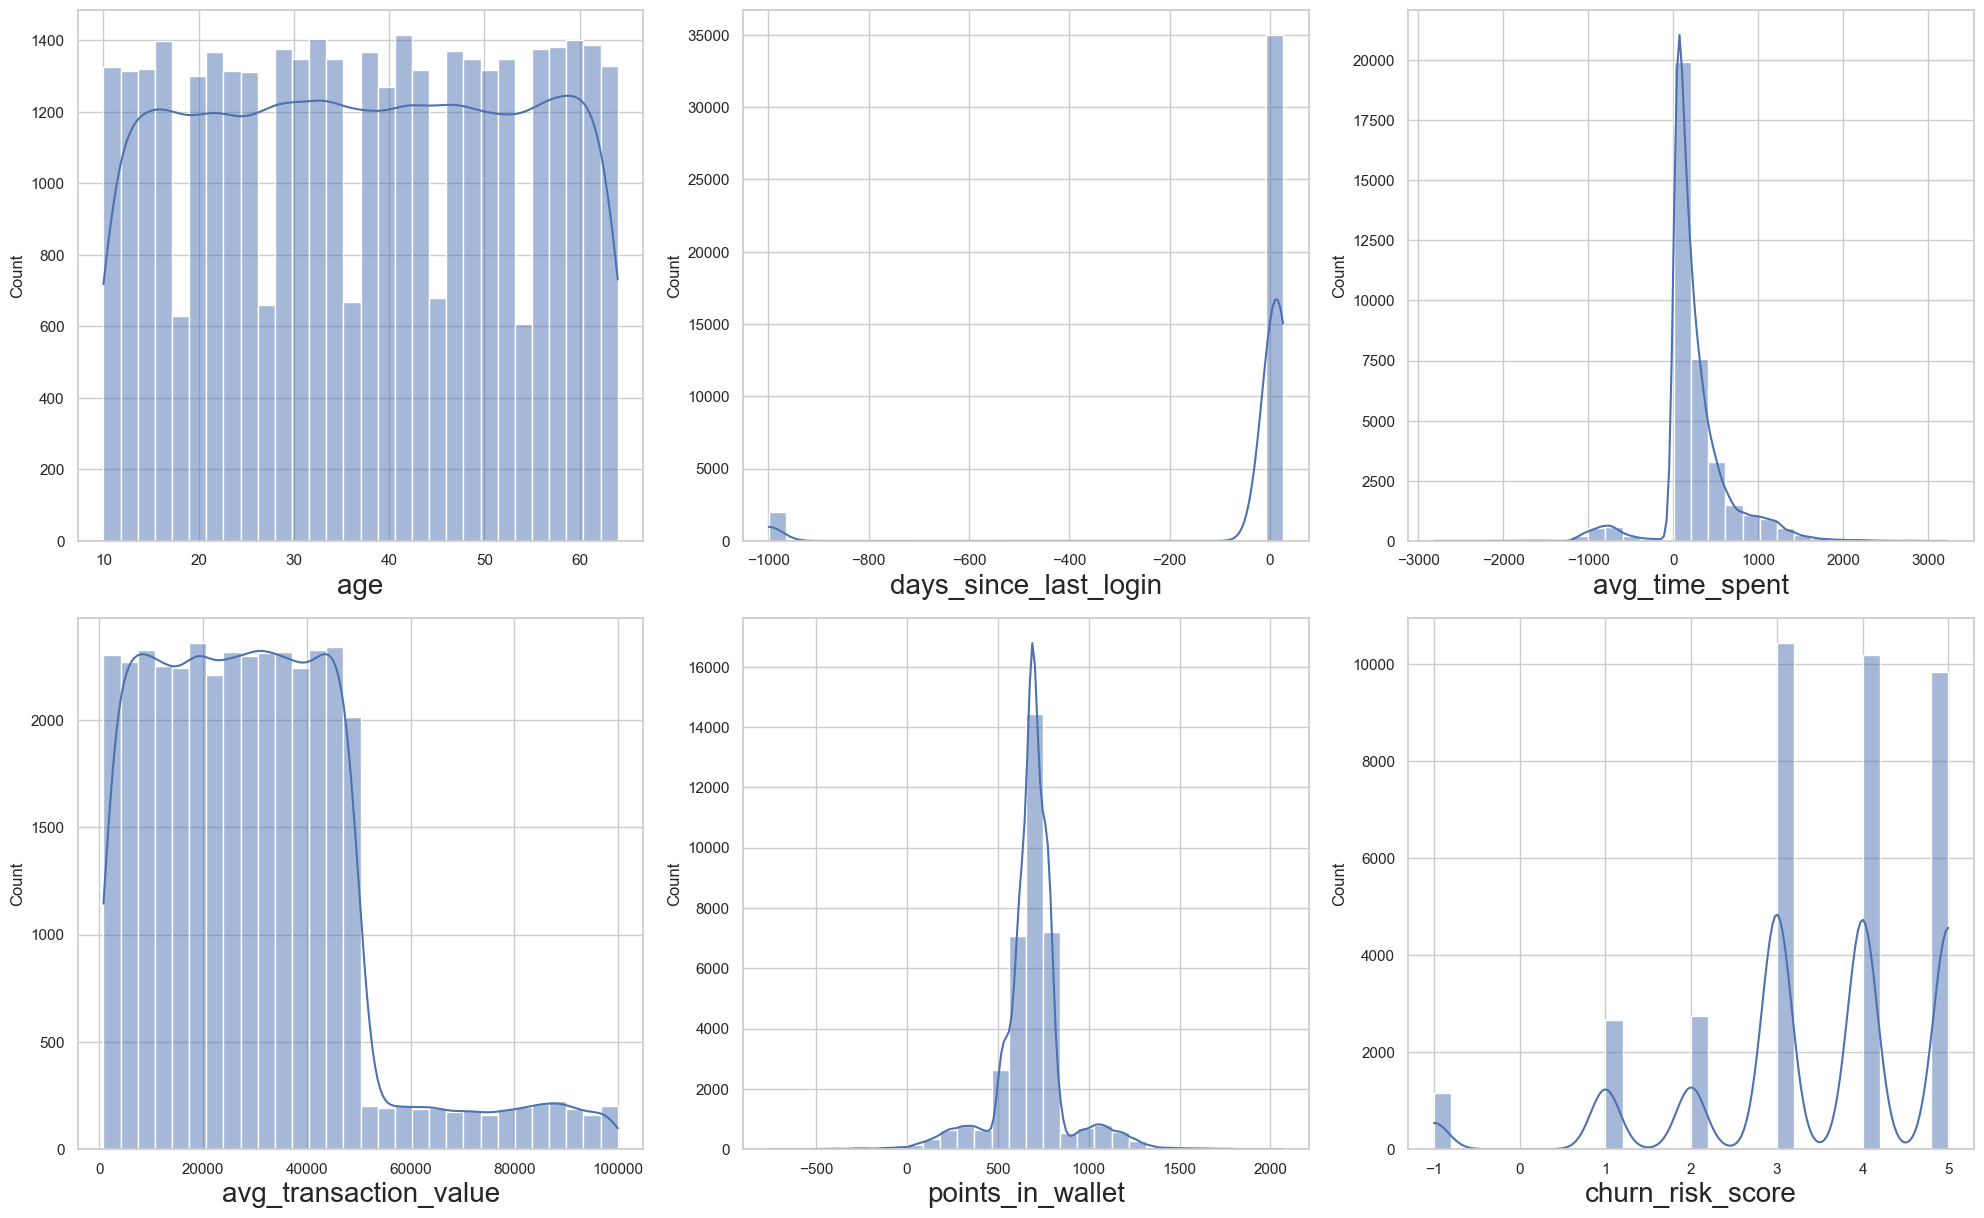

In [395]:
# lets see how data is distributed for every column
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 30), facecolor='white')
plotnumber = 1

for column in df1.select_dtypes(include=['number']).columns:  # Select only numerical columns
    if plotnumber <= 15:  # Adjust for a max of 15 plots
        ax = plt.subplot(5, 3, plotnumber)
        sns.histplot(df1[column], kde=True, bins=30)  # kde=True adds a smooth density line
        plt.xlabel(column, fontsize=20)

    plotnumber += 1

plt.tight_layout()
plt.show()


#### exploratoray data analysis

In [396]:
df.head()

customer_id              Name  age gender  \
0      fffe4300490044003600300030003800   Pattie Morrisey   18      F   
1  fffe43004900440032003100300035003700       Traci Peery   32      F   
2      fffe4300490044003100390032003600   Merideth Mcmeen   44      F   
3  fffe43004900440036003000330031003600  Eufemia Cardwell   37      M   
4  fffe43004900440031003900350030003600      Meghan Kosak   31      F   

  security_no region_category  membership_category joining_date  \
0     XW0DQ7H         Village  Platinum Membership   2017-08-17   
1     5K0N3X1            City   Premium Membership   2017-08-28   
2     1F2TCL3            Town        No Membership   2016-11-11   
3     VJGJ33N            City        No Membership   2016-10-29   
4     SVZXCWB            City        No Membership   2017-09-12   

  joined_through_referral referral_id  ... days_since_last_login  \
0                      No    xxxxxxxx  ...                    17   
1                       ?    CID21329  ...                    16   
2                     Yes    CID12313  ...                    14   
3                     Yes     CID3793  ...                    11   
4                      No    xxxxxxxx  ...                    20   

  avg_time_spent avg_transaction_value avg_frequency_login_days  \
0         300.63              53005.25                     17.0   
1         306.34              12838.38                     10.0   
2         516.16              21027.00                     22.0   
3          53.27              25239.56                      6.0   
4         113.13              24483.66                     16.0   

   points_in_wallet  used_special_discount  offer_application_preference  \
0        781.750000                    Yes                           Yes   
1        686.882199                    Yes                            No   
2        500.690000                     No                           Yes   
3        567.660000                     No                           Yes   
4        663.060000                     No                           Yes   

  past_complaint                  feedback churn_risk_score  
0             No  Products always in Stock                2  
1            Yes     Quality Customer Care                1  
2            Yes              Poor Website                5  
3            Yes              Poor Website                5  
4            Yes              Poor Website                5  

[5 rows x 24 columns]

In [397]:
df[['joining_date']].head()

joining_date
0   2017-08-17
1   2017-08-28
2   2016-11-11
3   2016-10-29
4   2017-09-12

In [398]:
df['joining_day'] = pd.to_datetime(df['joining_date'], format="%Y-%m-%d").dt.day
df['joining_month'] = pd.to_datetime(df['joining_date'], format="%Y-%m-%d").dt.month
df['joining_year'] = pd.to_datetime(df['joining_date'], format="%Y-%m-%d").dt.year


In [399]:
df.head()

customer_id              Name  age gender  \
0      fffe4300490044003600300030003800   Pattie Morrisey   18      F   
1  fffe43004900440032003100300035003700       Traci Peery   32      F   
2      fffe4300490044003100390032003600   Merideth Mcmeen   44      F   
3  fffe43004900440036003000330031003600  Eufemia Cardwell   37      M   
4  fffe43004900440031003900350030003600      Meghan Kosak   31      F   

  security_no region_category  membership_category joining_date  \
0     XW0DQ7H         Village  Platinum Membership   2017-08-17   
1     5K0N3X1            City   Premium Membership   2017-08-28   
2     1F2TCL3            Town        No Membership   2016-11-11   
3     VJGJ33N            City        No Membership   2016-10-29   
4     SVZXCWB            City        No Membership   2017-09-12   

  joined_through_referral referral_id  ... avg_frequency_login_days  \
0                      No    xxxxxxxx  ...                     17.0   
1                       ?    CID21329  ...                     10.0   
2                     Yes    CID12313  ...                     22.0   
3                     Yes     CID3793  ...                      6.0   
4                      No    xxxxxxxx  ...                     16.0   

  points_in_wallet used_special_discount offer_application_preference  \
0       781.750000                   Yes                          Yes   
1       686.882199                   Yes                           No   
2       500.690000                    No                          Yes   
3       567.660000                    No                          Yes   
4       663.060000                    No                          Yes   

   past_complaint                  feedback  churn_risk_score joining_day  \
0              No  Products always in Stock                 2          17   
1             Yes     Quality Customer Care                 1          28   
2             Yes              Poor Website                 5          11   
3             Yes              Poor Website                 5          29   
4             Yes              Poor Website                 5          12   

   joining_month joining_year  
0              8         2017  
1              8         2017  
2             11         2016  
3             10         2016  
4              9         2017  

[5 rows x 27 columns]

In [400]:
df.drop(["joining_date"], axis=1, inplace=True)

In [401]:
df.head()

customer_id              Name  age gender  \
0      fffe4300490044003600300030003800   Pattie Morrisey   18      F   
1  fffe43004900440032003100300035003700       Traci Peery   32      F   
2      fffe4300490044003100390032003600   Merideth Mcmeen   44      F   
3  fffe43004900440036003000330031003600  Eufemia Cardwell   37      M   
4  fffe43004900440031003900350030003600      Meghan Kosak   31      F   

  security_no region_category  membership_category joined_through_referral  \
0     XW0DQ7H         Village  Platinum Membership                      No   
1     5K0N3X1            City   Premium Membership                       ?   
2     1F2TCL3            Town        No Membership                     Yes   
3     VJGJ33N            City        No Membership                     Yes   
4     SVZXCWB            City        No Membership                      No   

  referral_id     preferred_offer_types  ... avg_frequency_login_days  \
0    xxxxxxxx     Gift Vouchers/Coupons  ...                     17.0   
1    CID21329     Gift Vouchers/Coupons  ...                     10.0   
2    CID12313     Gift Vouchers/Coupons  ...                     22.0   
3     CID3793     Gift Vouchers/Coupons  ...                      6.0   
4    xxxxxxxx  Credit/Debit Card Offers  ...                     16.0   

  points_in_wallet used_special_discount  offer_application_preference  \
0       781.750000                   Yes                           Yes   
1       686.882199                   Yes                            No   
2       500.690000                    No                           Yes   
3       567.660000                    No                           Yes   
4       663.060000                    No                           Yes   

   past_complaint                  feedback churn_risk_score  joining_day  \
0              No  Products always in Stock                2           17   
1             Yes     Quality Customer Care                1           28   
2             Yes              Poor Website                5           11   
3             Yes              Poor Website                5           29   
4             Yes              Poor Website                5           12   

  joining_month joining_year  
0             8         2017  
1             8         2017  
2            11         2016  
3            10         2016  
4             9         2017  

[5 rows x 26 columns]

In [402]:
df.columns

Index(['customer_id', 'Name', 'age', 'gender', 'security_no',
       'region_category', 'membership_category', 'joined_through_referral',
       'referral_id', 'preferred_offer_types', 'medium_of_operation',
       'internet_option', 'last_visit_time', 'days_since_last_login',
       'avg_time_spent', 'avg_transaction_value', 'avg_frequency_login_days',
       'points_in_wallet', 'used_special_discount',
       'offer_application_preference', 'past_complaint', 'feedback',
       'churn_risk_score', 'joining_day', 'joining_month', 'joining_year'],
      dtype='object')

In [403]:
df[['last_visit_time']].head()

last_visit_time
0        16:08:02
1        12:38:13
2        22:53:21
3        15:57:50
4        15:46:44

In [404]:
# extract hour, minutes and seconds
df[['last_visit_time_hour','last_visit_time_minutes','last_visit_time_seconds']] = df['last_visit_time'].astype(str).str.split(':', expand=True).astype(int)
# drop column
df.drop(['last_visit_time'], axis=1, inplace=True)

In [405]:
df.head()

customer_id              Name  age gender  \
0      fffe4300490044003600300030003800   Pattie Morrisey   18      F   
1  fffe43004900440032003100300035003700       Traci Peery   32      F   
2      fffe4300490044003100390032003600   Merideth Mcmeen   44      F   
3  fffe43004900440036003000330031003600  Eufemia Cardwell   37      M   
4  fffe43004900440031003900350030003600      Meghan Kosak   31      F   

  security_no region_category  membership_category joined_through_referral  \
0     XW0DQ7H         Village  Platinum Membership                      No   
1     5K0N3X1            City   Premium Membership                       ?   
2     1F2TCL3            Town        No Membership                     Yes   
3     VJGJ33N            City        No Membership                     Yes   
4     SVZXCWB            City        No Membership                      No   

  referral_id     preferred_offer_types  ... offer_application_preference  \
0    xxxxxxxx     Gift Vouchers/Coupons  ...                          Yes   
1    CID21329     Gift Vouchers/Coupons  ...                           No   
2    CID12313     Gift Vouchers/Coupons  ...                          Yes   
3     CID3793     Gift Vouchers/Coupons  ...                          Yes   
4    xxxxxxxx  Credit/Debit Card Offers  ...                          Yes   

  past_complaint                  feedback  churn_risk_score  joining_day  \
0             No  Products always in Stock                 2           17   
1            Yes     Quality Customer Care                 1           28   
2            Yes              Poor Website                 5           11   
3            Yes              Poor Website                 5           29   
4            Yes              Poor Website                 5           12   

  joining_month  joining_year last_visit_time_hour last_visit_time_minutes  \
0             8          2017                   16                       8   
1             8          2017                   12                      38   
2            11          2016                   22                      53   
3            10          2016                   15                      57   
4             9          2017                   15                      46   

  last_visit_time_seconds  
0                       2  
1                      13  
2                      21  
3                      50  
4                      44  

[5 rows x 28 columns]

In [406]:
df.columns

Index(['customer_id', 'Name', 'age', 'gender', 'security_no',
       'region_category', 'membership_category', 'joined_through_referral',
       'referral_id', 'preferred_offer_types', 'medium_of_operation',
       'internet_option', 'days_since_last_login', 'avg_time_spent',
       'avg_transaction_value', 'avg_frequency_login_days', 'points_in_wallet',
       'used_special_discount', 'offer_application_preference',
       'past_complaint', 'feedback', 'churn_risk_score', 'joining_day',
       'joining_month', 'joining_year', 'last_visit_time_hour',
       'last_visit_time_minutes', 'last_visit_time_seconds'],
      dtype='object')

In [407]:
df.head()

customer_id              Name  age gender  \
0      fffe4300490044003600300030003800   Pattie Morrisey   18      F   
1  fffe43004900440032003100300035003700       Traci Peery   32      F   
2      fffe4300490044003100390032003600   Merideth Mcmeen   44      F   
3  fffe43004900440036003000330031003600  Eufemia Cardwell   37      M   
4  fffe43004900440031003900350030003600      Meghan Kosak   31      F   

  security_no region_category  membership_category joined_through_referral  \
0     XW0DQ7H         Village  Platinum Membership                      No   
1     5K0N3X1            City   Premium Membership                       ?   
2     1F2TCL3            Town        No Membership                     Yes   
3     VJGJ33N            City        No Membership                     Yes   
4     SVZXCWB            City        No Membership                      No   

  referral_id     preferred_offer_types  ... offer_application_preference  \
0    xxxxxxxx     Gift Vouchers/Coupons  ...                          Yes   
1    CID21329     Gift Vouchers/Coupons  ...                           No   
2    CID12313     Gift Vouchers/Coupons  ...                          Yes   
3     CID3793     Gift Vouchers/Coupons  ...                          Yes   
4    xxxxxxxx  Credit/Debit Card Offers  ...                          Yes   

  past_complaint                  feedback  churn_risk_score  joining_day  \
0             No  Products always in Stock                 2           17   
1            Yes     Quality Customer Care                 1           28   
2            Yes              Poor Website                 5           11   
3            Yes              Poor Website                 5           29   
4            Yes              Poor Website                 5           12   

  joining_month  joining_year last_visit_time_hour last_visit_time_minutes  \
0             8          2017                   16                       8   
1             8          2017                   12                      38   
2            11          2016                   22                      53   
3            10          2016                   15                      57   
4             9          2017                   15                      46   

  last_visit_time_seconds  
0                       2  
1                      13  
2                      21  
3                      50  
4                      44  

[5 rows x 28 columns]

## handle categorical columns

In [408]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36992 entries, 0 to 36991
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   customer_id                   36992 non-null  object 
 1   Name                          36992 non-null  object 
 2   age                           36992 non-null  int64  
 3   gender                        36992 non-null  object 
 4   security_no                   36992 non-null  object 
 5   region_category               36992 non-null  object 
 6   membership_category           36992 non-null  object 
 7   joined_through_referral       36992 non-null  object 
 8   referral_id                   36992 non-null  object 
 9   preferred_offer_types         36992 non-null  object 
 10  medium_of_operation           36992 non-null  object 
 11  internet_option               36992 non-null  object 
 12  days_since_last_login         36992 non-null  int64  
 13  a

In [409]:
df['gender'].value_counts()

gender
F          18490
M          18443
Unknown       59
Name: count, dtype: int64

In [410]:
gender = pd.get_dummies(df[['gender']], drop_first=True)
gender.head()

gender_M  gender_Unknown
0     False           False
1     False           False
2     False           False
3      True           False
4     False           False

In [411]:
df['region_category'].value_counts()

region_category
Town       19556
City       12737
Village     4699
Name: count, dtype: int64

In [412]:
region = pd.get_dummies(df[['region_category']], drop_first=True)
region.head()

region_category_Town  region_category_Village
0                 False                     True
1                 False                    False
2                  True                    False
3                 False                    False
4                 False                    False

In [413]:
df['membership_category'].value_counts()

membership_category
Basic Membership       7724
No Membership          7692
Gold Membership        6795
Silver Membership      5988
Premium Membership     4455
Platinum Membership    4338
Name: count, dtype: int64

In [414]:
membership = pd.get_dummies(df[['membership_category']], drop_first=True)
membership.head()

membership_category_Gold Membership  membership_category_No Membership  \
0                                False                              False   
1                                False                              False   
2                                False                               True   
3                                False                               True   
4                                False                               True   

   membership_category_Platinum Membership  \
0                                     True   
1                                    False   
2                                    False   
3                                    False   
4                                    False   

   membership_category_Premium Membership  \
0                                   False   
1                                    True   
2                                   False   
3                                   False   
4                                   False   

   membership_category_Silver Membership  
0                                  False  
1                                  False  
2                                  False  
3                                  False  
4                                  False

In [415]:
df.joined_through_referral.value_counts()

joined_through_referral
No     15839
Yes    15715
?       5438
Name: count, dtype: int64

In [416]:
referal = pd.get_dummies(df[['joined_through_referral']], drop_first=True)
referal.head()

joined_through_referral_No  joined_through_referral_Yes
0                        True                        False
1                       False                        False
2                       False                         True
3                       False                         True
4                        True                        False

In [417]:
df.preferred_offer_types.value_counts()

preferred_offer_types
Gift Vouchers/Coupons       12637
Credit/Debit Card Offers    12274
Without Offers              12081
Name: count, dtype: int64

In [418]:
offer = pd.get_dummies(df[['preferred_offer_types']], drop_first=True)
offer.head()

preferred_offer_types_Gift Vouchers/Coupons  \
0                                         True   
1                                         True   
2                                         True   
3                                         True   
4                                        False   

   preferred_offer_types_Without Offers  
0                                 False  
1                                 False  
2                                 False  
3                                 False  
4                                 False

In [419]:
df.medium_of_operation.value_counts()

medium_of_operation
Desktop       13913
Smartphone    13876
?              5393
Both           3810
Name: count, dtype: int64

In [420]:
medium = pd.get_dummies(df[['medium_of_operation']], drop_first=True)
medium.head()

medium_of_operation_Both  medium_of_operation_Desktop  \
0                     False                        False   
1                     False                         True   
2                     False                         True   
3                     False                         True   
4                     False                        False   

   medium_of_operation_Smartphone  
0                           False  
1                           False  
2                           False  
3                           False  
4                            True

In [421]:
df['internet_option'].value_counts()

internet_option
Wi-Fi          12413
Mobile_Data    12343
Fiber_Optic    12236
Name: count, dtype: int64

In [422]:
internet = pd.get_dummies(df[['internet_option']], drop_first=True)
internet.head()

internet_option_Mobile_Data  internet_option_Wi-Fi
0                        False                   True
1                         True                  False
2                        False                   True
3                         True                  False
4                         True                  False

In [423]:
df.used_special_discount.value_counts()

used_special_discount
Yes    20342
No     16650
Name: count, dtype: int64

In [424]:
discount = pd.get_dummies(df[['used_special_discount']], drop_first=True)
discount.head()

used_special_discount_Yes
0                       True
1                       True
2                      False
3                      False
4                      False

In [425]:
df.offer_application_preference.value_counts()

offer_application_preference
Yes    20440
No     16552
Name: count, dtype: int64

In [426]:
application = pd.get_dummies(df[['offer_application_preference']], drop_first=True)
application.head()

offer_application_preference_Yes
0                              True
1                             False
2                              True
3                              True
4                              True

In [427]:
df.past_complaint.value_counts()

past_complaint
No     18602
Yes    18390
Name: count, dtype: int64

In [428]:
complaint = pd.get_dummies(df[['past_complaint']], drop_first=True)
complaint.head()

past_complaint_Yes
0               False
1                True
2                True
3                True
4                True

In [429]:
df.feedback.value_counts()

feedback
Poor Product Quality        6350
No reason specified         6290
Too many ads                6279
Poor Website                6271
Poor Customer Service       6252
Reasonable Price            1417
User Friendly Website       1391
Products always in Stock    1382
Quality Customer Care       1360
Name: count, dtype: int64

In [430]:
feedback = pd.get_dummies(df[['feedback']], drop_first=True)
feedback.head()

feedback_Poor Customer Service  feedback_Poor Product Quality  \
0                           False                          False   
1                           False                          False   
2                           False                          False   
3                           False                          False   
4                           False                          False   

   feedback_Poor Website  feedback_Products always in Stock  \
0                  False                               True   
1                  False                              False   
2                   True                              False   
3                   True                              False   
4                   True                              False   

   feedback_Quality Customer Care  feedback_Reasonable Price  \
0                           False                      False   
1                            True                      False   
2                           False                      False   
3                           False                      False   
4                           False                      False   

   feedback_Too many ads  feedback_User Friendly Website  
0                  False                           False  
1                  False                           False  
2                  False                           False  
3                  False                           False  
4                  False                           False

In [431]:
# Days since joining
df['days_since_joining'] = (pd.Timestamp('today') - 
                            pd.to_datetime(df['joining_year'].astype(str) + '-' + 
                                          df['joining_month'].astype(str) + '-' + 
                                          df['joining_day'].astype(str))).dt.days

In [432]:
# Concatenate dataframe -->

data_train = pd.concat([df, gender, region, membership, referal, offer, medium, internet, discount, application, complaint, feedback ], axis = 1)
data_train.head()

customer_id              Name  age gender  \
0      fffe4300490044003600300030003800   Pattie Morrisey   18      F   
1  fffe43004900440032003100300035003700       Traci Peery   32      F   
2      fffe4300490044003100390032003600   Merideth Mcmeen   44      F   
3  fffe43004900440036003000330031003600  Eufemia Cardwell   37      M   
4  fffe43004900440031003900350030003600      Meghan Kosak   31      F   

  security_no region_category  membership_category joined_through_referral  \
0     XW0DQ7H         Village  Platinum Membership                      No   
1     5K0N3X1            City   Premium Membership                       ?   
2     1F2TCL3            Town        No Membership                     Yes   
3     VJGJ33N            City        No Membership                     Yes   
4     SVZXCWB            City        No Membership                      No   

  referral_id     preferred_offer_types  ... offer_application_preference_Yes  \
0    xxxxxxxx     Gift Vouchers/Coupons  ...                             True   
1    CID21329     Gift Vouchers/Coupons  ...                            False   
2    CID12313     Gift Vouchers/Coupons  ...                             True   
3     CID3793     Gift Vouchers/Coupons  ...                             True   
4    xxxxxxxx  Credit/Debit Card Offers  ...                             True   

  past_complaint_Yes  feedback_Poor Customer Service  \
0              False                           False   
1               True                           False   
2               True                           False   
3               True                           False   
4               True                           False   

   feedback_Poor Product Quality  feedback_Poor Website  \
0                          False                  False   
1                          False                  False   
2                          False                   True   
3                          False                   True   
4                          False                   True   

  feedback_Products always in Stock  feedback_Quality Customer Care  \
0                              True                           False   
1                             False                            True   
2                             False                           False   
3                             False                           False   
4                             False                           False   

  feedback_Reasonable Price feedback_Too many ads  \
0                     False                 False   
1                     False                 False   
2                     False                 False   
3                     False                 False   
4                     False                 False   

  feedback_User Friendly Website  
0                          False  
1                          False  
2                          False  
3                          False  
4                          False  

[5 rows x 58 columns]

In [433]:
# drop unnecessary columns
data_train.columns

Index(['customer_id', 'Name', 'age', 'gender', 'security_no',
       'region_category', 'membership_category', 'joined_through_referral',
       'referral_id', 'preferred_offer_types', 'medium_of_operation',
       'internet_option', 'days_since_last_login', 'avg_time_spent',
       'avg_transaction_value', 'avg_frequency_login_days', 'points_in_wallet',
       'used_special_discount', 'offer_application_preference',
       'past_complaint', 'feedback', 'churn_risk_score', 'joining_day',
       'joining_month', 'joining_year', 'last_visit_time_hour',
       'last_visit_time_minutes', 'last_visit_time_seconds',
       'days_since_joining', 'gender_M', 'gender_Unknown',
       'region_category_Town', 'region_category_Village',
       'membership_category_Gold Membership',
       'membership_category_No Membership',
       'membership_category_Platinum Membership',
       'membership_category_Premium Membership',
       'membership_category_Silver Membership', 'joined_through_referral_No'

In [434]:
data_train.drop(["customer_id", "Name", "gender", "security_no", "region_category", "membership_category", "joined_through_referral", "referral_id", "preferred_offer_types", "medium_of_operation", "internet_option", "used_special_discount", "offer_application_preference", "past_complaint", "feedback", "avg_frequency_login_days" ], axis = 1, inplace = True)

In [435]:
data_train.head()

age  days_since_last_login  avg_time_spent  avg_transaction_value  \
0   18                     17          300.63               53005.25   
1   32                     16          306.34               12838.38   
2   44                     14          516.16               21027.00   
3   37                     11           53.27               25239.56   
4   31                     20          113.13               24483.66   

   points_in_wallet  churn_risk_score  joining_day  joining_month  \
0        781.750000                 2           17              8   
1        686.882199                 1           28              8   
2        500.690000                 5           11             11   
3        567.660000                 5           29             10   
4        663.060000                 5           12              9   

   joining_year  last_visit_time_hour  ...  offer_application_preference_Yes  \
0          2017                    16  ...                              True   
1          2017                    12  ...                             False   
2          2016                    22  ...                              True   
3          2016                    15  ...                              True   
4          2017                    15  ...                              True   

   past_complaint_Yes  feedback_Poor Customer Service  \
0               False                           False   
1                True                           False   
2                True                           False   
3                True                           False   
4                True                           False   

   feedback_Poor Product Quality  feedback_Poor Website  \
0                          False                  False   
1                          False                  False   
2                          False                   True   
3                          False                   True   
4                          False                   True   

   feedback_Products always in Stock  feedback_Quality Customer Care  \
0                               True                           False   
1                              False                            True   
2                              False                           False   
3                              False                           False   
4                              False                           False   

   feedback_Reasonable Price  feedback_Too many ads  \
0                      False                  False   
1                      False                  False   
2                      False                  False   
3                      False                  False   
4                      False                  False   

   feedback_User Friendly Website  
0                           False  
1                           False  
2                           False  
3                           False  
4                           False  

[5 rows x 42 columns]

In [436]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36992 entries, 0 to 36991
Data columns (total 42 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   age                                          36992 non-null  int64  
 1   days_since_last_login                        36992 non-null  int64  
 2   avg_time_spent                               36992 non-null  float64
 3   avg_transaction_value                        36992 non-null  float64
 4   points_in_wallet                             36992 non-null  float64
 5   churn_risk_score                             36992 non-null  int64  
 6   joining_day                                  36992 non-null  int32  
 7   joining_month                                36992 non-null  int32  
 8   joining_year                                 36992 non-null  int32  
 9   last_visit_time_hour                         36992 non-null  int64  
 10

In [437]:
data_train.shape

(36992, 42)

C:\Users\Krishana Gupta\AppData\Local\Temp\ipykernel_5716\460143118.py:9: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




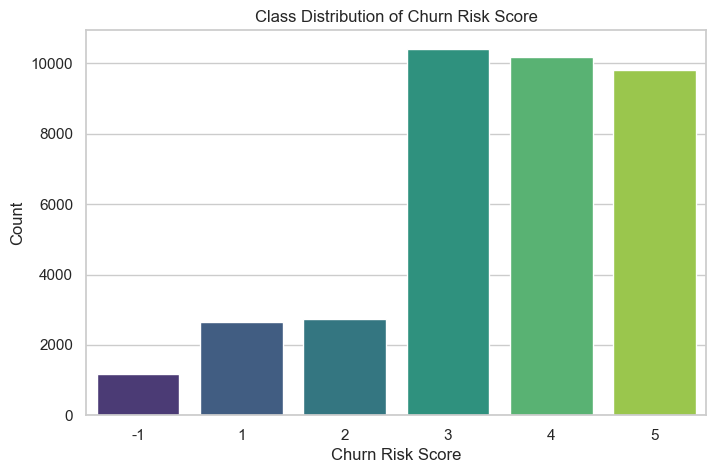

churn_risk_score
 3    10424
 4    10185
 5     9827
 2     2741
 1     2652
-1     1163
Name: count, dtype: int64

In [438]:
import seaborn as sns
import matplotlib.pyplot as plt

# Check class distribution of churn_risk_score
class_counts = df["churn_risk_score"].value_counts()

# Plot class distribution
plt.figure(figsize=(8, 5))
sns.barplot(x=class_counts.index, y=class_counts.values, palette="viridis")
plt.xlabel("Churn Risk Score")
plt.ylabel("Count")
plt.title("Class Distribution of Churn Risk Score")
plt.show()

# Display class distribution counts
class_counts


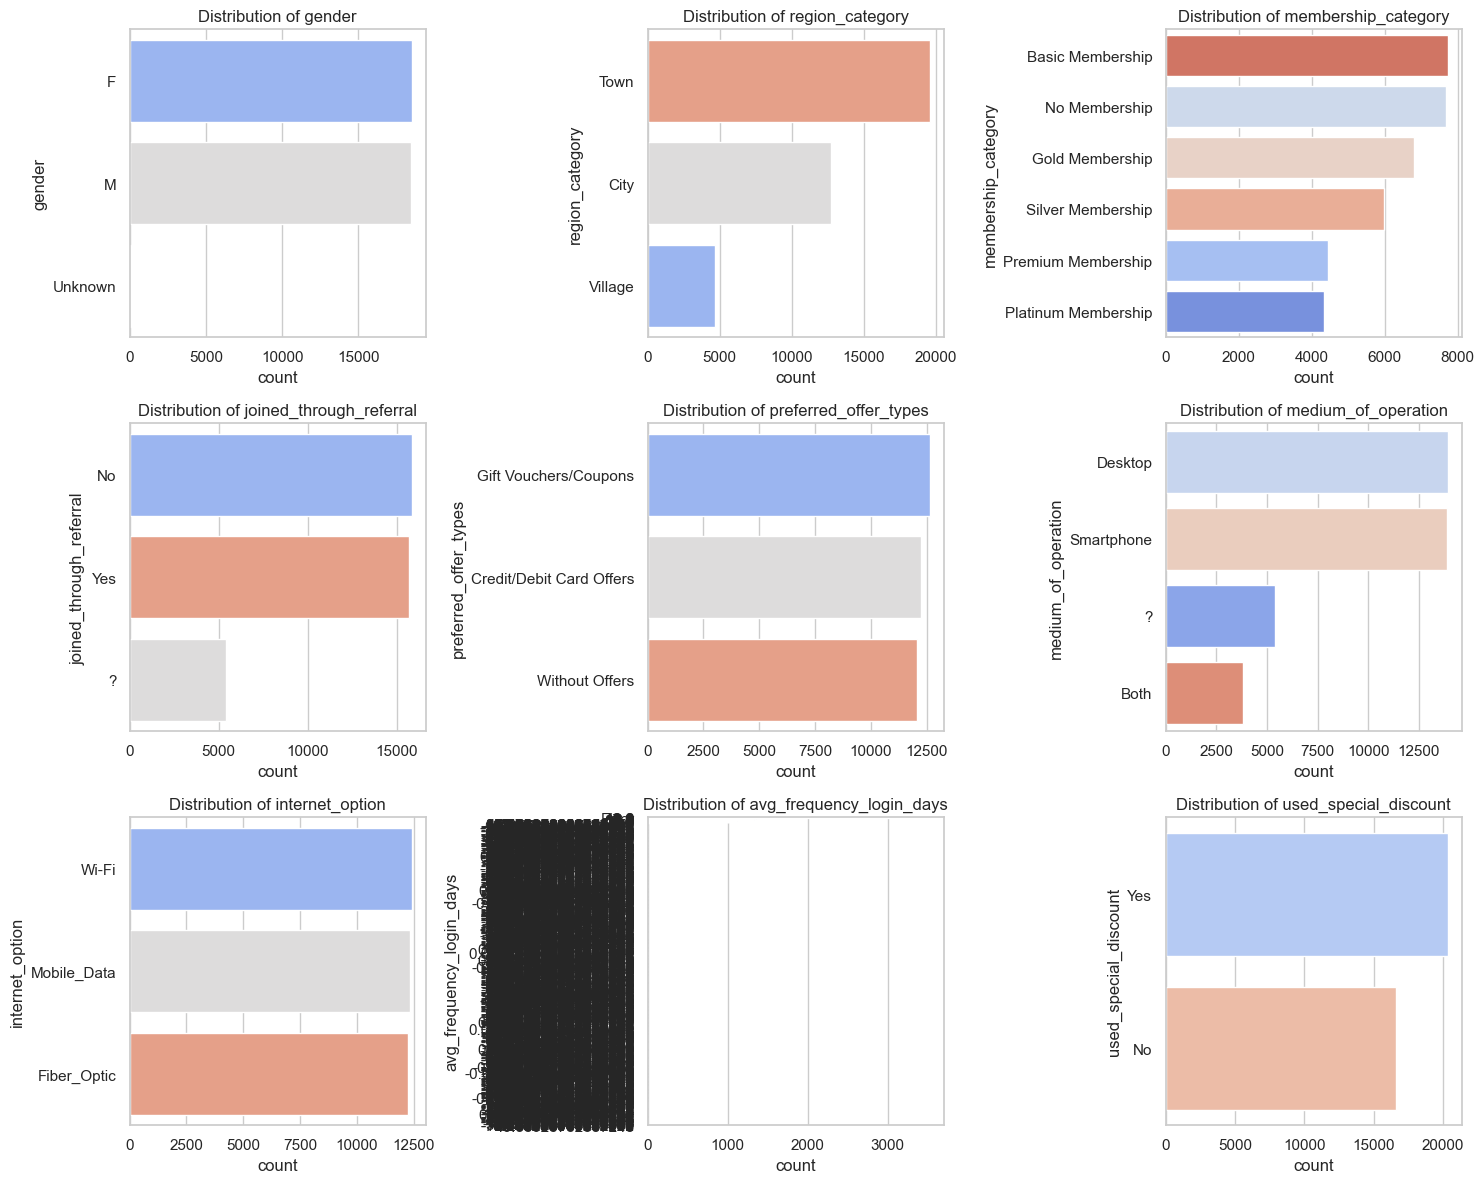

{'gender': gender
 F          18490
 M          18443
 Unknown       59
 Name: count, dtype: int64,
 'region_category': region_category
 Town       19556
 City       12737
 Village     4699
 Name: count, dtype: int64,
 'membership_category': membership_category
 Basic Membership       7724
 No Membership          7692
 Gold Membership        6795
 Silver Membership      5988
 Premium Membership     4455
 Platinum Membership    4338
 Name: count, dtype: int64,
 'joined_through_referral': joined_through_referral
 No     15839
 Yes    15715
 ?       5438
 Name: count, dtype: int64,
 'preferred_offer_types': preferred_offer_types
 Gift Vouchers/Coupons       12637
 Credit/Debit Card Offers    12274
 Without Offers              12081
 Name: count, dtype: int64,
 'medium_of_operation': medium_of_operation
 Desktop       13913
 Smartphone    13876
 ?              5393
 Both           3810
 Name: count, dtype: int64,
 'internet_option': internet_option
 Wi-Fi          12413
 Mobile_Data    123

In [439]:
# Identify categorical columns
categorical_cols = df.select_dtypes(include=["object"]).columns.tolist()

# Exclude non-relevant categorical columns
exclude_cols = ["customer_id", "Name", "security_no", "referral_id", "joining_date", "last_visit_time"]
categorical_cols = [col for col in categorical_cols if col not in exclude_cols]

# Plot value counts for categorical columns
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 12))
axes = axes.flatten()

for i, col in enumerate(categorical_cols[:9]):  # Limiting to first 9 for visualization
    sns.countplot(y=df[col], ax=axes[i], order=df[col].value_counts().index, hue=df[col], palette="coolwarm", legend=False)
    axes[i].set_title(f"Distribution of {col}")

plt.tight_layout()
plt.show()

# Display the value counts of categorical features
imbalanced_features = {col: df[col].value_counts() for col in categorical_cols}
imbalanced_features


In [440]:
data_train["churn_risk_score"].value_counts()

churn_risk_score
 3    10424
 4    10185
 5     9827
 2     2741
 1     2652
-1     1163
Name: count, dtype: int64

In [441]:
data_train.isnull().sum()

age                                            0
days_since_last_login                          0
avg_time_spent                                 0
avg_transaction_value                          0
points_in_wallet                               0
churn_risk_score                               0
joining_day                                    0
joining_month                                  0
joining_year                                   0
last_visit_time_hour                           0
last_visit_time_minutes                        0
last_visit_time_seconds                        0
days_since_joining                             0
gender_M                                       0
gender_Unknown                                 0
region_category_Town                           0
region_category_Village                        0
membership_category_Gold Membership            0
membership_category_No Membership              0
membership_category_Platinum Membership        0
membership_category_

In [442]:
# 1. First, examine the imbalanced columns to confirm the issue
imbalanced_columns = [
    'gender_Unknown', 'medium_of_operation_Both', 
    'feedback_Products always in Stock', 'feedback_Quality Customer Care',
    'feedback_Reasonable Price', 'feedback_User Friendly Website'
]

# Display imbalance percentages
for col in imbalanced_columns:
    if col in data_train.columns:
        imbalance_pct = data_train[col].mean() * 100
        print(f"{col}: {imbalance_pct:.1f}% positive cases")

# 2. Apply SMOTE to create a balanced dataset
from imblearn.over_sampling import SMOTE

# Select features and target
X = data_train.drop('churn_risk_score', axis=1)
y = data_train['churn_risk_score']

# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_balanced, y_balanced = smote.fit_resample(X, y)

# Create balanced dataframe
data_train_balanced = pd.DataFrame(X_balanced, columns=X.columns)
data_train_balanced['churn_risk_score'] = y_balanced

# 3. Verify improvement in balance
for col in imbalanced_columns:
    if col in data_train_balanced.columns:
        balance_pct = data_train_balanced[col].mean() * 100
        original_pct = data_train[col].mean() * 100
        print(f"{col}: Original {original_pct:.1f}% → Balanced {balance_pct:.1f}%")

gender_Unknown: 0.2% positive cases
medium_of_operation_Both: 10.3% positive cases
feedback_Products always in Stock: 3.7% positive cases
feedback_Quality Customer Care: 3.7% positive cases
feedback_Reasonable Price: 3.8% positive cases
feedback_User Friendly Website: 3.8% positive cases
gender_Unknown: Original 0.2% → Balanced 0.3%
medium_of_operation_Both: Original 10.3% → Balanced 14.5%
feedback_Products always in Stock: Original 3.7% → Balanced 13.7%
feedback_Quality Customer Care: Original 3.7% → Balanced 13.9%
feedback_Reasonable Price: Original 3.8% → Balanced 14.1%
feedback_User Friendly Website: Original 3.8% → Balanced 14.2%


In [443]:
# Verify if categorical feature distributions changed
for col in imbalanced_columns:
    print(f"{col} value counts after SMOTE:\n{data_train_balanced[col].value_counts(normalize=True) * 100}\n")


gender_Unknown value counts after SMOTE:
gender_Unknown
False    99.734587
True      0.265413
Name: proportion, dtype: float64

medium_of_operation_Both value counts after SMOTE:
medium_of_operation_Both
False    85.504605
True     14.495395
Name: proportion, dtype: float64

feedback_Products always in Stock value counts after SMOTE:
feedback_Products always in Stock
False    86.268867
True     13.731133
Name: proportion, dtype: float64

feedback_Quality Customer Care value counts after SMOTE:
feedback_Quality Customer Care
False    86.137759
True     13.862241
Name: proportion, dtype: float64

feedback_Reasonable Price value counts after SMOTE:
feedback_Reasonable Price
False    85.901126
True     14.098874
Name: proportion, dtype: float64

feedback_User Friendly Website value counts after SMOTE:
feedback_User Friendly Website
False    85.800397
True     14.199603
Name: proportion, dtype: float64



In [444]:
#from ydata_profiling import ProfileReport
#profile = ProfileReport(data_train)
#profile.to_file("churn_reporttrain.html")

In [445]:
# Check column data types
print(data_train.dtypes)

# Get all non-numeric columns
non_numeric_cols = data_train.select_dtypes(exclude=['number']).columns
print("Non-numeric columns:", non_numeric_cols)


age                                              int64
days_since_last_login                            int64
avg_time_spent                                 float64
avg_transaction_value                          float64
points_in_wallet                               float64
churn_risk_score                                 int64
joining_day                                      int32
joining_month                                    int32
joining_year                                     int32
last_visit_time_hour                             int64
last_visit_time_minutes                          int64
last_visit_time_seconds                          int64
days_since_joining                               int64
gender_M                                          bool
gender_Unknown                                    bool
region_category_Town                              bool
region_category_Village                           bool
membership_category_Gold Membership               bool
membership

In [446]:
# Select only numeric columns
numeric_data_train = data_train.select_dtypes(include=['number'])

# Compute correlation matrix
corr_matrix = numeric_data_train.corr()

# Print correlation with 'churn_risk_score'
print(corr_matrix['churn_risk_score'].sort_values(ascending=False))


churn_risk_score           1.000000
joining_year               0.008856
joining_month              0.007975
joining_day                0.003942
last_visit_time_minutes    0.002434
age                        0.002360
last_visit_time_seconds   -0.000448
last_visit_time_hour      -0.008596
days_since_last_login     -0.009918
days_since_joining        -0.011080
avg_time_spent            -0.021052
points_in_wallet          -0.252068
avg_transaction_value     -0.288636
Name: churn_risk_score, dtype: float64


Data types in data_train:
age                                              int64
days_since_last_login                            int64
avg_time_spent                                 float64
avg_transaction_value                          float64
points_in_wallet                               float64
churn_risk_score                                 int64
joining_day                                      int32
joining_month                                    int32
joining_year                                     int32
last_visit_time_hour                             int64
last_visit_time_minutes                          int64
last_visit_time_seconds                          int64
days_since_joining                               int64
gender_M                                          bool
gender_Unknown                                    bool
region_category_Town                              bool
region_category_Village                           bool
membership_category_Gold Membership    

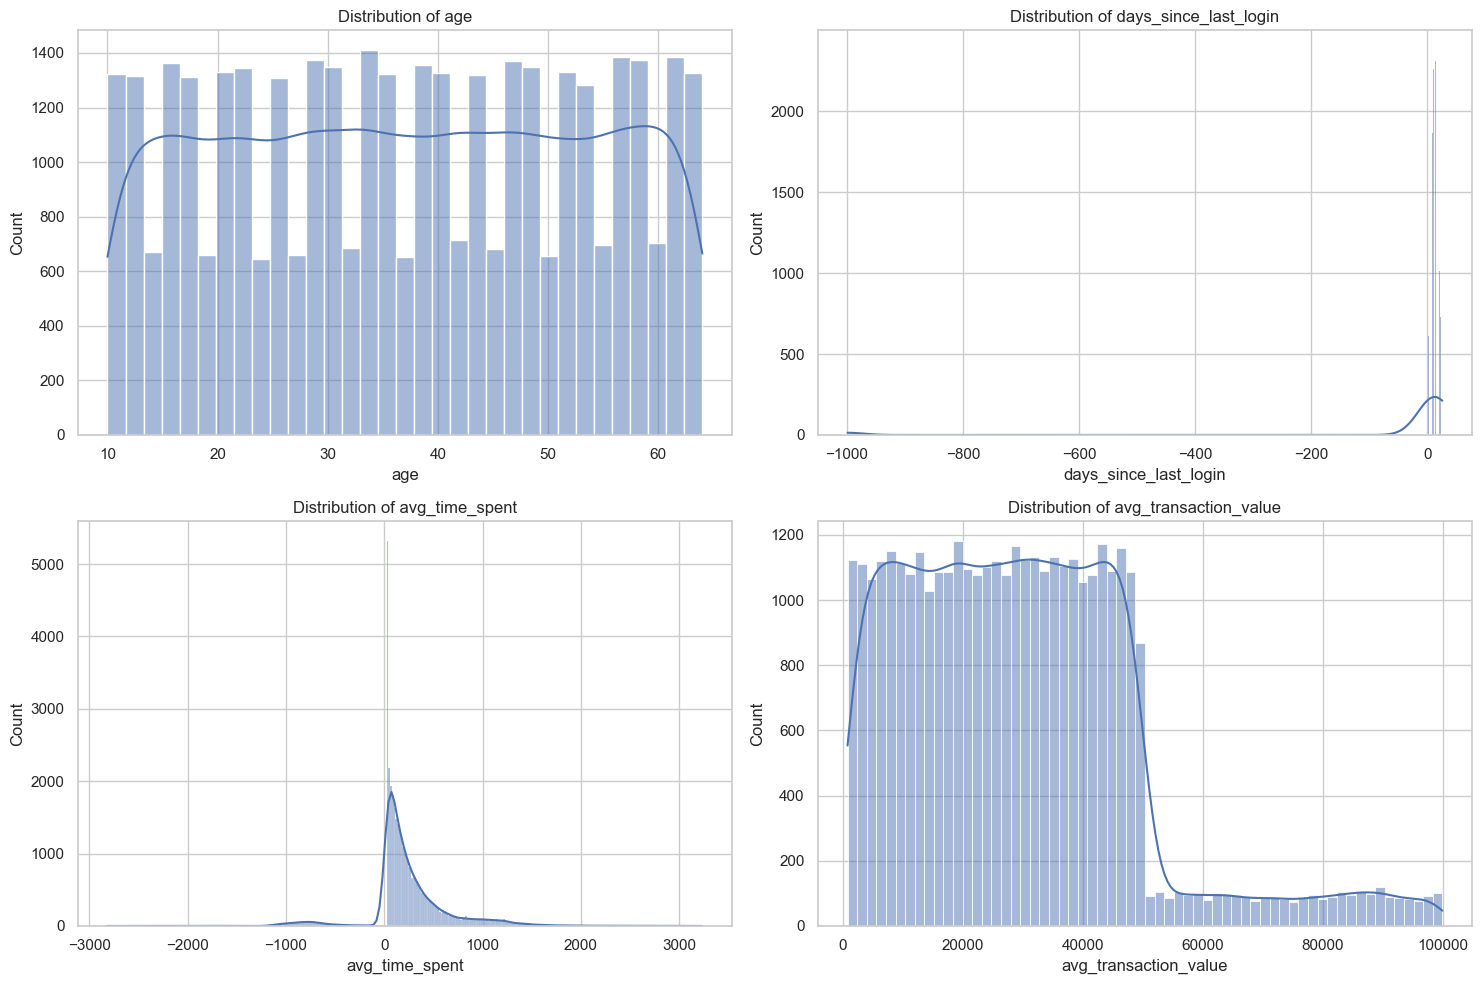

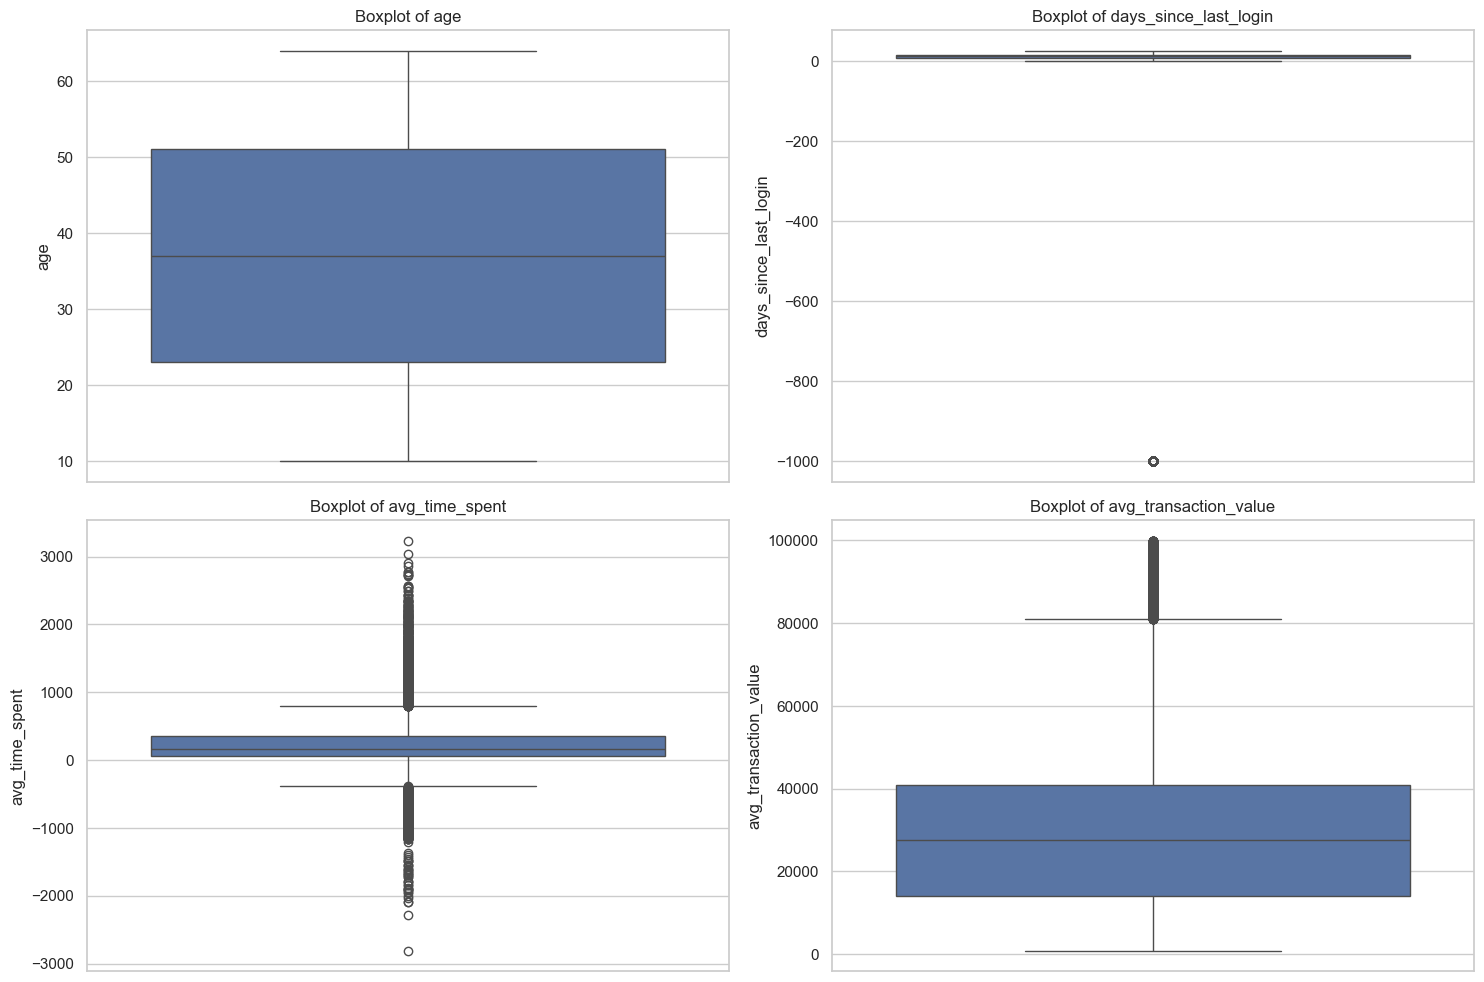

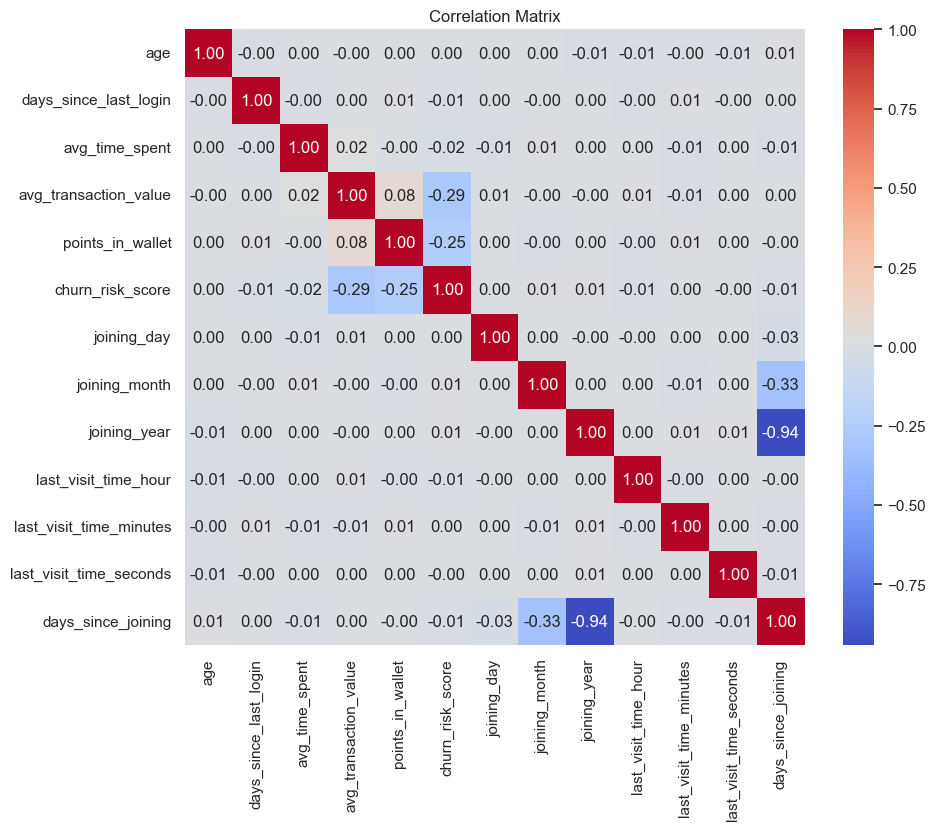

In [447]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. First, let's examine the data types in your dataframes
print("Data types in data_train:")
print(data_train.dtypes)
print("\nData types in df:")
print(df.dtypes)

# 2. Separate numerical and categorical columns
numeric_cols = data_train.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = data_train.select_dtypes(include=['category', 'object']).columns.tolist()

print(f"\nNumerical columns: {numeric_cols}")
print(f"Categorical columns: {categorical_cols}")

# 3. Basic statistics for numerical columns
if numeric_cols:
    print("\nNumerical statistics:")
    print(data_train[numeric_cols].describe())

# 4. Create visualizations
plt.figure(figsize=(15, 10))

# For numerical columns
if numeric_cols:
    # Histograms for numerical columns
    for i, col in enumerate(numeric_cols[:4]):  # Limit to first 4 numerical columns if there are many
        plt.subplot(2, 2, i+1)
        sns.histplot(data_train[col], kde=True)
        plt.title(f'Distribution of {col}')
    
    plt.tight_layout()
    plt.show()
    
    # Boxplots for numerical columns
    plt.figure(figsize=(15, 10))
    for i, col in enumerate(numeric_cols[:4]):
        plt.subplot(2, 2, i+1)
        sns.boxplot(y=data_train[col])
        plt.title(f'Boxplot of {col}')
    
    plt.tight_layout()
    plt.show()
    
    # Correlation heatmap for numerical columns
    plt.figure(figsize=(10, 8))
    corr = data_train[numeric_cols].corr()
    sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title('Correlation Matrix')
    plt.show()

# For categorical columns
if categorical_cols:
    # Bar charts for categorical columns
    for i, col in enumerate(categorical_cols[:4]):  # Limit to first 4 categorical columns
        plt.figure(figsize=(10, 6))
        value_counts = data_train[col].value_counts()
        value_counts.plot(kind='bar')
        plt.title(f'Count of {col}')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()
    
    # Pie charts for categorical columns
    for i, col in enumerate(categorical_cols[:4]):
        plt.figure(figsize=(8, 8))
        data_train[col].value_counts().plot(kind='pie', autopct='%1.1f%%')
        plt.title(f'Distribution of {col}')
        plt.ylabel('')
        plt.show()

# 5. Bivariate analysis - relationship between numerical and categorical variables
if numeric_cols and categorical_cols:
    # Choose one numerical and one categorical column for demonstration
    num_col = numeric_cols[0]
    cat_col = categorical_cols[0]
    
    plt.figure(figsize=(12, 6))
    sns.boxplot(x=cat_col, y=num_col, data=data_train)
    plt.title(f'{num_col} by {cat_col}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# 6. For any potential target variable (like 'churn' in customer churn prediction)
target_col = None  # Replace with your target column name if available
if target_col in data_train.columns:
    plt.figure(figsize=(10, 6))
    data_train[target_col].value_counts().plot(kind='bar')
    plt.title(f'Distribution of {target_col}')
    plt.show()
    
    # Relationship between target and other variables
    if numeric_cols:
        for col in numeric_cols[:3]:  # Analyze first 3 numerical columns
            plt.figure(figsize=(10, 6))
            sns.boxplot(x=target_col, y=col, data=data_train)
            plt.title(f'{col} by {target_col}')
            plt.show()
    
    if categorical_cols:
        for col in categorical_cols[:3]:  # Analyze first 3 categorical columns
            plt.figure(figsize=(12, 6))
            pd.crosstab(data_train[col], data_train[target_col]).plot(kind='bar', stacked=True)
            plt.title(f'{col} vs {target_col}')
            plt.xticks(rotation=45)
            plt.tight_layout()
            plt.show()

Generating comprehensive business insights...


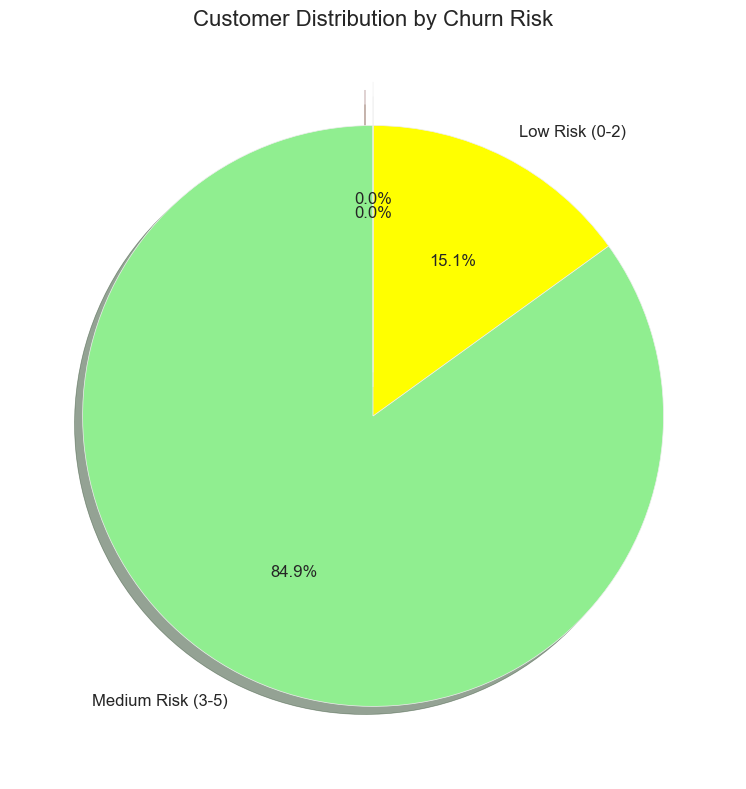


[INSIGHT] 0 customers (0.0%) are at high or critical risk of churn


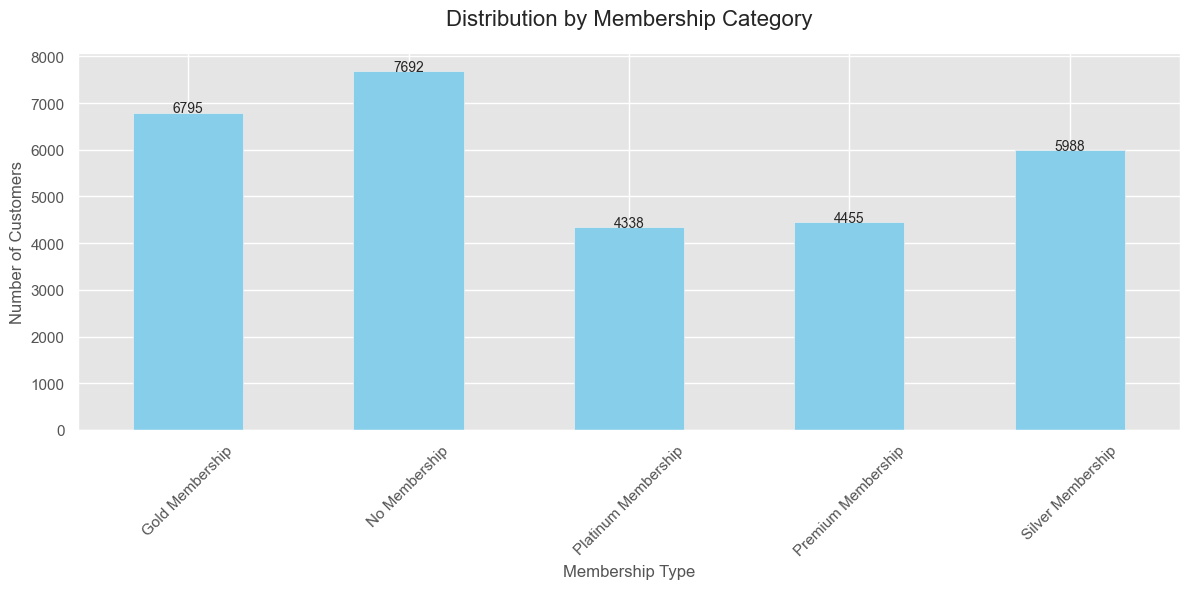

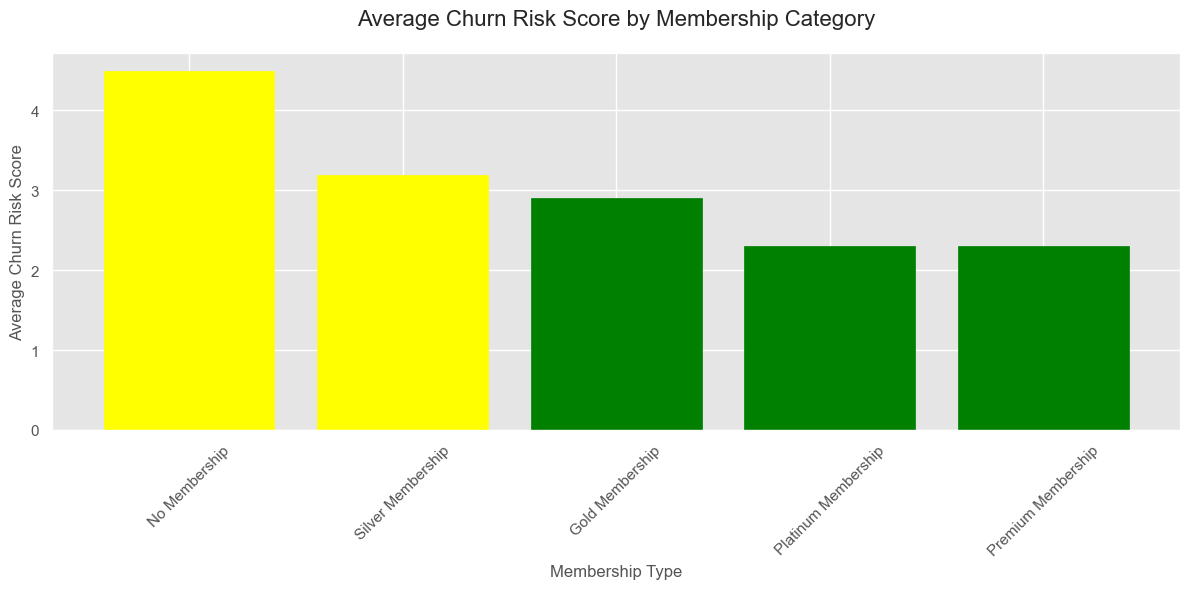


[INSIGHT] No Membership has the highest average churn risk score: 4.49


c:\Users\Krishana Gupta\Downloads\Custome_churn_prediction\Customer_churn_prediction-main\venv\Lib\site-packages\matplotlib\collections.py:1008: RuntimeWarning:

invalid value encountered in sqrt



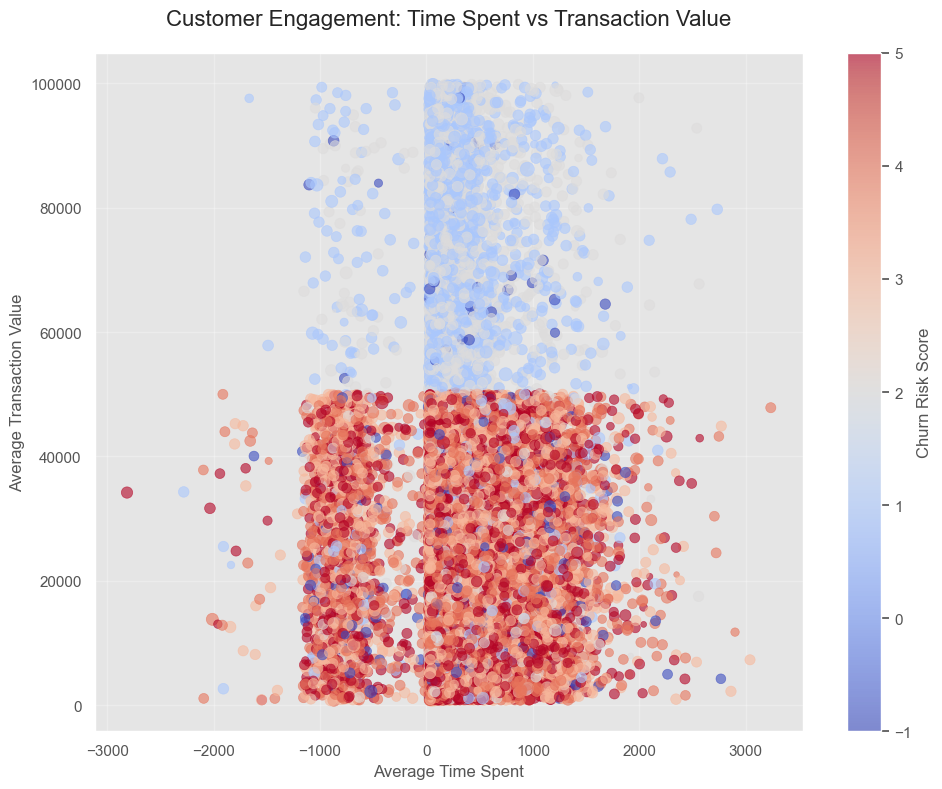

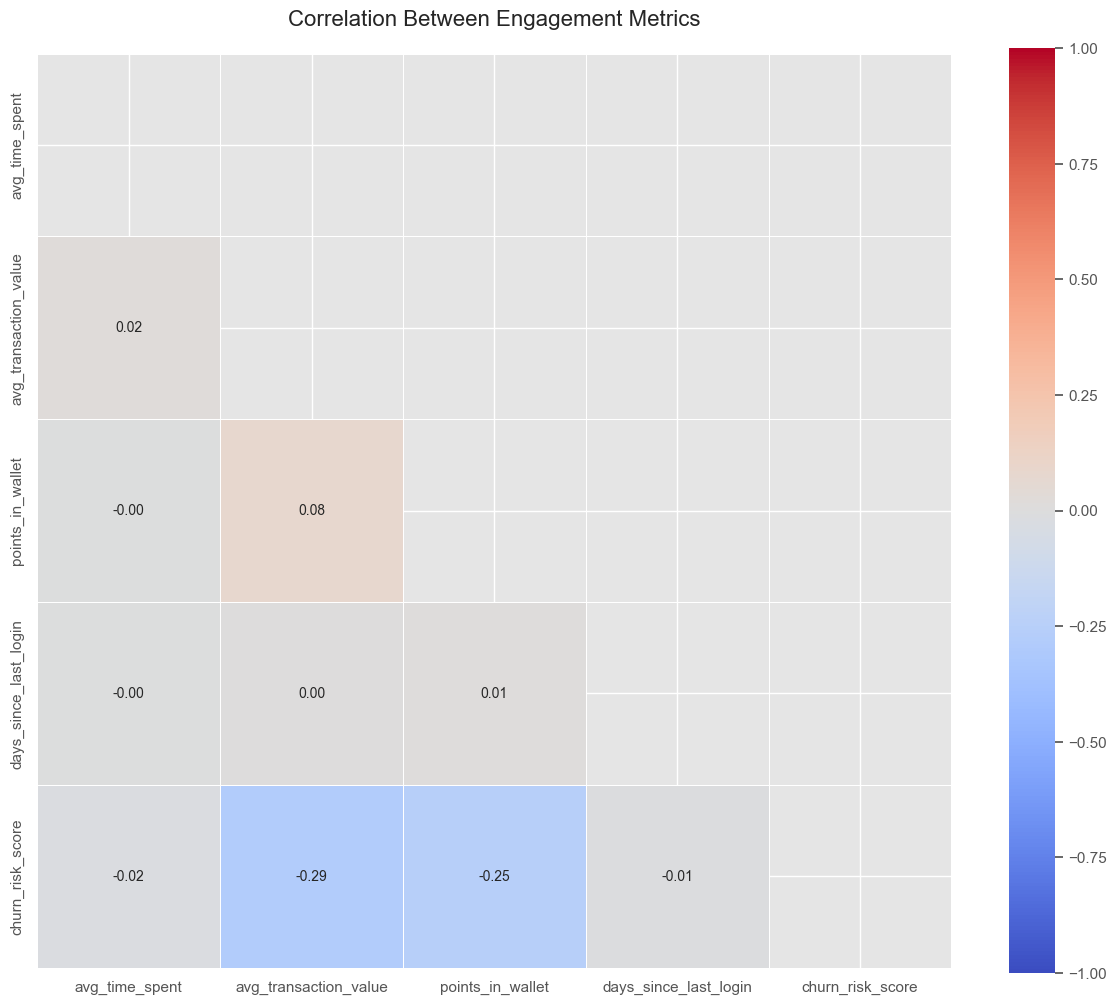


[INSIGHT] Correlation between time spent and transaction value: 0.02
[INSIGHT] Correlation between days since last login and churn risk: -0.01


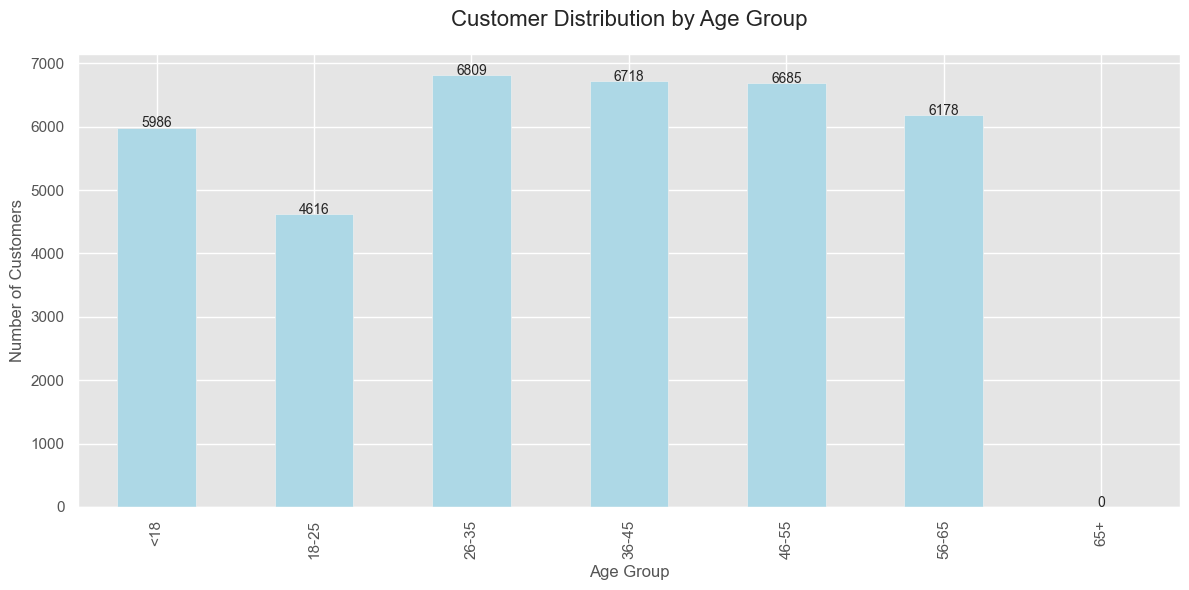

C:\Users\Krishana Gupta\AppData\Local\Temp\ipykernel_5716\2126513726.py:173: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



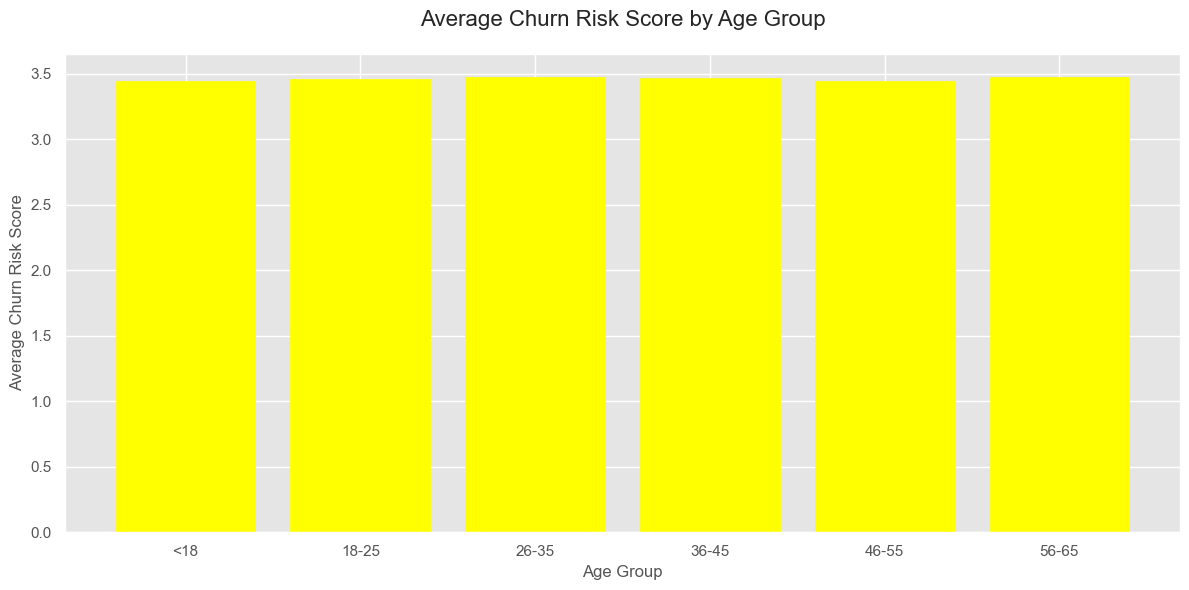


[INSIGHT] Age group 56-65 has the highest churn risk: 3.48


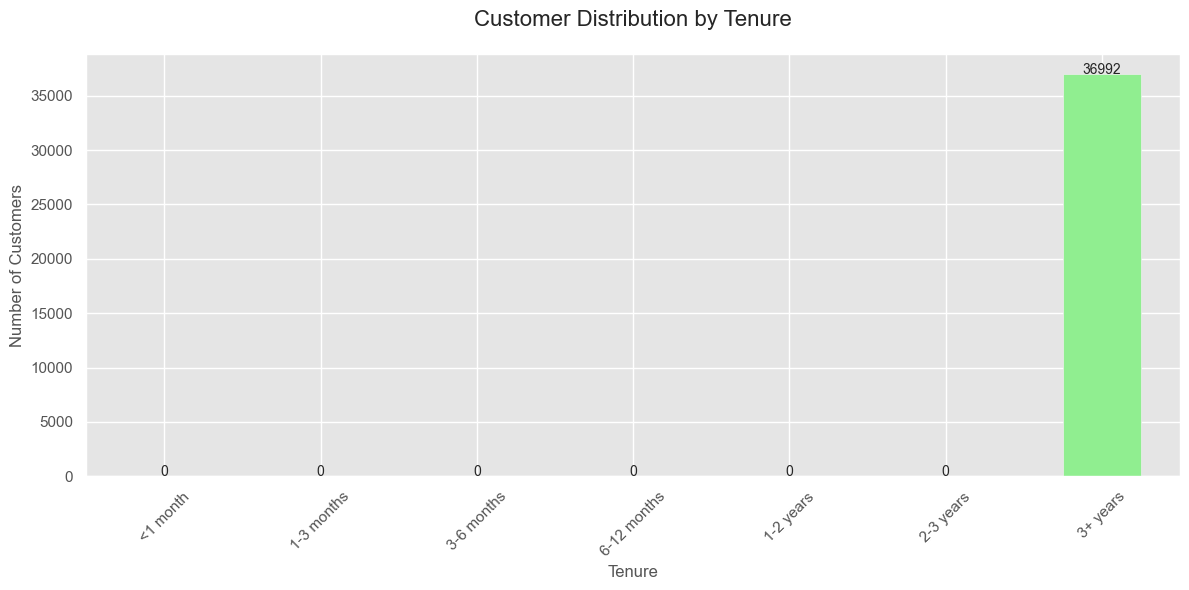

C:\Users\Krishana Gupta\AppData\Local\Temp\ipykernel_5716\2126513726.py:231: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



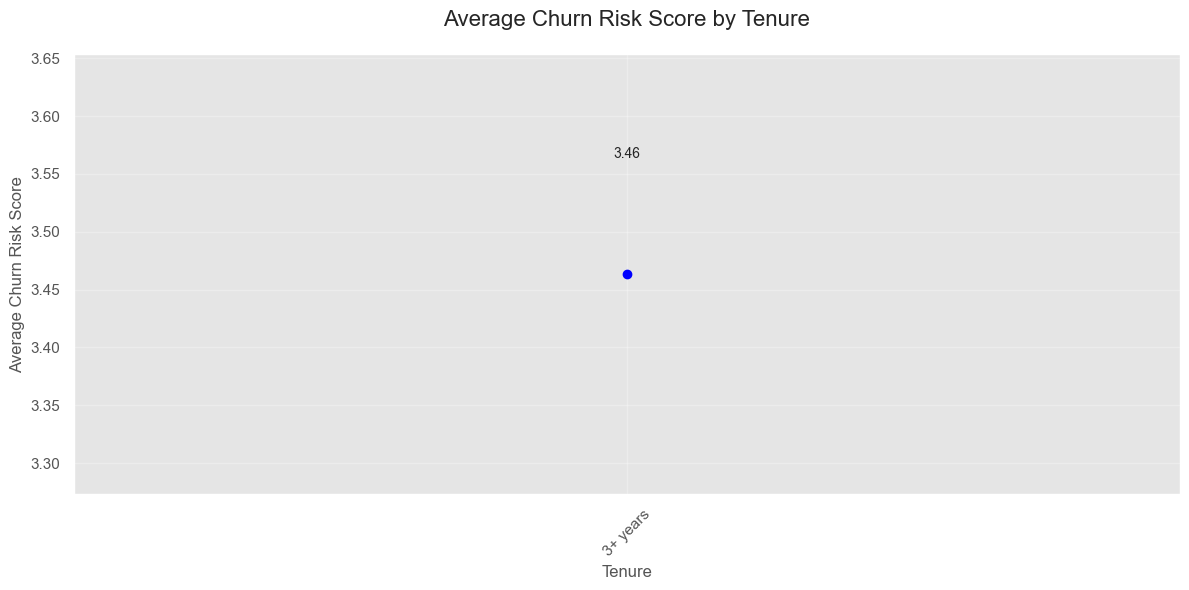


[INSIGHT] New customers (<1 month) have average churn risk of nan
[INSIGHT] Loyal customers (3+ years) have average churn risk of 3.46


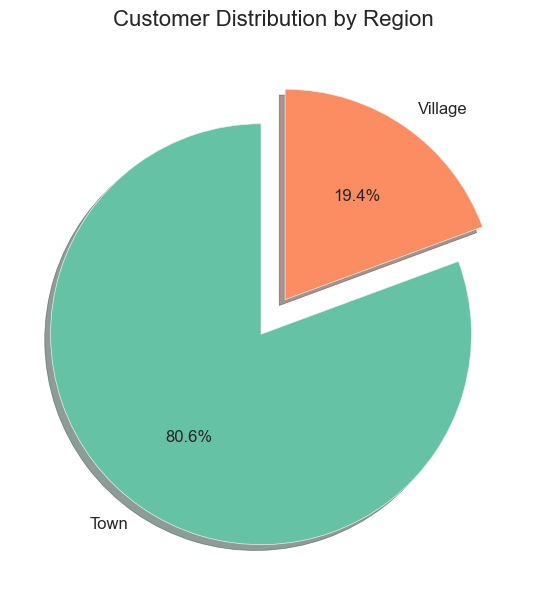

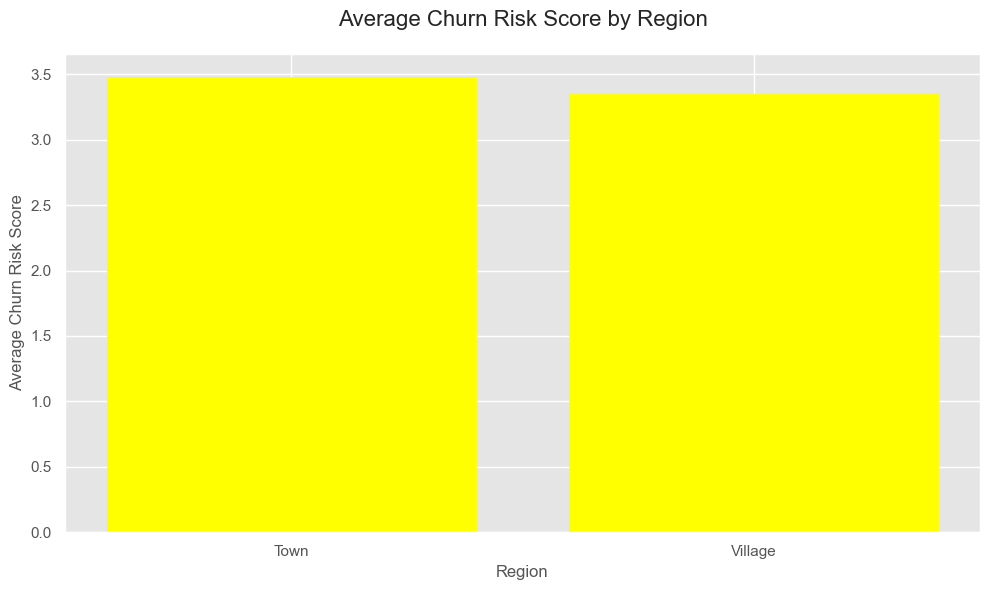


[INSIGHT] Town has the highest average churn risk: 3.48


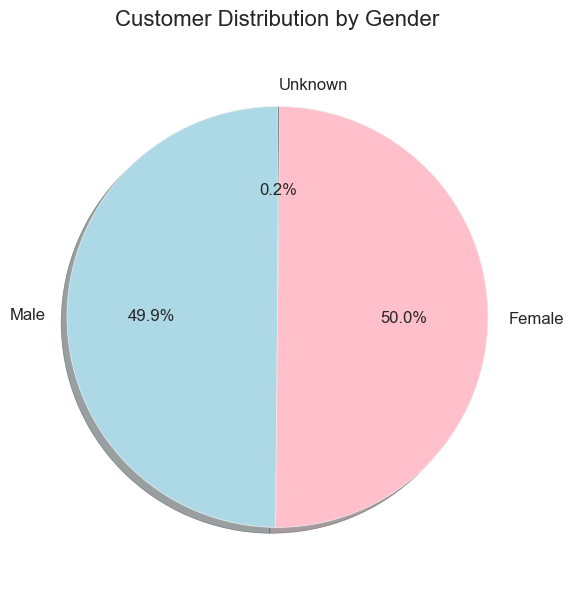

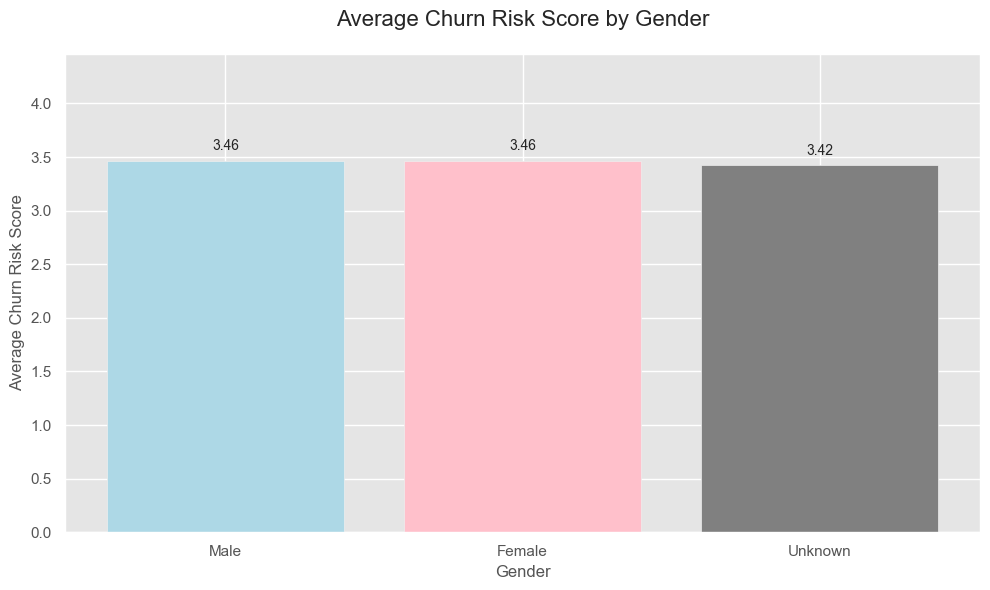


[INSIGHT] Male has the highest average churn risk: 3.46


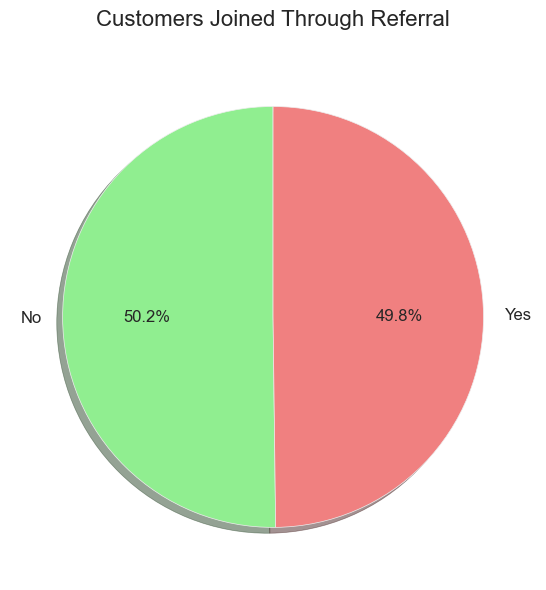

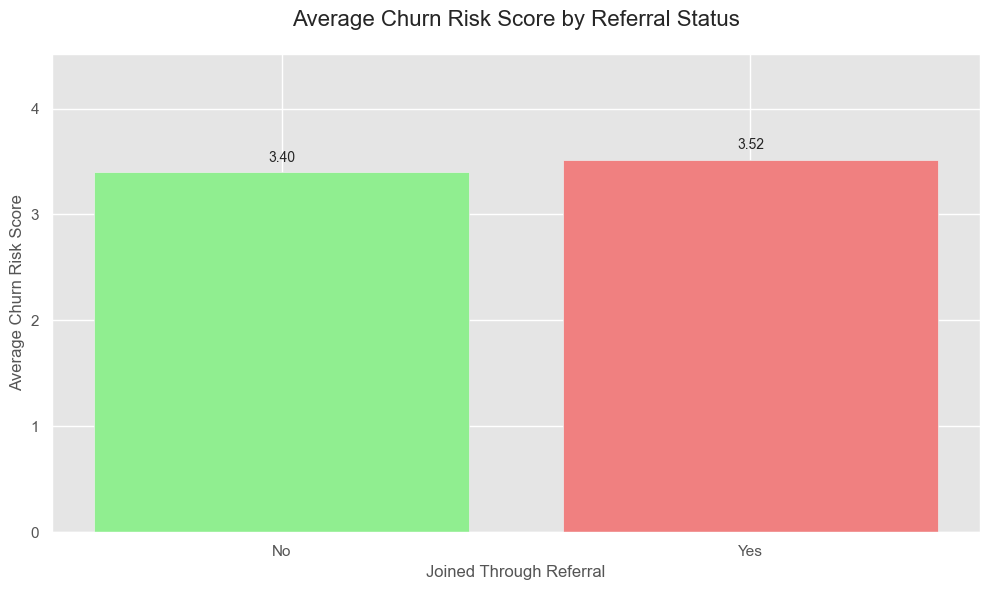


[INSIGHT] Referred customers have 0.12 points higher churn risk


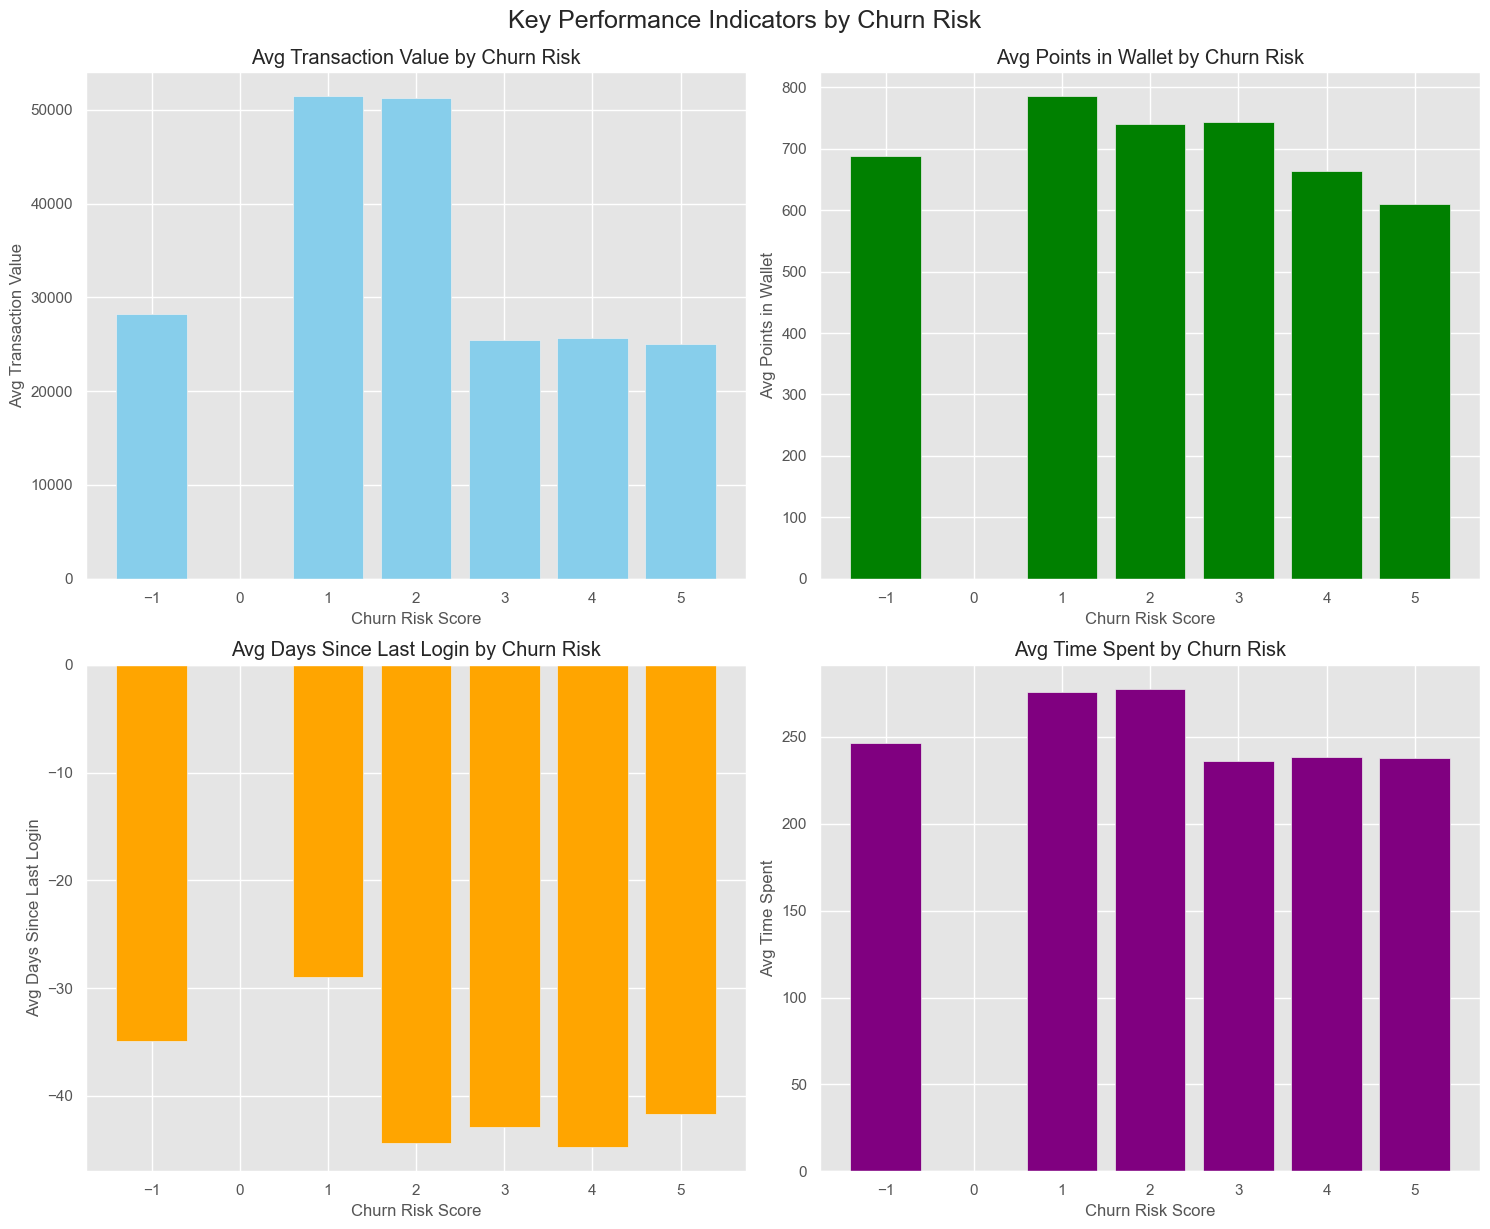


[INSIGHT] avg_transaction_value has the strongest correlation with churn risk: -0.29 (negative)


In [448]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import PercentFormatter

# Set visualization style
plt.style.use('ggplot')
sns.set_palette("Set2")

# 1. Churn Risk Distribution - Pie Chart
def create_churn_risk_pie(data):
    plt.figure(figsize=(10, 8))
    
    # Group churn risk into categories for better visualization
    data['churn_risk_category'] = pd.cut(
        data['churn_risk_score'], 
        bins=[0, 2, 5, 8, 10], 
        labels=['Low Risk (0-2)', 'Medium Risk (3-5)', 'High Risk (6-8)', 'Critical Risk (9-10)']
    )
    
    risk_counts = data['churn_risk_category'].value_counts()
    
    # Create explode effect for high risk segments
    explode = [0, 0, 0.1, 0.15]
    
    # Create pie chart
    risk_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, 
                    explode=explode, shadow=True, textprops={'fontsize': 12},
                    colors=['lightgreen', 'yellow', 'orange', 'red'])
    plt.title('Customer Distribution by Churn Risk', fontsize=16, pad=20)
    plt.ylabel('')
    plt.tight_layout()
    plt.show()
    
    # Return the count and percentage of high-risk customers
    high_risk = risk_counts[risk_counts.index.isin(['High Risk (6-8)', 'Critical Risk (9-10)'])].sum()
    high_risk_pct = high_risk / risk_counts.sum() * 100
    return high_risk, high_risk_pct

# 2. Membership Category Analysis
def analyze_membership_categories(data):
    plt.figure(figsize=(12, 6))
    
    # Create a series for membership categories
    membership_cols = [col for col in data.columns if 'membership_category_' in col]
    membership_data = pd.Series(dtype='float64')
    
    for col in membership_cols:
        membership_name = col.replace('membership_category_', '')
        membership_data[membership_name] = data[col].sum()
    
    # Create bar chart
    ax = membership_data.plot(kind='bar', color='skyblue')
    
    # Add value labels on top of bars
    for i, v in enumerate(membership_data):
        ax.text(i, v + 5, f"{v}", ha='center')
    
    plt.title('Distribution by Membership Category', fontsize=16, pad=20)
    plt.xlabel('Membership Type', fontsize=12)
    plt.ylabel('Number of Customers', fontsize=12)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    
    # Create second plot showing churn risk by membership
    plt.figure(figsize=(12, 6))
    
    avg_churn_by_membership = {}
    for col in membership_cols:
        membership_name = col.replace('membership_category_', '')
        avg_churn_by_membership[membership_name] = data.loc[data[col] == True, 'churn_risk_score'].mean()
    
    # Sort by churn risk score
    avg_churn_series = pd.Series(avg_churn_by_membership).sort_values(ascending=False)
    
    # Create bar chart with gradient color based on risk
    bars = plt.bar(avg_churn_series.index, avg_churn_series.values, color='skyblue')
    
    # Color bars based on risk level
    for i, bar in enumerate(bars):
        if avg_churn_series.values[i] > 7:
            bar.set_color('red')
        elif avg_churn_series.values[i] > 5:
            bar.set_color('orange')
        elif avg_churn_series.values[i] > 3:
            bar.set_color('yellow')
        else:
            bar.set_color('green')
    
    plt.title('Average Churn Risk Score by Membership Category', fontsize=16, pad=20)
    plt.xlabel('Membership Type', fontsize=12)
    plt.ylabel('Average Churn Risk Score', fontsize=12)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    
    return avg_churn_series.idxmax(), avg_churn_series.max()

# 3. Customer Engagement Analysis
def analyze_customer_engagement(data):
    # Create scatter plot of time spent vs transaction value
    plt.figure(figsize=(10, 8))
    
    # Define size based on points in wallet for bubble chart effect
    sizes = data['points_in_wallet'] / data['points_in_wallet'].max() * 100 + 20
    
    # Define color based on churn risk
    colors = data['churn_risk_score']
    
    scatter = plt.scatter(data['avg_time_spent'], data['avg_transaction_value'], 
                         s=sizes, c=colors, cmap='coolwarm', alpha=0.6)
    
    plt.colorbar(scatter, label='Churn Risk Score')
    plt.title('Customer Engagement: Time Spent vs Transaction Value', fontsize=16, pad=20)
    plt.xlabel('Average Time Spent', fontsize=12)
    plt.ylabel('Average Transaction Value', fontsize=12)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()
    
    # Correlation analysis
    plt.figure(figsize=(12, 10))
    engagement_cols = ['avg_time_spent', 'avg_transaction_value', 'points_in_wallet', 
                       'days_since_last_login', 'churn_risk_score']
    
    corr = data[engagement_cols].corr()
    mask = np.triu(np.ones_like(corr, dtype=bool))
    
    sns.heatmap(corr, mask=mask, annot=True, fmt=".2f", cmap='coolwarm', 
               vmin=-1, vmax=1, center=0, square=True, linewidths=.5)
    
    plt.title('Correlation Between Engagement Metrics', fontsize=16, pad=20)
    plt.tight_layout()
    plt.show()
    
    # Return key insights
    time_value_corr = corr.loc['avg_time_spent', 'avg_transaction_value']
    login_churn_corr = corr.loc['days_since_last_login', 'churn_risk_score']
    
    return time_value_corr, login_churn_corr

# 4. Customer Age Analysis
def analyze_customer_age(data):
    plt.figure(figsize=(12, 6))
    
    # Create age groups
    data['age_group'] = pd.cut(
        data['age'], 
        bins=[0, 18, 25, 35, 45, 55, 65, 100],
        labels=['<18', '18-25', '26-35', '36-45', '46-55', '56-65', '65+']
    )
    
    # Count by age group
    age_counts = data['age_group'].value_counts().sort_index()
    
    # Plot
    ax = age_counts.plot(kind='bar', color='lightblue')
    
    # Add value labels
    for i, v in enumerate(age_counts):
        ax.text(i, v + 5, f"{v}", ha='center')
    
    plt.title('Customer Distribution by Age Group', fontsize=16, pad=20)
    plt.xlabel('Age Group', fontsize=12)
    plt.ylabel('Number of Customers', fontsize=12)
    plt.tight_layout()
    plt.show()
    
    # Churn risk by age group
    plt.figure(figsize=(12, 6))
    avg_churn_by_age = data.groupby('age_group')['churn_risk_score'].mean().sort_index()
    
    # Create bar chart with color gradient
    bars = plt.bar(avg_churn_by_age.index, avg_churn_by_age.values, color='skyblue')
    
    # Color bars based on risk level
    for i, bar in enumerate(bars):
        if avg_churn_by_age.values[i] > 7:
            bar.set_color('red')
        elif avg_churn_by_age.values[i] > 5:
            bar.set_color('orange')
        elif avg_churn_by_age.values[i] > 3:
            bar.set_color('yellow')
        else:
            bar.set_color('green')
    
    plt.title('Average Churn Risk Score by Age Group', fontsize=16, pad=20)
    plt.xlabel('Age Group', fontsize=12)
    plt.ylabel('Average Churn Risk Score', fontsize=12)
    plt.tight_layout()
    plt.show()
    
    # Return highest risk age group
    highest_risk_age = avg_churn_by_age.idxmax()
    highest_risk_score = avg_churn_by_age.max()
    
    return highest_risk_age, highest_risk_score

# 5. Customer Tenure Analysis
def analyze_customer_tenure(data):
    plt.figure(figsize=(12, 6))
    
    # Create tenure groups based on days since joining
    data['tenure_group'] = pd.cut(
        data['days_since_joining'],
        bins=[0, 30, 90, 180, 365, 730, 1095, float('inf')],
        labels=['<1 month', '1-3 months', '3-6 months', '6-12 months', '1-2 years', '2-3 years', '3+ years']
    )
    
    # Count by tenure group
    tenure_counts = data['tenure_group'].value_counts().sort_index()
    
    # Plot
    ax = tenure_counts.plot(kind='bar', color='lightgreen')
    
    # Add value labels
    for i, v in enumerate(tenure_counts):
        ax.text(i, v + 5, f"{v}", ha='center')
    
    plt.title('Customer Distribution by Tenure', fontsize=16, pad=20)
    plt.xlabel('Tenure', fontsize=12)
    plt.ylabel('Number of Customers', fontsize=12)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    
    # Churn risk by tenure
    plt.figure(figsize=(12, 6))
    avg_churn_by_tenure = data.groupby('tenure_group')['churn_risk_score'].mean().sort_index()
    
    # Create line chart
    plt.plot(avg_churn_by_tenure.index, avg_churn_by_tenure.values, 'o-', color='blue', linewidth=2)
    
    # Add value labels
    for i, v in enumerate(avg_churn_by_tenure):
        plt.text(i, v + 0.1, f"{v:.2f}", ha='center')
    
    plt.title('Average Churn Risk Score by Tenure', fontsize=16, pad=20)
    plt.xlabel('Tenure', fontsize=12)
    plt.ylabel('Average Churn Risk Score', fontsize=12)
    plt.xticks(rotation=45)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()
    
    # Return insight about tenure-churn relationship
    new_customer_risk = avg_churn_by_tenure.iloc[0]
    loyal_customer_risk = avg_churn_by_tenure.iloc[-1]
    
    return new_customer_risk, loyal_customer_risk

# 6. Regional Analysis
def analyze_region_category(data):
    plt.figure(figsize=(10, 6))
    
    # Create a series for region categories
    region_cols = [col for col in data.columns if 'region_category_' in col]
    region_data = pd.Series(dtype='float64')
    
    for col in region_cols:
        region_name = col.replace('region_category_', '')
        region_data[region_name] = data[col].sum()
    
    # Create pie chart
    explode = [0.1] * len(region_data)
    region_data.plot(kind='pie', autopct='%1.1f%%', startangle=90, 
                    explode=explode, shadow=True, textprops={'fontsize': 12})
    plt.title('Customer Distribution by Region', fontsize=16, pad=20)
    plt.ylabel('')
    plt.tight_layout()
    plt.show()
    
    # Average churn risk by region
    plt.figure(figsize=(10, 6))
    avg_churn_by_region = {}
    
    for col in region_cols:
        region_name = col.replace('region_category_', '')
        avg_churn_by_region[region_name] = data.loc[data[col] == True, 'churn_risk_score'].mean()
    
    # Create bar chart
    region_churn = pd.Series(avg_churn_by_region)
    bars = plt.bar(region_churn.index, region_churn.values)
    
    # Color bars based on risk
    for i, bar in enumerate(bars):
        if region_churn.values[i] > 7:
            bar.set_color('red')
        elif region_churn.values[i] > 5:
            bar.set_color('orange')
        elif region_churn.values[i] > 3:
            bar.set_color('yellow')
        else:
            bar.set_color('green')
    
    plt.title('Average Churn Risk Score by Region', fontsize=16, pad=20)
    plt.xlabel('Region', fontsize=12)
    plt.ylabel('Average Churn Risk Score', fontsize=12)
    plt.xticks(rotation=0)
    plt.tight_layout()
    plt.show()
    
    return region_churn.idxmax(), region_churn.max()

# 7. Gender-based Analysis
def analyze_gender(data):
    plt.figure(figsize=(10, 6))
    
    # Create gender labels
    gender_data = pd.Series(dtype='float64')
    if 'gender_M' in data.columns:
        gender_data['Male'] = data['gender_M'].sum()
    
    # Calculate Female (those who are neither M nor Unknown)
    if 'gender_M' in data.columns and 'gender_Unknown' in data.columns:
        gender_data['Female'] = len(data) - data['gender_M'].sum() - data['gender_Unknown'].sum()
    
    if 'gender_Unknown' in data.columns:
        gender_data['Unknown'] = data['gender_Unknown'].sum()
    
    # Create pie chart
    colors = ['lightblue', 'pink', 'gray']
    gender_data.plot(kind='pie', autopct='%1.1f%%', startangle=90, 
                    shadow=True, textprops={'fontsize': 12}, colors=colors)
    plt.title('Customer Distribution by Gender', fontsize=16, pad=20)
    plt.ylabel('')
    plt.tight_layout()
    plt.show()
    
    # Churn risk by gender
    plt.figure(figsize=(10, 6))
    avg_churn_by_gender = {}
    
    if 'gender_M' in data.columns:
        avg_churn_by_gender['Male'] = data.loc[data['gender_M'] == True, 'churn_risk_score'].mean()
    
    if 'gender_M' in data.columns and 'gender_Unknown' in data.columns:
        # Female = not Male and not Unknown
        female_mask = (data['gender_M'] == False) & (data['gender_Unknown'] == False)
        avg_churn_by_gender['Female'] = data.loc[female_mask, 'churn_risk_score'].mean()
    
    if 'gender_Unknown' in data.columns:
        avg_churn_by_gender['Unknown'] = data.loc[data['gender_Unknown'] == True, 'churn_risk_score'].mean()
    
    # Create bar chart
    gender_churn = pd.Series(avg_churn_by_gender)
    bars = plt.bar(gender_churn.index, gender_churn.values, color=colors)
    
    # Add value labels
    for i, v in enumerate(gender_churn):
        plt.text(i, v + 0.1, f"{v:.2f}", ha='center')
    
    plt.title('Average Churn Risk Score by Gender', fontsize=16, pad=20)
    plt.xlabel('Gender', fontsize=12)
    plt.ylabel('Average Churn Risk Score', fontsize=12)
    plt.ylim(0, max(gender_churn.values) + 1)
    plt.tight_layout()
    plt.show()
    
    return gender_churn.idxmax(), gender_churn.max()

# 8. Referral Analysis
def analyze_referrals(data):
    plt.figure(figsize=(10, 6))
    
    # Check if referral columns exist
    ref_cols = [col for col in data.columns if 'joined_through_referral_' in col]
    if not ref_cols:
        print("No referral data available")
        return None, None
    
    # Create referral data
    referral_data = pd.Series(dtype='float64')
    
    for col in ref_cols:
        ref_status = col.replace('joined_through_referral_', '')
        referral_data[ref_status] = data[col].sum()
    
    # Create pie chart
    colors = ['lightgreen', 'lightcoral']
    referral_data.plot(kind='pie', autopct='%1.1f%%', startangle=90, 
                      shadow=True, textprops={'fontsize': 12}, colors=colors)
    plt.title('Customers Joined Through Referral', fontsize=16, pad=20)
    plt.ylabel('')
    plt.tight_layout()
    plt.show()
    
    # Compare churn risk between referred and non-referred customers
    plt.figure(figsize=(10, 6))
    
    avg_churn_by_ref = {}
    for col in ref_cols:
        ref_status = col.replace('joined_through_referral_', '')
        avg_churn_by_ref[ref_status] = data.loc[data[col] == True, 'churn_risk_score'].mean()
    
    # Create bar chart
    ref_churn = pd.Series(avg_churn_by_ref)
    bars = plt.bar(ref_churn.index, ref_churn.values, color=colors)
    
    # Add value labels
    for i, v in enumerate(ref_churn):
        plt.text(i, v + 0.1, f"{v:.2f}", ha='center')
    
    plt.title('Average Churn Risk Score by Referral Status', fontsize=16, pad=20)
    plt.xlabel('Joined Through Referral', fontsize=12)
    plt.ylabel('Average Churn Risk Score', fontsize=12)
    plt.ylim(0, max(ref_churn.values) + 1)
    plt.tight_layout()
    plt.show()
    
    # Calculate the churn risk difference
    if 'Yes' in ref_churn and 'No' in ref_churn:
        diff = ref_churn['No'] - ref_churn['Yes']
        return diff, ref_churn['Yes'] < ref_churn['No']
    else:
        return None, None

# 9. KPI Dashboard - Combined Key Metrics
def create_kpi_dashboard(data):
    # Create figure
    fig, axs = plt.subplots(2, 2, figsize=(15, 12))
    
    # 1. Average Transaction Value vs Churn Risk
    avg_txn_by_risk = data.groupby('churn_risk_score')['avg_transaction_value'].mean()
    axs[0, 0].bar(avg_txn_by_risk.index, avg_txn_by_risk.values, color='skyblue')
    axs[0, 0].set_title('Avg Transaction Value by Churn Risk')
    axs[0, 0].set_xlabel('Churn Risk Score')
    axs[0, 0].set_ylabel('Avg Transaction Value')
    
    # 2. Points in Wallet vs Churn Risk
    avg_points_by_risk = data.groupby('churn_risk_score')['points_in_wallet'].mean()
    axs[0, 1].bar(avg_points_by_risk.index, avg_points_by_risk.values, color='green')
    axs[0, 1].set_title('Avg Points in Wallet by Churn Risk')
    axs[0, 1].set_xlabel('Churn Risk Score')
    axs[0, 1].set_ylabel('Avg Points in Wallet')
    
    # 3. Days Since Last Login vs Churn Risk
    avg_login_by_risk = data.groupby('churn_risk_score')['days_since_last_login'].mean()
    axs[1, 0].bar(avg_login_by_risk.index, avg_login_by_risk.values, color='orange')
    axs[1, 0].set_title('Avg Days Since Last Login by Churn Risk')
    axs[1, 0].set_xlabel('Churn Risk Score')
    axs[1, 0].set_ylabel('Avg Days Since Last Login')
    
    # 4. Time Spent vs Churn Risk
    avg_time_by_risk = data.groupby('churn_risk_score')['avg_time_spent'].mean()
    axs[1, 1].bar(avg_time_by_risk.index, avg_time_by_risk.values, color='purple')
    axs[1, 1].set_title('Avg Time Spent by Churn Risk')
    axs[1, 1].set_xlabel('Churn Risk Score')
    axs[1, 1].set_ylabel('Avg Time Spent')
    
    plt.tight_layout()
    plt.suptitle('Key Performance Indicators by Churn Risk', fontsize=18, y=1.02)
    plt.show()
    
    # Find correlations
    corr_metrics = ['churn_risk_score', 'avg_transaction_value', 'points_in_wallet', 
                   'days_since_last_login', 'avg_time_spent']
    correlations = data[corr_metrics].corr()['churn_risk_score'].drop('churn_risk_score')
    
    # Sort by absolute correlation value
    abs_corr = correlations.abs().sort_values(ascending=False)
    top_factor = abs_corr.index[0]
    top_corr = correlations[top_factor]
    
    return top_factor, top_corr

# Run all analyses
try:
    print("Generating comprehensive business insights...")
    
    # 1. Churn Risk Distribution
    high_risk_count, high_risk_pct = create_churn_risk_pie(data_train)
    print(f"\n[INSIGHT] {high_risk_count} customers ({high_risk_pct:.1f}%) are at high or critical risk of churn")
    
    # 2. Membership Category Analysis
    highest_risk_membership, highest_membership_score = analyze_membership_categories(data_train)
    print(f"\n[INSIGHT] {highest_risk_membership} has the highest average churn risk score: {highest_membership_score:.2f}")
    
    # 3. Customer Engagement Analysis
    time_value_corr, login_churn_corr = analyze_customer_engagement(data_train)
    print(f"\n[INSIGHT] Correlation between time spent and transaction value: {time_value_corr:.2f}")
    print(f"[INSIGHT] Correlation between days since last login and churn risk: {login_churn_corr:.2f}")
    
    # 4. Age Analysis
    highest_risk_age, highest_age_score = analyze_customer_age(data_train)
    print(f"\n[INSIGHT] Age group {highest_risk_age} has the highest churn risk: {highest_age_score:.2f}")
    
    # 5. Tenure Analysis
    new_customer_risk, loyal_customer_risk = analyze_customer_tenure(data_train)
    print(f"\n[INSIGHT] New customers (<1 month) have average churn risk of {new_customer_risk:.2f}")
    print(f"[INSIGHT] Loyal customers (3+ years) have average churn risk of {loyal_customer_risk:.2f}")
    
    # 6. Regional Analysis
    highest_risk_region, highest_region_score = analyze_region_category(data_train)
    print(f"\n[INSIGHT] {highest_risk_region} has the highest average churn risk: {highest_region_score:.2f}")
    
    # 7. Gender Analysis
    highest_risk_gender, highest_gender_score = analyze_gender(data_train)
    print(f"\n[INSIGHT] {highest_risk_gender} has the highest average churn risk: {highest_gender_score:.2f}")
    
    # 8. Referral Analysis
    ref_diff, is_referral_better = analyze_referrals(data_train)
    if ref_diff is not None:
        better_worse = "lower" if is_referral_better else "higher"
        print(f"\n[INSIGHT] Referred customers have {abs(ref_diff):.2f} points {better_worse} churn risk")
    
    # 9. KPI Dashboard
    top_churn_factor, top_churn_corr = create_kpi_dashboard(data_train)
    corr_type = "positive" if top_churn_corr > 0 else "negative"
    print(f"\n[INSIGHT] {top_churn_factor} has the strongest correlation with churn risk: {top_churn_corr:.2f} ({corr_type})")
    
except Exception as e:
    print(f"Error: {e}")
    print("Make sure all column names match your dataset exactly.")

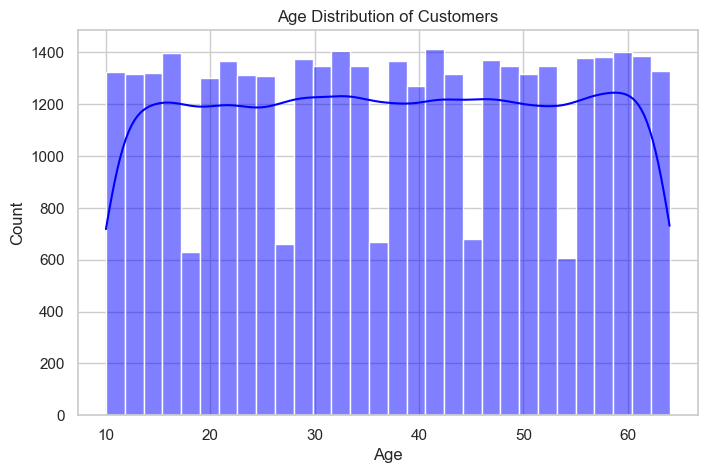

C:\Users\Krishana Gupta\AppData\Local\Temp\ipykernel_5716\4214003614.py:29: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




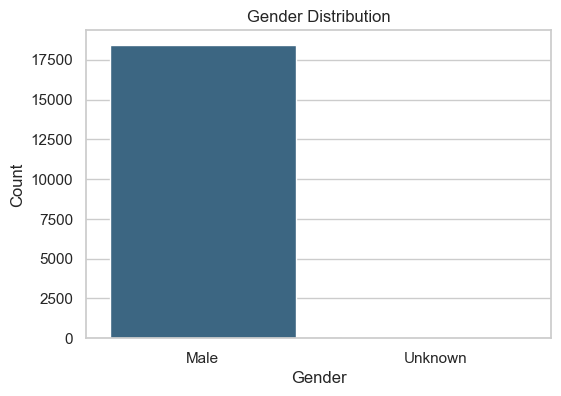

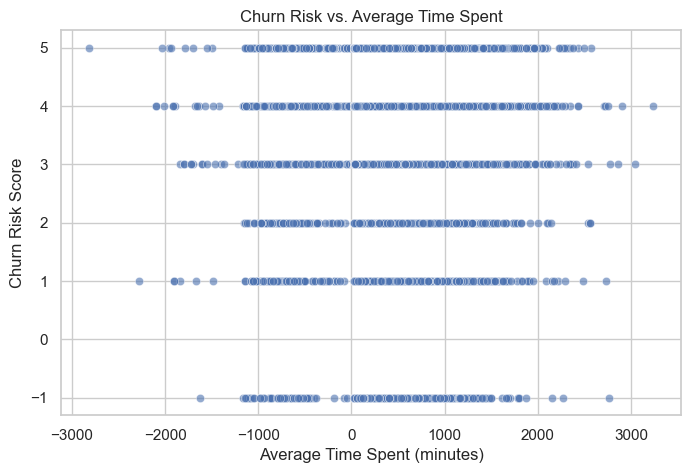

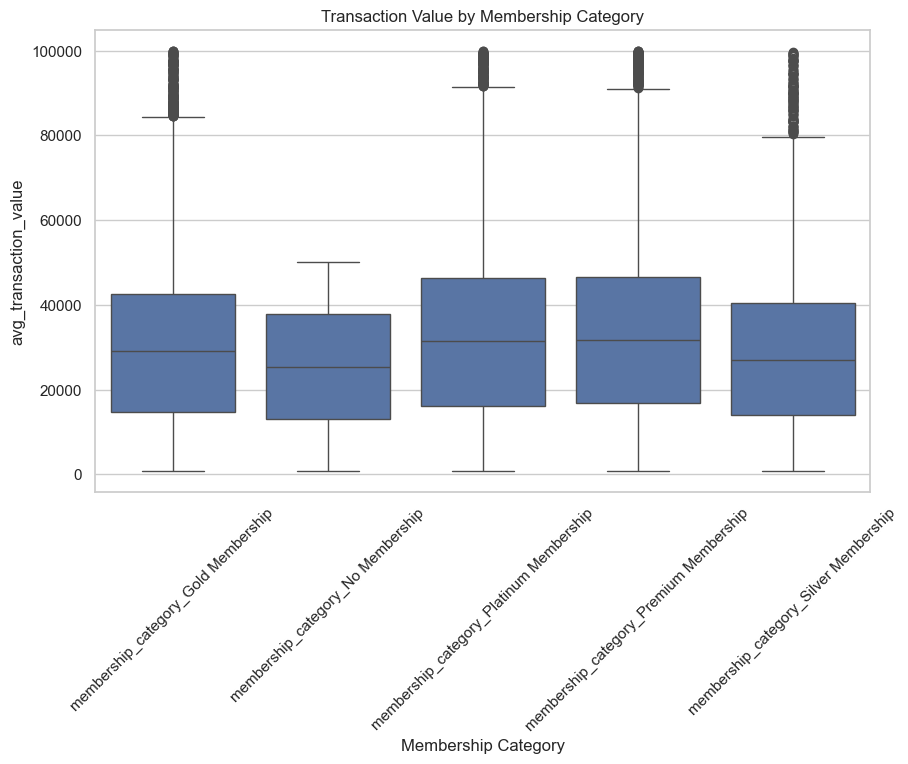

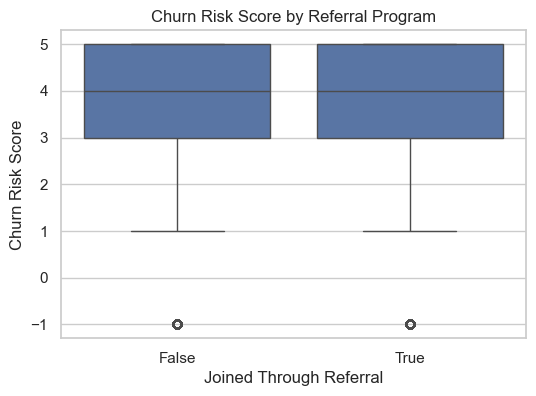

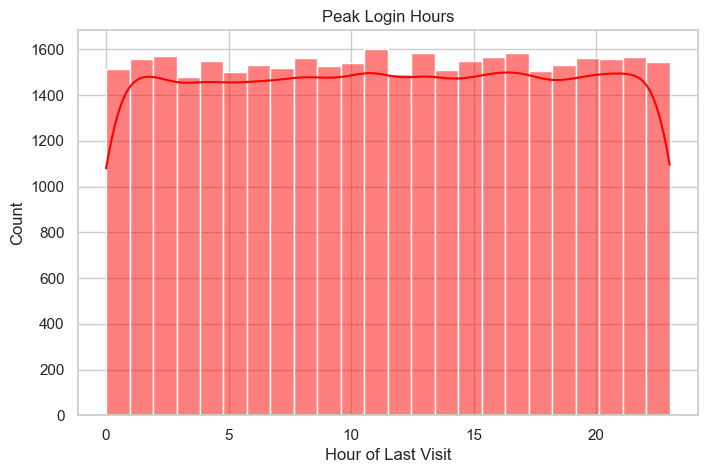

C:\Users\Krishana Gupta\AppData\Local\Temp\ipykernel_5716\4214003614.py:76: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




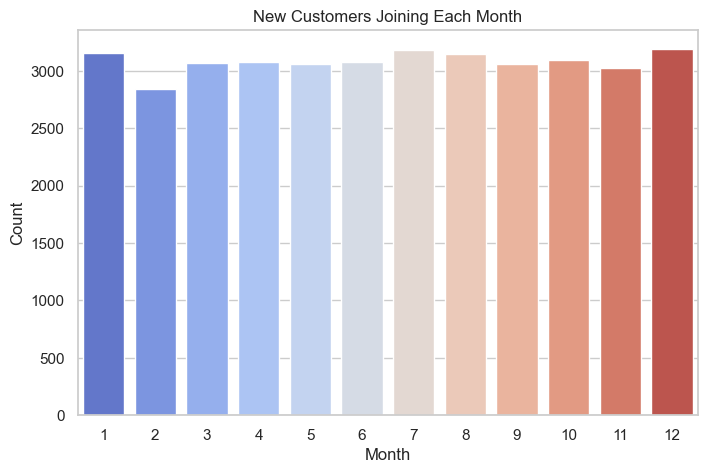

In [449]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load DataFrames (Ensure data is loaded properly)
# data_train = pd.read_csv("data_train.csv")  # Uncomment if loading from CSV
# df = pd.read_csv("df.csv")  # Uncomment if loading from CSV

# Using data_train for insights
df = data_train.copy()

# Set visualization style
sns.set(style="whitegrid")

# ----- 1. Age Distribution -----
plt.figure(figsize=(8,5))
sns.histplot(df['age'], bins=30, kde=True, color="blue")
plt.title("Age Distribution of Customers")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

# ----- 2. Gender Distribution -----
plt.figure(figsize=(6,4))
df_gender = df[['gender_M', 'gender_Unknown']].sum().reset_index()
df_gender.columns = ['Gender', 'Count']
df_gender['Gender'] = df_gender['Gender'].replace({'gender_M': 'Male', 'gender_Unknown': 'Unknown'})

sns.barplot(x='Gender', y='Count', data=df_gender, palette="viridis")
plt.title("Gender Distribution")
plt.show()

# ----- 3. Churn Risk vs. Time Spent -----
plt.figure(figsize=(8,5))
sns.scatterplot(x=df["avg_time_spent"], y=df["churn_risk_score"], alpha=0.6)
plt.title("Churn Risk vs. Average Time Spent")
plt.xlabel("Average Time Spent (minutes)")
plt.ylabel("Churn Risk Score")
plt.show()

# ----- 4. Membership vs. Avg Transaction Value -----
plt.figure(figsize=(10,6))
membership_cols = [
    'membership_category_Gold Membership',
    'membership_category_No Membership',
    'membership_category_Platinum Membership',
    'membership_category_Premium Membership',
    'membership_category_Silver Membership'
]
df_melted = df.melt(id_vars=['avg_transaction_value'], value_vars=membership_cols, var_name="Membership Category", value_name="IsMember")
df_melted = df_melted[df_melted["IsMember"] == True]

sns.boxplot(x='Membership Category', y='avg_transaction_value', data=df_melted)
plt.xticks(rotation=45)
plt.title("Transaction Value by Membership Category")
plt.show()

# ----- 5. Referral Program Impact on Churn -----
plt.figure(figsize=(6,4))
sns.boxplot(x=df["joined_through_referral_Yes"], y=df["churn_risk_score"])
plt.title("Churn Risk Score by Referral Program")
plt.xlabel("Joined Through Referral")
plt.ylabel("Churn Risk Score")
plt.show()

# ----- 6. Last Login Hour Analysis -----
plt.figure(figsize=(8,5))
sns.histplot(df["last_visit_time_hour"], bins=24, kde=True, color="red")
plt.title("Peak Login Hours")
plt.xlabel("Hour of Last Visit")
plt.ylabel("Count")
plt.show()

# ----- 7. Monthly New Customers -----
plt.figure(figsize=(8,5))
sns.countplot(x=df["joining_month"], palette="coolwarm")
plt.title("New Customers Joining Each Month")
plt.xlabel("Month")
plt.ylabel("Count")
plt.show()


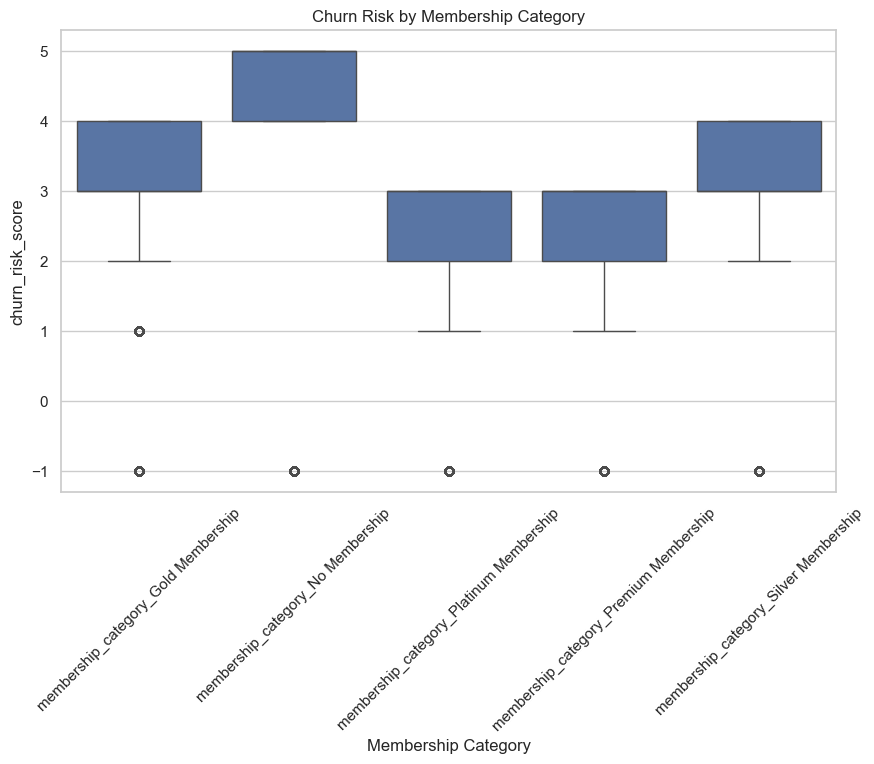

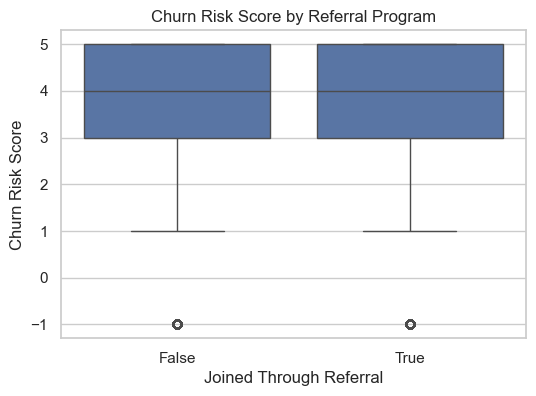

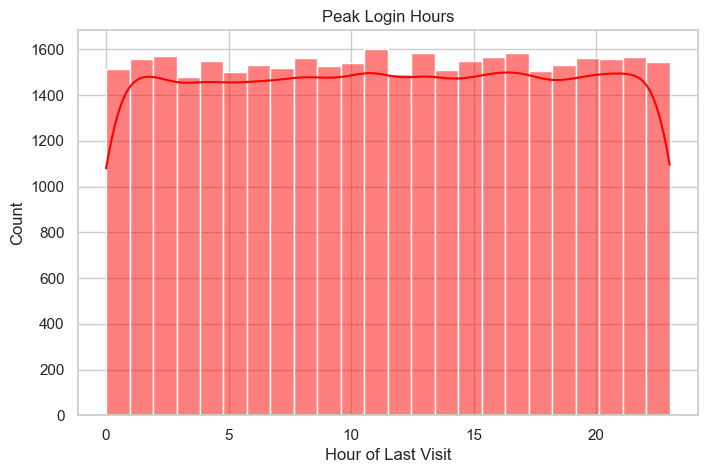

C:\Users\Krishana Gupta\AppData\Local\Temp\ipykernel_5716\2553537077.py:48: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




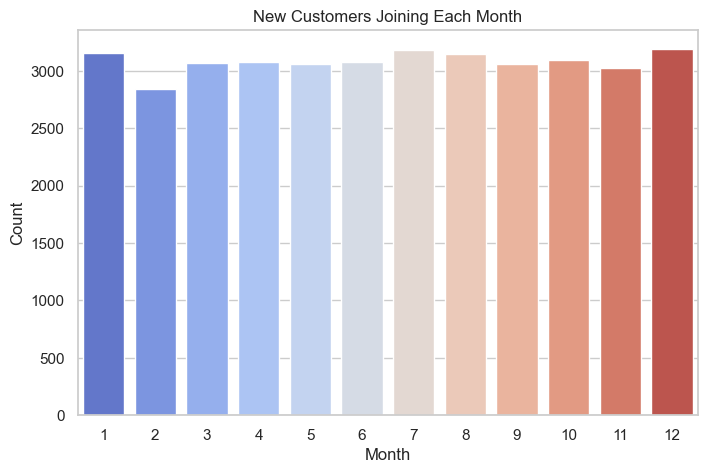

In [450]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load DataFrames (Replace with actual file paths)
# data_train = pd.read_csv("data_train.csv")  
# df = pd.read_csv("df.csv")

df = data_train.copy()

sns.set(style="whitegrid")

# ----- 3A. Churn Risk by Membership Category -----
plt.figure(figsize=(10,6))
membership_cols = [
    'membership_category_Gold Membership',
    'membership_category_No Membership',
    'membership_category_Platinum Membership',
    'membership_category_Premium Membership',
    'membership_category_Silver Membership'
]
df_melted = df.melt(id_vars=['churn_risk_score'], value_vars=membership_cols, var_name="Membership Category", value_name="IsMember")
df_melted = df_melted[df_melted["IsMember"] == True]

sns.boxplot(x='Membership Category', y='churn_risk_score', data=df_melted)
plt.xticks(rotation=45)
plt.title("Churn Risk by Membership Category")
plt.show()

# ----- 3B. Referral Program Impact on Churn -----
plt.figure(figsize=(6,4))
sns.boxplot(x=df["joined_through_referral_Yes"], y=df["churn_risk_score"])
plt.title("Churn Risk Score by Referral Program")
plt.xlabel("Joined Through Referral")
plt.ylabel("Churn Risk Score")
plt.show()

# ----- 4A. Last Login Hour Analysis -----
plt.figure(figsize=(8,5))
sns.histplot(df["last_visit_time_hour"], bins=24, kde=True, color="red")
plt.title("Peak Login Hours")
plt.xlabel("Hour of Last Visit")
plt.ylabel("Count")
plt.show()

# ----- 4B. Monthly New Customers -----
plt.figure(figsize=(8,5))
sns.countplot(x=df["joining_month"], palette="coolwarm")
plt.title("New Customers Joining Each Month")
plt.xlabel("Month")
plt.ylabel("Count")
plt.show()


In [451]:
#from ydata_profiling import ProfileReport
#profile = ProfileReport(data_train)
#profile.to_file("churn_reporttrain.html")

In [452]:
data_train.isnull().sum()

age                                               0
days_since_last_login                             0
avg_time_spent                                    0
avg_transaction_value                             0
points_in_wallet                                  0
churn_risk_score                                  0
joining_day                                       0
joining_month                                     0
joining_year                                      0
last_visit_time_hour                              0
last_visit_time_minutes                           0
last_visit_time_seconds                           0
days_since_joining                                0
gender_M                                          0
gender_Unknown                                    0
region_category_Town                              0
region_category_Village                           0
membership_category_Gold Membership               0
membership_category_No Membership                 0
membership_c

### Test dataset

In [453]:
tf = pd.read_csv("dataset/test.csv")
tf.head()

customer_id              Name  age gender  \
0  fffe43004900440031003700300030003400    Alethia Meints   50      F   
1  fffe43004900440031003900370037003300        Ming Lopez   41      M   
2  fffe43004900440034003800360037003000  Carina Flannigan   31      F   
3  fffe43004900440036003200370033003400      Kyung Wanner   64      M   
4  fffe43004900440035003000370031003900       Enola Gatto   16      F   

  security_no region_category membership_category joining_date  \
0     OQJ1XAY         Village  Premium Membership   2015-11-02   
1     OUQRPKO         Village     Gold Membership   2016-03-01   
2     02J2RE7            Town   Silver Membership   2017-03-03   
3     5YEQIF1            Town   Silver Membership   2017-08-18   
4     100RYB5            Town       No Membership   2015-05-05   

  joined_through_referral referral_id  ... days_since_last_login  \
0                      No    xxxxxxxx  ...                    12   
1                      No    xxxxxxxx  ...                    11   
2                      No    xxxxxxxx  ...                    18   
3                     Yes     CID8941  ...                  -999   
4                     Yes     CID5690  ...                     6   

  avg_time_spent avg_transaction_value avg_frequency_login_days  \
0         386.26              40721.44                      7.0   
1          37.80               9644.40                      9.0   
2         215.36               3693.25                     21.0   
3          44.57              36809.56                     11.0   
4         349.88              40675.86                      8.0   

   points_in_wallet  used_special_discount  offer_application_preference  \
0        733.830000                    Yes                            No   
1        726.000000                    Yes                            No   
2        713.780000                    Yes                            No   
3        744.970000                    Yes                            No   
4        299.048351                     No                           Yes   

  past_complaint          complaint_status              feedback  
0             No            Not Applicable  Poor Product Quality  
1             No            Not Applicable          Poor Website  
2            Yes       Solved in Follow-up   No reason specified  
3            Yes  No Information Available          Too many ads  
4            Yes       Solved in Follow-up          Poor Website  

[5 rows x 24 columns]

In [454]:
tf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19919 entries, 0 to 19918
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   customer_id                   19919 non-null  object 
 1   Name                          19919 non-null  object 
 2   age                           19919 non-null  int64  
 3   gender                        19919 non-null  object 
 4   security_no                   19919 non-null  object 
 5   region_category               16971 non-null  object 
 6   membership_category           19919 non-null  object 
 7   joining_date                  19919 non-null  object 
 8   joined_through_referral       19919 non-null  object 
 9   referral_id                   19919 non-null  object 
 10  preferred_offer_types         19760 non-null  object 
 11  medium_of_operation           19919 non-null  object 
 12  internet_option               19919 non-null  object 
 13  l

In [455]:
tf.isnull().sum()

customer_id                        0
Name                               0
age                                0
gender                             0
security_no                        0
region_category                 2948
membership_category                0
joining_date                       0
joined_through_referral            0
referral_id                        0
preferred_offer_types            159
medium_of_operation                0
internet_option                    0
last_visit_time                    0
days_since_last_login              0
avg_time_spent                     0
avg_transaction_value              0
avg_frequency_login_days           0
points_in_wallet                1963
used_special_discount              0
offer_application_preference       0
past_complaint                     0
complaint_status                   0
feedback                           0
dtype: int64

In [456]:
# preprocessing
# filling categorical missing column
tf['region_category']= tf['region_category'].fillna(tf['region_category'].mode()[0])
tf['preferred_offer_types']= tf['preferred_offer_types'].fillna(tf['preferred_offer_types'].mode()[0])

# handle numerical missing column
tf['points_in_wallet']= tf['points_in_wallet'].fillna(tf['points_in_wallet'].mean())

# drop one column
tf.drop('complaint_status', axis=1, inplace=True)

# Exploratory data analysis
tf["joining_day"] = pd.to_datetime(tf["joining_date"], format="%Y-%m-%d").dt.day
tf["joining_month"] = pd.to_datetime(tf["joining_date"], format="%Y-%m-%d").dt.month
tf["joining_year"] = pd.to_datetime(tf["joining_date"], format="%Y-%m-%d").dt.year


tf.drop(["joining_date"], axis=1, inplace=True)

# Extract hour, minutes and second
tf[['last_visit_time_hour','last_visit_time_minutes','last_visit_time_seconds']] = tf['last_visit_time'].astype(str).str.split(':', expand=True).astype(int)

# Now we can drop Arrival_Time as it is of no use
tf.drop(["last_visit_time"], axis = 1, inplace = True)

# Handling categorical data
gender = pd.get_dummies(tf[['gender']], drop_first=True)
region = pd.get_dummies(tf[['region_category']], drop_first=True)
membership = pd.get_dummies(tf[['membership_category']], drop_first=True)
referal = pd.get_dummies(tf[['joined_through_referral']], drop_first=True)
offer = pd.get_dummies(tf[['preferred_offer_types']], drop_first=True)
medium = pd.get_dummies(tf[['medium_of_operation']], drop_first=True)
internet = pd.get_dummies(tf[['internet_option']], drop_first=True)
discount = pd.get_dummies(tf[['used_special_discount']], drop_first=True)
application = pd.get_dummies(tf[['offer_application_preference']], drop_first=True)
complaint = pd.get_dummies(tf[['past_complaint']], drop_first=True)
feedback = pd.get_dummies(tf[['feedback']], drop_first=True)

data_test = pd.concat([tf, gender, region, membership, referal, offer, medium, internet, discount, application, complaint, feedback ], axis = 1)

data_test.drop(["customer_id", "Name", "gender", "security_no", "region_category", "membership_category", "joined_through_referral", "referral_id", "preferred_offer_types", "medium_of_operation", "internet_option", "used_special_discount", "offer_application_preference", "past_complaint", "feedback", "avg_frequency_login_days" ], axis = 1, inplace = True)

data_test.head()

age  days_since_last_login  avg_time_spent  avg_transaction_value  \
0   50                     12          386.26               40721.44   
1   41                     11           37.80                9644.40   
2   31                     18          215.36                3693.25   
3   64                   -999           44.57               36809.56   
4   16                      6          349.88               40675.86   

   points_in_wallet  joining_day  joining_month  joining_year  \
0        733.830000            2             11          2015   
1        726.000000            1              3          2016   
2        713.780000            3              3          2017   
3        744.970000           18              8          2017   
4        299.048351            5              5          2015   

   last_visit_time_hour  last_visit_time_minutes  ...  \
0                     7                       19  ...   
1                    22                       21  ...   
2                    16                       40  ...   
3                    14                       56  ...   
4                     2                       57  ...   

   offer_application_preference_Yes  past_complaint_Yes  \
0                             False               False   
1                             False               False   
2                             False                True   
3                             False                True   
4                              True                True   

   feedback_Poor Customer Service  feedback_Poor Product Quality  \
0                           False                           True   
1                           False                          False   
2                           False                          False   
3                           False                          False   
4                           False                          False   

   feedback_Poor Website  feedback_Products always in Stock  \
0                  False                              False   
1                   True                              False   
2                  False                              False   
3                  False                              False   
4                   True                              False   

   feedback_Quality Customer Care  feedback_Reasonable Price  \
0                           False                      False   
1                           False                      False   
2                           False                      False   
3                           False                      False   
4                           False                      False   

   feedback_Too many ads  feedback_User Friendly Website  
0                  False                           False  
1                  False                           False  
2                  False                           False  
3                   True                           False  
4                  False                           False  

[5 rows x 40 columns]

In [457]:
data_test.head()

age  days_since_last_login  avg_time_spent  avg_transaction_value  \
0   50                     12          386.26               40721.44   
1   41                     11           37.80                9644.40   
2   31                     18          215.36                3693.25   
3   64                   -999           44.57               36809.56   
4   16                      6          349.88               40675.86   

   points_in_wallet  joining_day  joining_month  joining_year  \
0        733.830000            2             11          2015   
1        726.000000            1              3          2016   
2        713.780000            3              3          2017   
3        744.970000           18              8          2017   
4        299.048351            5              5          2015   

   last_visit_time_hour  last_visit_time_minutes  ...  \
0                     7                       19  ...   
1                    22                       21  ...   
2                    16                       40  ...   
3                    14                       56  ...   
4                     2                       57  ...   

   offer_application_preference_Yes  past_complaint_Yes  \
0                             False               False   
1                             False               False   
2                             False                True   
3                             False                True   
4                              True                True   

   feedback_Poor Customer Service  feedback_Poor Product Quality  \
0                           False                           True   
1                           False                          False   
2                           False                          False   
3                           False                          False   
4                           False                          False   

   feedback_Poor Website  feedback_Products always in Stock  \
0                  False                              False   
1                   True                              False   
2                  False                              False   
3                  False                              False   
4                   True                              False   

   feedback_Quality Customer Care  feedback_Reasonable Price  \
0                           False                      False   
1                           False                      False   
2                           False                      False   
3                           False                      False   
4                           False                      False   

   feedback_Too many ads  feedback_User Friendly Website  
0                  False                           False  
1                  False                           False  
2                  False                           False  
3                   True                           False  
4                  False                           False  

[5 rows x 40 columns]

In [458]:
data_test.shape

(19919, 40)

In [459]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19919 entries, 0 to 19918
Data columns (total 40 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   age                                          19919 non-null  int64  
 1   days_since_last_login                        19919 non-null  int64  
 2   avg_time_spent                               19919 non-null  float64
 3   avg_transaction_value                        19919 non-null  float64
 4   points_in_wallet                             19919 non-null  float64
 5   joining_day                                  19919 non-null  int32  
 6   joining_month                                19919 non-null  int32  
 7   joining_year                                 19919 non-null  int32  
 8   last_visit_time_hour                         19919 non-null  int64  
 9   last_visit_time_minutes                      19919 non-null  int64  
 10

In [460]:
data_test.isnull().sum()

age                                            0
days_since_last_login                          0
avg_time_spent                                 0
avg_transaction_value                          0
points_in_wallet                               0
joining_day                                    0
joining_month                                  0
joining_year                                   0
last_visit_time_hour                           0
last_visit_time_minutes                        0
last_visit_time_seconds                        0
gender_M                                       0
gender_Unknown                                 0
region_category_Town                           0
region_category_Village                        0
membership_category_Gold Membership            0
membership_category_No Membership              0
membership_category_Platinum Membership        0
membership_category_Premium Membership         0
membership_category_Silver Membership          0
joined_through_refer

In [461]:
# Check category distributions
for col in imbalanced_columns:
    print(f"{col} value counts before SMOTE:\n{data_test[col].value_counts(normalize=True) * 100}\n")


gender_Unknown value counts before SMOTE:
gender_Unknown
False    99.819268
True      0.180732
Name: proportion, dtype: float64

medium_of_operation_Both value counts before SMOTE:
medium_of_operation_Both
False    89.522566
True     10.477434
Name: proportion, dtype: float64

feedback_Products always in Stock value counts before SMOTE:
feedback_Products always in Stock
False    96.094181
True      3.905819
Name: proportion, dtype: float64

feedback_Quality Customer Care value counts before SMOTE:
feedback_Quality Customer Care
False    96.209649
True      3.790351
Name: proportion, dtype: float64

feedback_Reasonable Price value counts before SMOTE:
feedback_Reasonable Price
False    96.043978
True      3.956022
Name: proportion, dtype: float64

feedback_User Friendly Website value counts before SMOTE:
feedback_User Friendly Website
False    96.540991
True      3.459009
Name: proportion, dtype: float64



In [462]:
#from ydata_profiling import ProfileReport

#profile = ProfileReport(data_test)
#profile.to_file("churn_reporttest.html")

# Feature Selection

Finding out the best feature which will contribute and have good relation with target variable.
Following are some of the feature selection methods,


1. <span style="color: purple;">**heatmap**</span>
2. <span style="color: purple;">**feature_importance_**</span>
3. <span style="color: purple;">**SelectKBest**</span>

In [463]:
data_train.head()

age  days_since_last_login  avg_time_spent  avg_transaction_value  \
0   18                     17          300.63               53005.25   
1   32                     16          306.34               12838.38   
2   44                     14          516.16               21027.00   
3   37                     11           53.27               25239.56   
4   31                     20          113.13               24483.66   

   points_in_wallet  churn_risk_score  joining_day  joining_month  \
0        781.750000                 2           17              8   
1        686.882199                 1           28              8   
2        500.690000                 5           11             11   
3        567.660000                 5           29             10   
4        663.060000                 5           12              9   

   joining_year  last_visit_time_hour  ...  feedback_Poor Product Quality  \
0          2017                    16  ...                          False   
1          2017                    12  ...                          False   
2          2016                    22  ...                          False   
3          2016                    15  ...                          False   
4          2017                    15  ...                          False   

   feedback_Poor Website  feedback_Products always in Stock  \
0                  False                               True   
1                  False                              False   
2                   True                              False   
3                   True                              False   
4                   True                              False   

   feedback_Quality Customer Care  feedback_Reasonable Price  \
0                           False                      False   
1                            True                      False   
2                           False                      False   
3                           False                      False   
4                           False                      False   

   feedback_Too many ads  feedback_User Friendly Website  churn_risk_category  \
0                  False                           False       Low Risk (0-2)   
1                  False                           False       Low Risk (0-2)   
2                  False                           False    Medium Risk (3-5)   
3                  False                           False    Medium Risk (3-5)   
4                  False                           False    Medium Risk (3-5)   

   age_group  tenure_group  
0        <18      3+ years  
1      26-35      3+ years  
2      36-45      3+ years  
3      36-45      3+ years  
4      26-35      3+ years  

[5 rows x 45 columns]

In [464]:
data_train.columns

Index(['age', 'days_since_last_login', 'avg_time_spent',
       'avg_transaction_value', 'points_in_wallet', 'churn_risk_score',
       'joining_day', 'joining_month', 'joining_year', 'last_visit_time_hour',
       'last_visit_time_minutes', 'last_visit_time_seconds',
       'days_since_joining', 'gender_M', 'gender_Unknown',
       'region_category_Town', 'region_category_Village',
       'membership_category_Gold Membership',
       'membership_category_No Membership',
       'membership_category_Platinum Membership',
       'membership_category_Premium Membership',
       'membership_category_Silver Membership', 'joined_through_referral_No',
       'joined_through_referral_Yes',
       'preferred_offer_types_Gift Vouchers/Coupons',
       'preferred_offer_types_Without Offers', 'medium_of_operation_Both',
       'medium_of_operation_Desktop', 'medium_of_operation_Smartphone',
       'internet_option_Mobile_Data', 'internet_option_Wi-Fi',
       'used_special_discount_Yes', 'offer_ap

In [465]:
x = data_train.loc[:, ['age', 'days_since_last_login', 'avg_time_spent',
       'avg_transaction_value', 'points_in_wallet',
       'joining_day', 'joining_month', 'joining_year', 'last_visit_time_hour',
       'last_visit_time_minutes', 'last_visit_time_seconds', 'gender_M',
       'gender_Unknown', 'region_category_Town', 'region_category_Village',
       'membership_category_Gold Membership',
       'membership_category_No Membership',
       'membership_category_Platinum Membership',
       'membership_category_Premium Membership',
       'membership_category_Silver Membership', 'joined_through_referral_No',
       'joined_through_referral_Yes',
       'preferred_offer_types_Gift Vouchers/Coupons',
       'preferred_offer_types_Without Offers', 'medium_of_operation_Both',
       'medium_of_operation_Desktop', 'medium_of_operation_Smartphone',
       'internet_option_Mobile_Data', 'internet_option_Wi-Fi',
       'used_special_discount_Yes', 'offer_application_preference_Yes',
       'past_complaint_Yes', 'feedback_Poor Customer Service',
       'feedback_Poor Product Quality', 'feedback_Poor Website',
       'feedback_Products always in Stock', 'feedback_Quality Customer Care',
       'feedback_Reasonable Price', 'feedback_Too many ads',
       'feedback_User Friendly Website']]

In [466]:
x.head()

age  days_since_last_login  avg_time_spent  avg_transaction_value  \
0   18                     17          300.63               53005.25   
1   32                     16          306.34               12838.38   
2   44                     14          516.16               21027.00   
3   37                     11           53.27               25239.56   
4   31                     20          113.13               24483.66   

   points_in_wallet  joining_day  joining_month  joining_year  \
0        781.750000           17              8          2017   
1        686.882199           28              8          2017   
2        500.690000           11             11          2016   
3        567.660000           29             10          2016   
4        663.060000           12              9          2017   

   last_visit_time_hour  last_visit_time_minutes  ...  \
0                    16                        8  ...   
1                    12                       38  ...   
2                    22                       53  ...   
3                    15                       57  ...   
4                    15                       46  ...   

   offer_application_preference_Yes  past_complaint_Yes  \
0                              True               False   
1                             False                True   
2                              True                True   
3                              True                True   
4                              True                True   

   feedback_Poor Customer Service  feedback_Poor Product Quality  \
0                           False                          False   
1                           False                          False   
2                           False                          False   
3                           False                          False   
4                           False                          False   

   feedback_Poor Website  feedback_Products always in Stock  \
0                  False                               True   
1                  False                              False   
2                   True                              False   
3                   True                              False   
4                   True                              False   

   feedback_Quality Customer Care  feedback_Reasonable Price  \
0                           False                      False   
1                            True                      False   
2                           False                      False   
3                           False                      False   
4                           False                      False   

   feedback_Too many ads  feedback_User Friendly Website  
0                  False                           False  
1                  False                           False  
2                  False                           False  
3                  False                           False  
4                  False                           False  

[5 rows x 40 columns]

In [467]:
y= data_train[['churn_risk_score']]
y.head()

churn_risk_score
0                 2
1                 1
2                 5
3                 5
4                 5

In [468]:
# important feature using extratreeregressor

import numpy as np
from sklearn.ensemble import ExtraTreesRegressor

selection = ExtraTreesRegressor()
selection.fit(x, np.ravel(y))  # Convert y to NumPy array before raveling



ExtraTreesRegressor()

In [469]:
print(selection.feature_importances_)

[0.02364179 0.0210767  0.02551373 0.08018524 0.06195076 0.0240912
 0.02316634 0.01408975 0.02387059 0.02371025 0.02488195 0.01019367
 0.00034968 0.01094714 0.00735491 0.03237701 0.13572758 0.03948519
 0.0318471  0.05654094 0.0082845  0.00914582 0.01006991 0.00985597
 0.00605929 0.00843837 0.00825115 0.00883249 0.00959854 0.0082304
 0.00693738 0.01144894 0.00831218 0.00804815 0.00687788 0.04829865
 0.05122278 0.04696739 0.00768674 0.04643193]


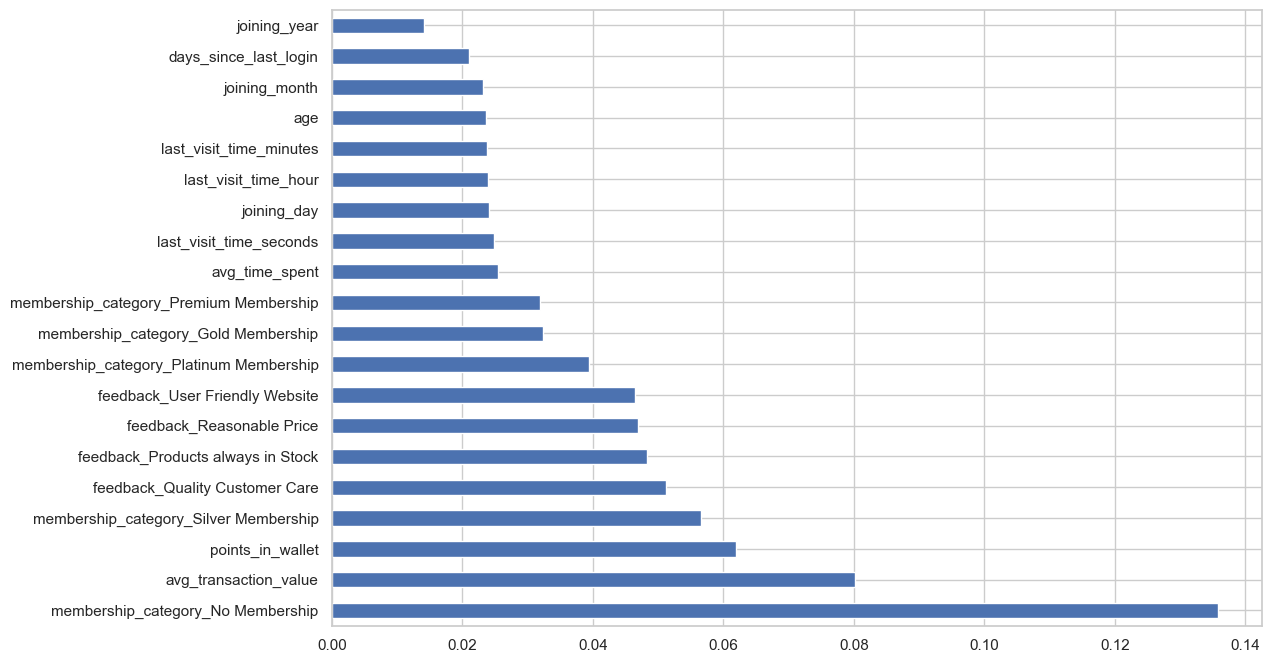

In [470]:
#plot graph of feature importances for better visualization

plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=x.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

In [471]:
# Use robust scaling for numerical features
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
numerical_features = ['age', 'days_since_last_login', 'avg_time_spent', 
                      'avg_transaction_value', 'points_in_wallet']
x[numerical_features] = scaler.fit_transform(x[numerical_features])

#### model training

In [536]:
data_train.head()

age  days_since_last_login  avg_time_spent  avg_transaction_value  \
0   18                     17          300.63               53005.25   
1   32                     16          306.34               12838.38   
2   44                     14          516.16               21027.00   
3   37                     11           53.27               25239.56   
4   31                     20          113.13               24483.66   

   points_in_wallet  churn_risk_score  joining_day  joining_month  \
0        781.750000                 2           17              8   
1        686.882199                 1           28              8   
2        500.690000                 5           11             11   
3        567.660000                 5           29             10   
4        663.060000                 5           12              9   

   joining_year  last_visit_time_hour  ...  feedback_Too many ads  \
0          2017                    16  ...                  False   
1          2017                    12  ...                  False   
2          2016                    22  ...                  False   
3          2016                    15  ...                  False   
4          2017                    15  ...                  False   

   feedback_User Friendly Website  churn_risk_category  age_group  \
0                           False       Low Risk (0-2)        <18   
1                           False       Low Risk (0-2)      26-35   
2                           False    Medium Risk (3-5)      36-45   
3                           False    Medium Risk (3-5)      36-45   
4                           False    Medium Risk (3-5)      26-35   

   tenure_group  spend_time_ratio  value_segment  activity_segment  \
0      3+ years        175.729370           High              High   
1      3+ years         41.772565            Low              High   
2      3+ years         40.658597         Medium              High   
3      3+ years        465.073890         Medium               Low   
4      3+ years        214.524314         Medium            Medium   

       journey_stage  cluster  
0  High Value Active        3  
1        Casual User        1  
2    Engaged Regular        2  
3        Casual User        1  
4        Casual User        1  

[5 rows x 50 columns]

In [537]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 42)

In [538]:
x_train.head()

age  days_since_last_login  avg_time_spent  avg_transaction_value  \
3313   0.428571                 -1.250        1.386598              -0.296619   
28260  0.178571                  0.500        4.270665               0.785581   
31412 -0.964286               -126.375       -3.175253               0.714386   
6700  -0.892857                 -0.375        0.280842               2.539117   
31958 -0.321429                  0.250        0.495947               0.675114   

       points_in_wallet  joining_day  joining_month  joining_year  \
3313          -0.650890           26              3          2015   
28260          0.105824            2             10          2015   
31412          0.435482            8              4          2016   
6700           0.000000           23              2          2016   
31958          0.221615            2              1          2017   

       last_visit_time_hour  last_visit_time_minutes  ...  \
3313                      7                       26  ...   
28260                    11                       43  ...   
31412                     2                       41  ...   
6700                     15                       29  ...   
31958                    10                       59  ...   

       offer_application_preference_Yes  past_complaint_Yes  \
3313                               True                True   
28260                              True                True   
31412                              True                True   
6700                              False                True   
31958                             False                True   

       feedback_Poor Customer Service  feedback_Poor Product Quality  \
3313                            False                          False   
28260                            True                          False   
31412                           False                          False   
6700                            False                          False   
31958                           False                          False   

       feedback_Poor Website  feedback_Products always in Stock  \
3313                   False                              False   
28260                  False                              False   
31412                  False                              False   
6700                   False                              False   
31958                   True                              False   

       feedback_Quality Customer Care  feedback_Reasonable Price  \
3313                            False                      False   
28260                           False                      False   
31412                           False                      False   
6700                            False                       True   
31958                           False                      False   

       feedback_Too many ads  feedback_User Friendly Website  
3313                    True                           False  
28260                  False                           False  
31412                   True                           False  
6700                   False                           False  
31958                  False                           False  

[5 rows x 40 columns]

In [539]:
x_train.shape

(29593, 40)

In [541]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=50,  # Reduce number of trees (default=100)
    max_depth=12,  # Limit tree depth (default=None - grows fully)
    min_samples_split=5,  # Reduce unnecessary splits (default=2)
    max_features='sqrt',  # Reduce number of features per split
    random_state=42  # Ensures reproducibility
)

rf.fit(x_train, y_train.values.ravel())  # Convert y_train to NumPy array and flatten
 # Convert y_train to 1D if needed



RandomForestClassifier(max_depth=12, min_samples_split=5, n_estimators=50,
                       random_state=42)

In [542]:
# checking training accuracy
print("training accuracy is : ", rf.score(x_train, y_train)*100)

training accuracy is :  81.5463116277498


In [543]:
# checking accuracy of test dataset
print("testing accuracy is : ", rf.score(x_test, y_test)*100)

testing accuracy is :  73.92890931206921


In [544]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(
    max_depth=12,  # Limit tree depth (default=None, meaning fully grown)
    min_samples_split=5,  # Prevent over-splitting
    min_samples_leaf=2,  # Ensure each leaf has at least 2 samples
    random_state=42  # Ensures reproducibility
)

model.fit(x_train, y_train)


DecisionTreeClassifier(max_depth=12, min_samples_leaf=2, min_samples_split=5,
                       random_state=42)

In [545]:
# checking accuracy of test dataset
print("testing accuracy is : ", model.score(x_test, y_test)*100)

testing accuracy is :  74.15867009055277


In [546]:
# checking accuracy of train dataset
print("testing accuracy is : ", model.score(x_train, y_train)*100)

testing accuracy is :  80.43118305004562


In [547]:
from xgboost import XGBClassifier

xg = XGBClassifier(
    objective='binary:logistic',  # Binary classification task
    learning_rate=0.05,  # Slower learning for better generalization
    n_estimators=300,  # More trees to improve performance
    max_depth=6,  # Moderate depth to prevent overfitting
    min_child_weight=2,  # Prevents too small splits
    subsample=0.8,  # Uses 80% of data for each tree (reduces overfitting)
    colsample_bytree=0.8,  # Uses 80% of features per tree
    eval_metric='logloss',  # Best for binary classification
    verbosity=0,  # Suppress warnings
    random_state=42
)

# Ensure y_train has only 0 and 1 for binary classification
y_train = y_train.replace(-1, 0)

# Train the model
xg.fit(x_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.05, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
              max_leaves=None, min_child_weight=2, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=300,
              n_jobs=None, num_parallel_tree=None, objective='multi:softprob', ...)

In [548]:
# checking accuracy of test dataset
print("testing accuracy is : ", xg.score(x_test, y_test)*100)

if hasattr(xg, "classes_"):
    print("Model is fitted, proceeding to test accuracy.")
    print("Testing accuracy is:", xg.score(x_test, y_test) * 100)
else:
    print("Model is not fitted. Please call `xg.fit(x_train, y_train)` first.")


testing accuracy is :  75.48317340181106
Model is fitted, proceeding to test accuracy.
Testing accuracy is: 75.48317340181106


In [549]:
# checking accuracy of train dataset
print("testing accuracy is : ", xg.score(x_train, y_train)*100)

if hasattr(xg, "classes_"):
    print("Model is fitted, proceeding to test accuracy.")
    print("Testing accuracy is:", xg.score(x_train, y_train) * 100)
else:
    print("Model is not fitted. Please call `xg.fit(x_test, y_test)` first.")


testing accuracy is :  86.74010745784476
Model is fitted, proceeding to test accuracy.
Testing accuracy is: 86.74010745784476


In [550]:
# Example: Create interaction between time spent and transaction value
data_train['spend_time_ratio'] = data_train['avg_transaction_value'] / (data_train['avg_time_spent'] + 1)

In [552]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier

# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
x_train_balanced, y_train_balanced = smote.fit_resample(x_train, y_train)

# ✅ Fix: Convert y_train_balanced to 1D array & integers
y_train_balanced = y_train_balanced.values.ravel().astype(int)  

# Random Forest with balanced class weights
rf_balanced = RandomForestClassifier(
    n_estimators=50,  
    max_depth=12,  
    min_samples_split=5,  
    max_features='sqrt',  
    class_weight='balanced',  
    random_state=42
)
rf_balanced.fit(x_train_balanced, y_train_balanced)

# Decision Tree with balanced class weights
dt_balanced = DecisionTreeClassifier(
    max_depth=12,
    min_samples_split=5,
    min_samples_leaf=2,
    class_weight='balanced',  
    random_state=42
)
dt_balanced.fit(x_train_balanced, y_train_balanced)

# ✅ Fix: Correct scale_pos_weight calculation
scale_pos_weight = sum(y_train_balanced == 0) / sum(y_train_balanced == 1)

# XGBoost with proper handling of imbalance
xg_balanced = XGBClassifier(
    objective='binary:logistic',
    learning_rate=0.05,
    n_estimators=300,
    max_depth=6,
    min_child_weight=2,
    subsample=0.8,
    colsample_bytree=0.8,
    scale_pos_weight=scale_pos_weight,  
    eval_metric='logloss',
    verbosity=0,
    random_state=42
)
xg_balanced.fit(x_train_balanced, y_train_balanced)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.05, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
              max_leaves=None, min_child_weight=2, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=300,
              n_jobs=None, num_parallel_tree=None, objective='multi:softprob', ...)

In [553]:
from sklearn.feature_selection import SelectFromModel

# Ensure y_train is a 1D array
y_train = y_train.values.ravel()

# Train the XGBoost model (if not already trained)
xg.fit(x_train, y_train)

# Feature selection using XGBoost
selector = SelectFromModel(xg, threshold='median')
x_train_selected = selector.fit_transform(x_train, y_train)
x_test_selected = selector.transform(x_test)

print(f"Original Features: {x_train.shape[1]}")
print(f"Selected Features: {x_train_selected.shape[1]}")


Original Features: 40
Selected Features: 20


In [554]:
from sklearn.ensemble import VotingClassifier

# Ensure y_train is 1D
if isinstance(y_train, pd.DataFrame):  
    y_train = y_train.values.ravel()

# Train models if not already trained
rf.fit(x_train, y_train)
model.fit(x_train, y_train)
xg.fit(x_train, y_train)

# Define VotingClassifier (Ensemble Model)
voting_clf = VotingClassifier(
    estimators=[
        ('rf', rf), 
        ('dt', model),  
        ('xgb', xg)  
    ],
    voting='soft'
)

# Train the ensemble model
voting_clf.fit(x_train, y_train)

# Check accuracy
print(f"Voting Classifier Accuracy: {voting_clf.score(x_test, y_test):.4f}")


Voting Classifier Accuracy: 0.7538


In [557]:
#Threshold Optimization
from sklearn.metrics import precision_recall_curve
from sklearn.preprocessing import label_binarize
import numpy as np

# Convert y_test to binary format for each class
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))  

# Select the class you want to analyze (e.g., class 1)
class_index = 1  # Change this based on the class you want

# Extract the predicted probabilities for the selected class
y_pred_proba = voting_clf.predict_proba(x_test)[:, class_index]

# Compute precision-recall curve for the selected class
precisions, recalls, thresholds = precision_recall_curve(y_test_bin[:, class_index], y_pred_proba)

# Compute F1-scores
f1_scores = 2 * (precisions * recalls) / (precisions + recalls + 1e-10)  # Avoid division by zero
optimal_threshold = thresholds[np.argmax(f1_scores[:-1])]

print(f"Optimal Threshold for class {class_index}: {optimal_threshold}")


Optimal Threshold for class 1: 0.16243287277177154


In [555]:
#Threshold Optimization
from sklearn.metrics import precision_recall_curve
from sklearn.preprocessing import label_binarize
import numpy as np

# Convert y_test to binary format for each class
y_train_bin = label_binarize(y_train, classes=np.unique(y_train))  

# Select the class you want to analyze (e.g., class 1)
class_index = 1  # Change this based on the class you want

# Extract the predicted probabilities for the selected class
y_pred_proba = voting_clf.predict_proba(x_train)[:, class_index]

# Compute precision-recall curve for the selected class
precisions, recalls, thresholds = precision_recall_curve(y_train_bin[:, class_index], y_pred_proba)

# Compute F1-scores
f1_scores = 2 * (precisions * recalls) / (precisions + recalls + 1e-10)  # Avoid division by zero
optimal_threshold = thresholds[np.argmax(f1_scores[:-1])]

print(f"Optimal Threshold for class {class_index}: {optimal_threshold}")

Optimal Threshold for class 1: 0.4978010562150268


In [556]:
from sklearn.model_selection import cross_val_score

# Cross-validation for XGBoost
cv_scores = cross_val_score(xg, x_train, y_train, cv=5, scoring='accuracy')
print("Cross-Validation Accuracy:", cv_scores.mean())

Cross-Validation Accuracy: 0.7567330072344798


In [ ]:
#from sklearn.ensemble import StackingClassifier
#from sklearn.linear_model import LogisticRegression

# More sophisticated stacking
#stacking_classifier = StackingClassifier(
 #   estimators=[
  #      ('rf', RandomForestClassifier(n_estimators=200)),
   #     ('xgb', XGBClassifier(learning_rate=0.1)),
    #    ('dt', DecisionTreeClassifier())
    #],
    #final_estimator=LogisticRegression(),
    #cv=5
#)
#stacking_classifier.fit(x_train, y_train)

In [558]:
from sklearn.ensemble import StackingClassifier, RandomForestClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

# Optimize RandomForest (reduce size)
rf_model = RandomForestClassifier(n_estimators=100, max_depth=15, random_state=42)  # Reduced size

# Increase complexity of XGBoost
xgb_model = XGBClassifier(
    learning_rate=0.05, 
    n_estimators=300,  
    max_depth=6,  
    eval_metric='logloss',  # Keep this for classification tasks
    verbosity=0  # Suppress warnings
)

# Increase complexity of Decision Tree
dt_model = DecisionTreeClassifier(
    max_depth=12,  # Increased depth  
    min_samples_split=5,  
    random_state=42
)

# Voting Classifier (Reduce RF impact)
voting_classifier = VotingClassifier(
    estimators=[
        ('rf', rf_model),  # Reduced RF
        ('xgb', xgb_model),  # Increased XGB
        ('dt', dt_model)  # Increased DT
    ],
    voting='soft'
)

# Stacking Classifier
stacking_classifier = StackingClassifier(
    estimators=[
        ('rf', rf_model), 
        ('xgb', xgb_model), 
        ('dt', dt_model)
    ],
    final_estimator=LogisticRegression(),
    cv=5
)

# Train models
stacking_classifier.fit(x_train, y_train)


StackingClassifier(cv=5,
                   estimators=[('rf',
                                RandomForestClassifier(max_depth=15,
                                                       random_state=42)),
                               ('xgb',
                                XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=None,
                                              device=None,
                                              early_stopping_rounds=None,
                                              enable_categorical=False,
                                              eval_metric='logloss',
                                              feature_types=None, gamma=None,
                                              grow_p...
                                              max_cat_threshold=None,
                                              max_cat_to_onehot=None,
                                              max_delta_step=None, max_depth=6,
                                              max_leaves=None,
                                              min_child_weight=None,
                                              missing=nan,
                                              monotone_constraints=None,
                                              multi_strategy=None,
                                              n_estimators=300, n_jobs=None,
                                              num_parallel_tree=None,
                                              random_state=None, ...)),
                               ('dt',
                                DecisionTreeClassifier(max_depth=12,
                                                       min_samples_split=5,
                                                       random_state=42))],
                   final_estimator=LogisticRegression())

## Hyperparameter Tuning


* Choose following method for hyperparameter tuning
    1. **RandomizedSearchCV** --> Fast
    2. **GridSearchCV**
* Assign hyperparameters in form of dictionery
* Fit the model
* Check best paramters and best score

In [559]:
from sklearn.model_selection import RandomizedSearchCV

In [560]:
from imblearn.combine import SMOTEENN
from imblearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('sampler', SMOTEENN()),  # Fixed import
    ('classifier', RandomForestClassifier())
])


In [561]:
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7, 10],
    'n_estimators': [50, 100, 200, 300],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}

In [562]:
grid = RandomizedSearchCV(XGBClassifier(objective='binary:logistic'), param_grid, verbose=3)

In [563]:
grid.fit(x_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END colsample_bytree=1.0, learning_rate=0.1, max_depth=7, n_estimators=100, subsample=1.0;, score=0.763 total time=   3.4s
[CV 2/5] END colsample_bytree=1.0, learning_rate=0.1, max_depth=7, n_estimators=100, subsample=1.0;, score=0.763 total time=   2.0s
[CV 3/5] END colsample_bytree=1.0, learning_rate=0.1, max_depth=7, n_estimators=100, subsample=1.0;, score=0.758 total time=   2.0s
[CV 4/5] END colsample_bytree=1.0, learning_rate=0.1, max_depth=7, n_estimators=100, subsample=1.0;, score=0.758 total time=   2.0s
[CV 5/5] END colsample_bytree=1.0, learning_rate=0.1, max_depth=7, n_estimators=100, subsample=1.0;, score=0.764 total time=   2.1s
[CV 1/5] END colsample_bytree=1.0, learning_rate=0.05, max_depth=7, n_estimators=200, subsample=1.0;, score=0.762 total time=   4.0s
[CV 2/5] END colsample_bytree=1.0, learning_rate=0.05, max_depth=7, n_estimators=200, subsample=1.0;, score=0.762 total time=   4.2s
[CV 3/5] END 

RandomizedSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=None...
                                           max_leaves=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=None, ...),
                   param_distributions={'colsample_bytree': [0.8, 0.9, 1.0],
                                        'learning_rate': [0.01, 0.05, 0.1, 0.2],
                                        'max_depth': [3, 5, 7, 10],
                                        'n_estimators': [50, 100, 200, 300],
                                        'subsample': [0.8, 0.9, 1.0]},
                   verbose=3)

In [564]:
print(x_train.shape)  # Should be (29593, num_features)
print(y_train.shape)  # Should be (29593,) or (29593, 1)


(29593, 40)
(29593,)


In [565]:
grid.best_params_

{'subsample': 0.8,
 'n_estimators': 50,
 'max_depth': 5,
 'learning_rate': 0.1,
 'colsample_bytree': 1.0}

In [566]:
xg = XGBClassifier(n_estimators= 100, max_depth= 5, learning_rate= 0.1)
xg.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [567]:
# checking accuracy of test dataset
print("testing accuracy is : ", xg.score(x_test, y_test)*100)

testing accuracy is :  75.76699553993784


In [568]:
print("testing accuracy is : ", xg.score(x_train, y_train)*100)

testing accuracy is :  77.99479606663738


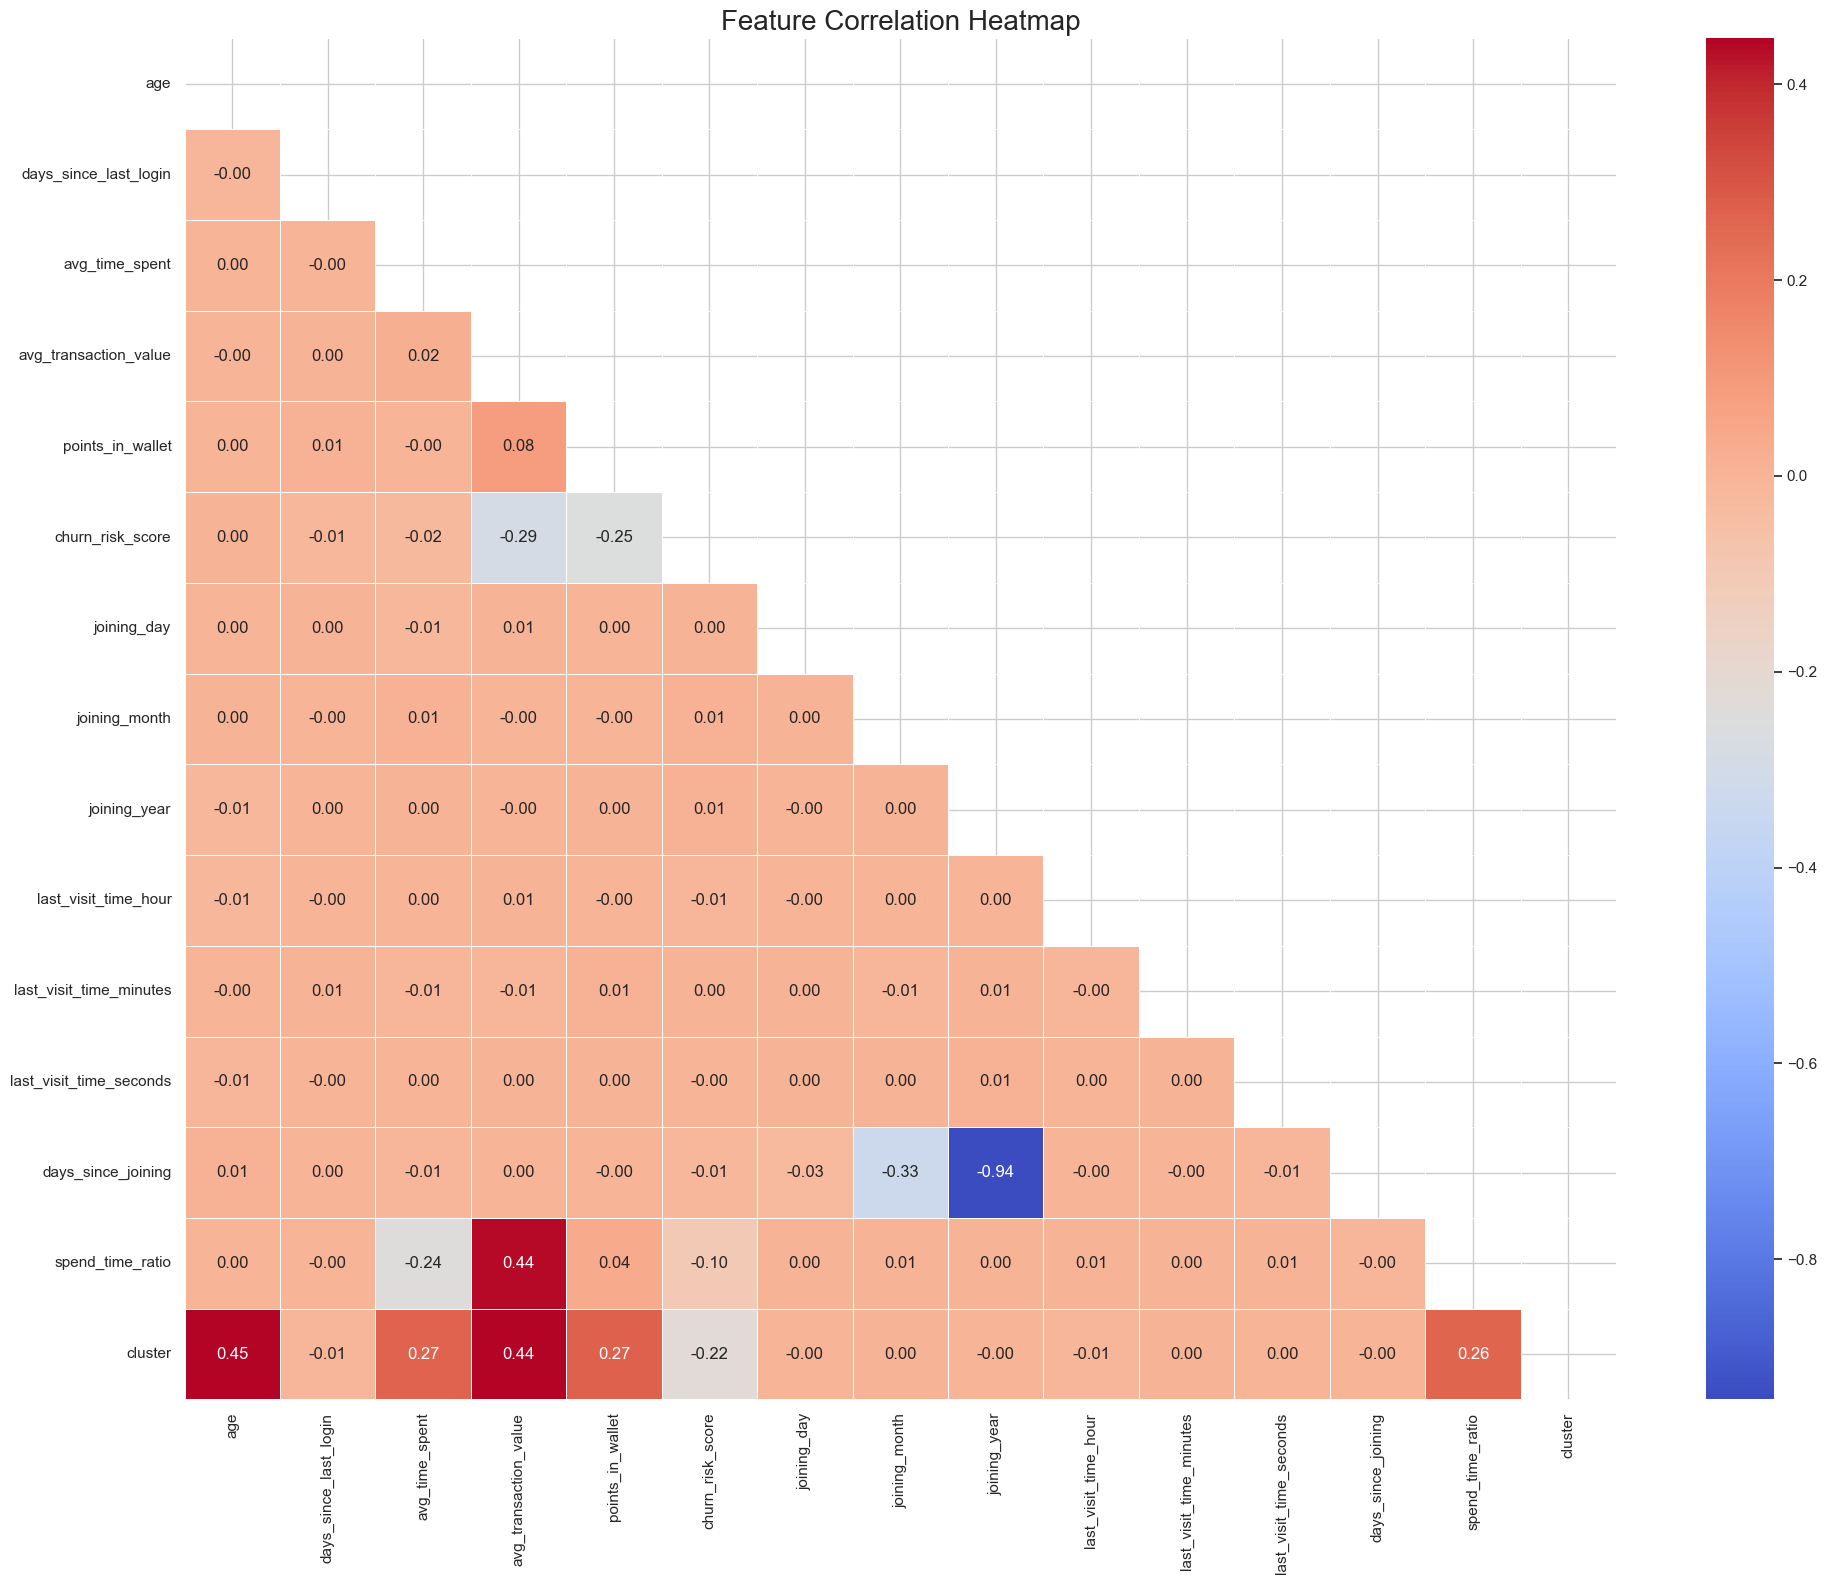

Highly correlated feature pairs:
days_since_joining & joining_year: -0.943


In [569]:
# Create correlation matrix heatmap
plt.figure(figsize=(20, 16))
corr_matrix = data_train.select_dtypes(include=['number']).corr()

mask = np.triu(corr_matrix)
sns.heatmap(corr_matrix, annot=True, mask=mask, cmap='coolwarm', linewidths=0.5, fmt=".2f")
plt.title('Feature Correlation Heatmap', fontsize=20)
plt.tight_layout()
plt.show()

# Identify highly correlated features (threshold > 0.7)
correlation_threshold = 0.7
high_corr_features = []

for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > correlation_threshold:
            high_corr_features.append((corr_matrix.columns[i], corr_matrix.columns[j]))

print("Highly correlated feature pairs:")
for feat1, feat2 in high_corr_features:
    print(f"{feat1} & {feat2}: {corr_matrix.loc[feat1, feat2]:.3f}")

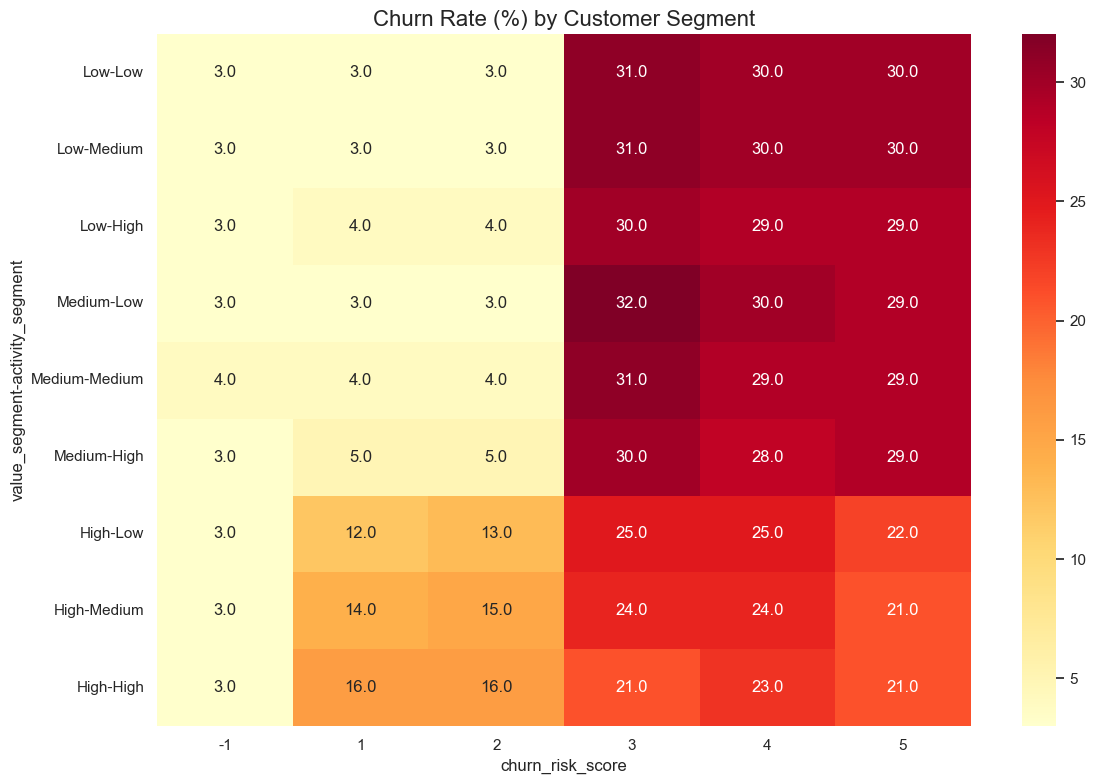


CUSTOMER SEGMENT INSIGHTS:
Highest -1 churn risk: Medium value, Medium activity segment
Highest 1 churn risk: High value, High activity segment
Highest 2 churn risk: High value, High activity segment
Highest 3 churn risk: Medium value, Low activity segment
Highest 4 churn risk: Low value, Low activity segment
Highest 5 churn risk: Low value, Low activity segment


In [570]:
# Customer segmentation based on activity and value
data_train['value_segment'] = pd.qcut(data_train['avg_transaction_value'], 3, labels=['Low', 'Medium', 'High'])
data_train['activity_segment'] = pd.qcut(data_train['avg_time_spent'], 3, labels=['Low', 'Medium', 'High'])

# Create a cross-tabulation of segments and churn
segment_churn = pd.crosstab(
    [data_train['value_segment'], data_train['activity_segment']], 
    data_train['churn_risk_score'], 
    normalize='index'
).round(2) * 100

# Visualize segment churn rates
plt.figure(figsize=(12, 8))
sns.heatmap(segment_churn, annot=True, cmap='YlOrRd', fmt='.1f')
plt.title('Churn Rate (%) by Customer Segment', fontsize=16)
plt.tight_layout()
plt.show()

# Print insights
high_risk_segments = segment_churn.idxmax().to_dict()
print("\nCUSTOMER SEGMENT INSIGHTS:")
for churn, segment in high_risk_segments.items():
    print(f"Highest {churn} churn risk: {segment[0]} value, {segment[1]} activity segment")

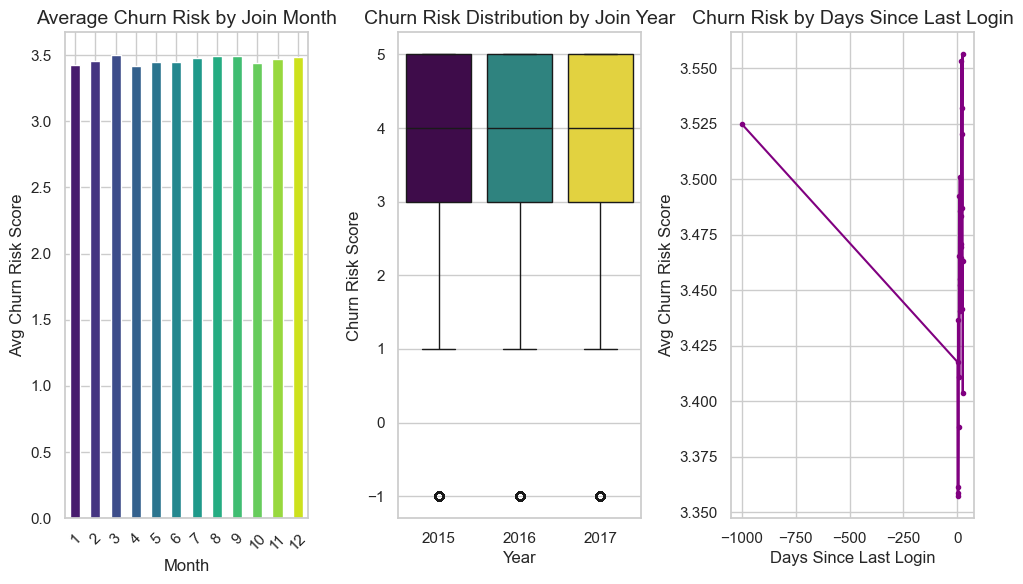


TIME-BASED PATTERN INSIGHTS:
- Highest churn risk month for joining: Month 3
- Critical login absence threshold: 24 days since last login


In [571]:
# Analyze churn risk by join timing
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(18, 6))

# Plot 1: Churn Risk by Join Month
plt.subplot(1, 3, 1)
join_month_churn = data_train.groupby('joining_month')['churn_risk_score'].mean()
join_month_churn.plot(kind='bar', color=sns.color_palette("viridis", 12))
plt.title('Average Churn Risk by Join Month', fontsize=14)
plt.xlabel('Month')
plt.ylabel('Avg Churn Risk Score')
plt.xticks(rotation=45)

# Plot 2: Churn Risk Distribution by Join Year (Fixed Warning)
plt.subplot(1, 3, 2)
sns.boxplot(x='joining_year', y='churn_risk_score', data=data_train, hue='joining_year', palette='viridis', legend=False)
plt.title('Churn Risk Distribution by Join Year', fontsize=14)
plt.xlabel('Year')
plt.ylabel('Churn Risk Score')

# Plot 3: Churn Risk by Days Since Last Login
plt.subplot(1, 3, 3)
last_login_churn = data_train.groupby('days_since_last_login')['churn_risk_score'].mean()
last_login_churn.plot(style='.-', figsize=(10, 6), color='purple')
plt.title('Churn Risk by Days Since Last Login', fontsize=14)
plt.xlabel('Days Since Last Login')
plt.ylabel('Avg Churn Risk Score')

plt.tight_layout()
plt.show()

# Print temporal insights
print("\nTIME-BASED PATTERN INSIGHTS:")
high_risk_month = join_month_churn.idxmax()
print(f"- Highest churn risk month for joining: Month {high_risk_month}")
login_threshold = last_login_churn.idxmax()
print(f"- Critical login absence threshold: {login_threshold} days since last login")


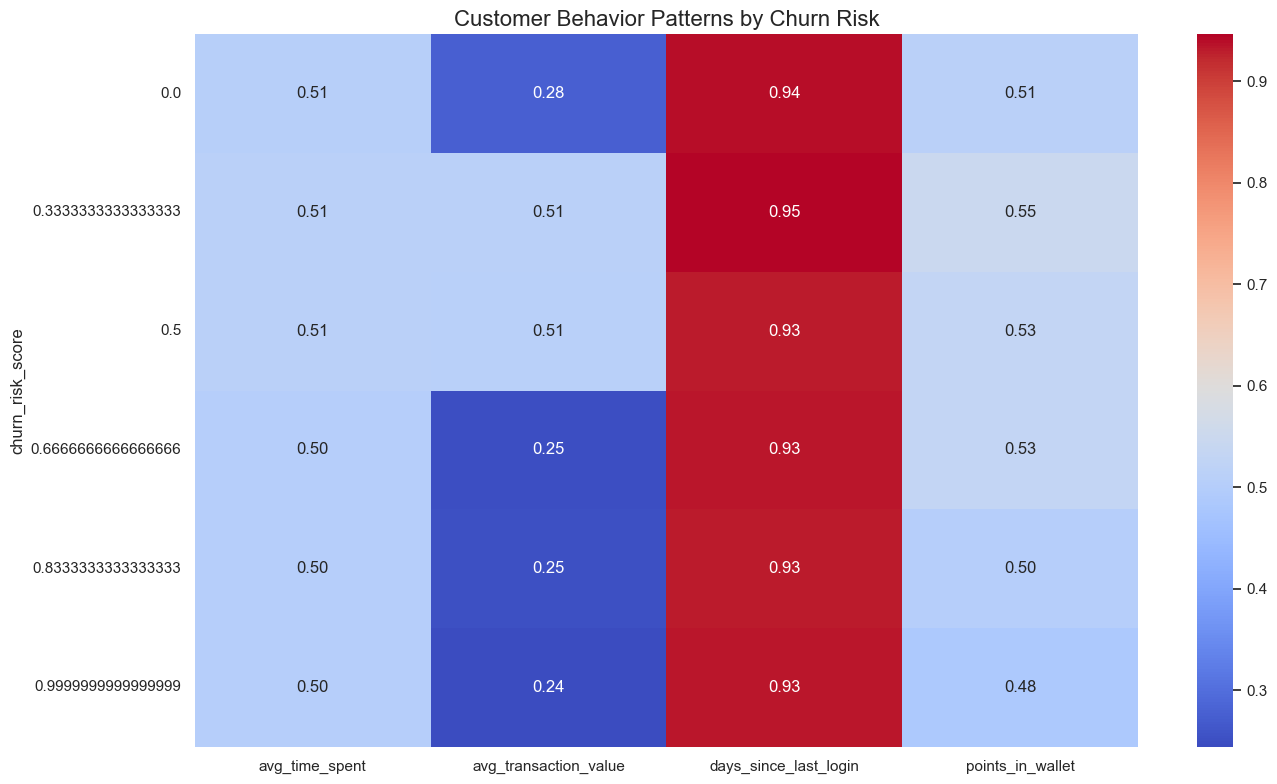


CUSTOMER BEHAVIOR INSIGHTS:
- As avg_time_spent decreases, churn risk tends to decrease
- As avg_transaction_value decreases, churn risk tends to decrease
- As points_in_wallet decreases, churn risk tends to decrease
- As days_since_last_login decreases, churn risk tends to decrease


In [572]:
# Create behavior heatmap
behavior_features = ['avg_time_spent', 'avg_transaction_value', 'points_in_wallet', 'days_since_last_login']
behavior_data = data_train[behavior_features + ['churn_risk_score']]

# Normalize data for visualization
from sklearn.preprocessing import MinMaxScaler
behavior_normalized = MinMaxScaler().fit_transform(behavior_data)
behavior_normalized = pd.DataFrame(behavior_normalized, columns=behavior_data.columns)

# Plot behavior patterns by churn risk
plt.figure(figsize=(14, 8))
behavior_pivot = behavior_normalized.pivot_table(index='churn_risk_score', values=behavior_features)
sns.heatmap(behavior_pivot, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Customer Behavior Patterns by Churn Risk', fontsize=16)
plt.tight_layout()
plt.show()

# Print behavior insights
print("\nCUSTOMER BEHAVIOR INSIGHTS:")
for feature in behavior_features:
    correlation = behavior_data[feature].corr(behavior_data['churn_risk_score'])
    direction = "increases" if correlation > 0 else "decreases"
    print(f"- As {feature} {direction}, churn risk tends to {'increase' if correlation > 0 else 'decrease'}")

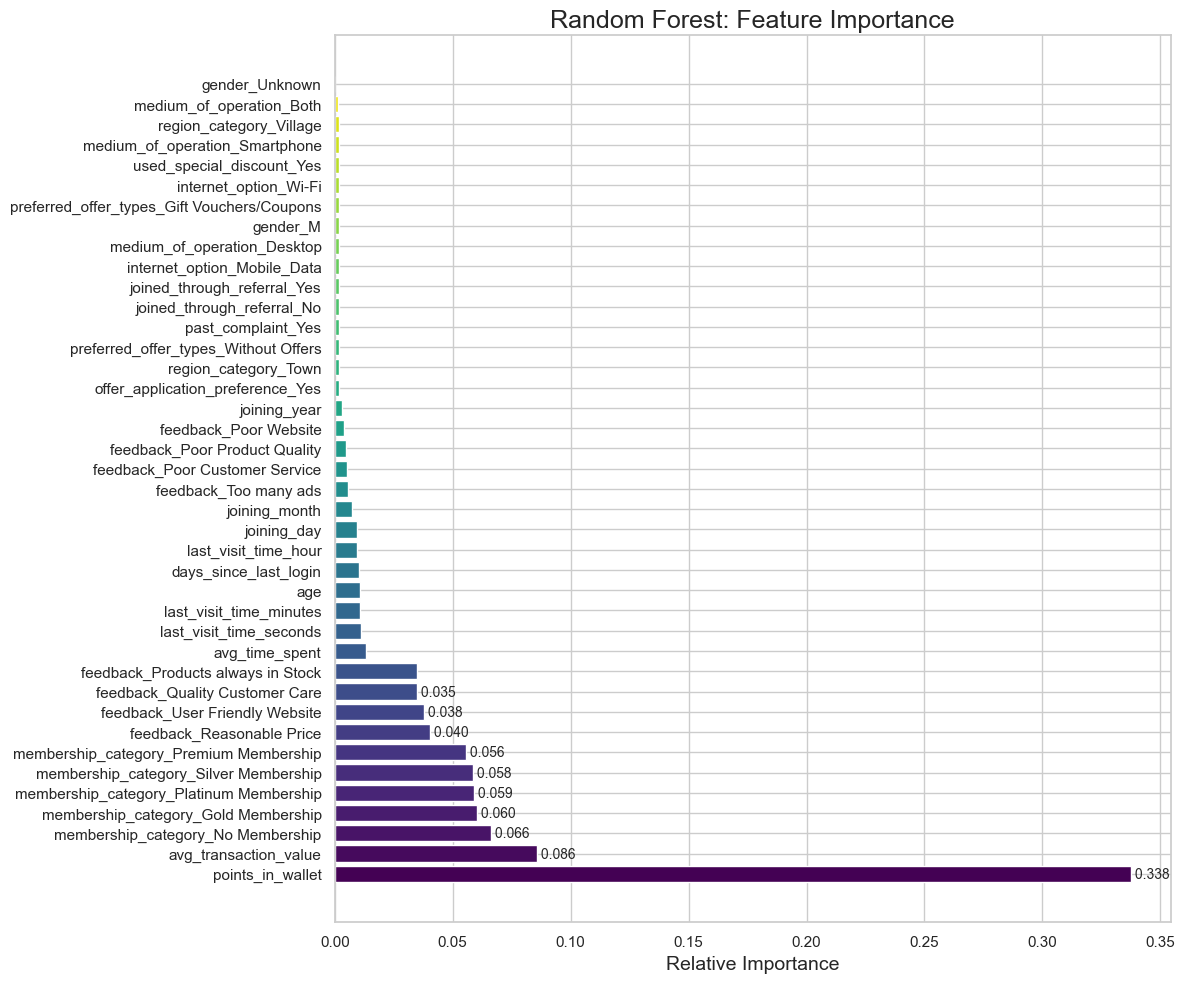

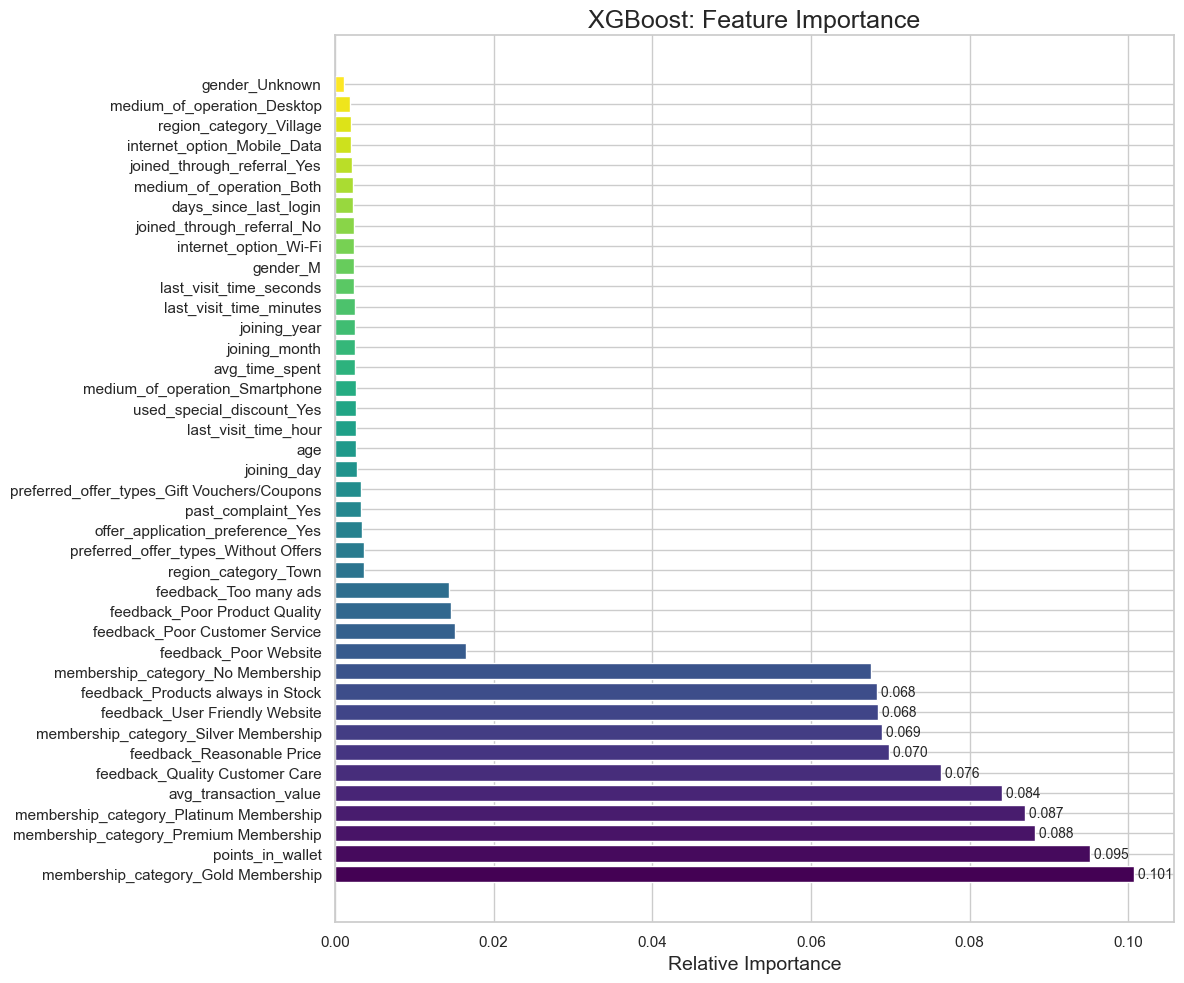


TOP PREDICTIVE FACTORS FOR CHURN:
Features important across all models: avg_transaction_value, points_in_wallet, feedback_Quality Customer Care, membership_category_Silver Membership, membership_category_Platinum Membership, membership_category_Gold Membership, feedback_Reasonable Price, feedback_User Friendly Website, membership_category_Premium Membership

FEATURE IMPACT ANALYSIS:
- membership_category_Gold Membership: 0.101 importance, lower values tend to increase churn risk
- points_in_wallet: 0.095 importance, lower values tend to increase churn risk
- membership_category_Premium Membership: 0.088 importance, lower values tend to increase churn risk
- membership_category_Platinum Membership: 0.087 importance, lower values tend to increase churn risk
- avg_transaction_value: 0.084 importance, lower values tend to increase churn risk


In [573]:
# Enhanced feature importance visualization
def plot_feature_importance(model, feature_names, title):
    # Get feature importances
    importances = model.feature_importances_
    indices = np.argsort(importances)[::-1]
    
    # Plot feature importances
    plt.figure(figsize=(12, 10))
    plt.title(title, fontsize=18)
    plt.barh(range(len(indices)), importances[indices], align='center', color=plt.cm.viridis(np.linspace(0, 1, len(indices))))
    plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
    plt.xlabel('Relative Importance', fontsize=14)
    plt.tight_layout()
    
    # Add annotations for top features
    for i in range(min(10, len(indices))):
        plt.text(importances[indices[i]], i, f" {importances[indices[i]]:.3f}", va='center', fontsize=10)
    
    plt.show()
    
    # Return top feature details
    top_features = [(feature_names[i], importances[i]) for i in indices[:10]]
    return top_features

# Plot and get insights for multiple models
rf_features = plot_feature_importance(rf, x.columns, 'Random Forest: Feature Importance')
xgb_features = plot_feature_importance(xg, x.columns, 'XGBoost: Feature Importance')

# Identify consistently important features
print("\nTOP PREDICTIVE FACTORS FOR CHURN:")
common_features = set([f[0] for f in rf_features]).intersection([f[0] for f in xgb_features])
print(f"Features important across all models: {', '.join(common_features)}")

# Get impact direction for top features
print("\nFEATURE IMPACT ANALYSIS:")
for feature, importance in xgb_features[:5]:
    # Calculate if feature increase tends to increase or decrease churn
    correlation = data_train[feature].corr(data_train['churn_risk_score'])
    direction = "higher" if correlation > 0 else "lower"
    print(f"- {feature}: {importance:.3f} importance, {direction} values tend to increase churn risk")

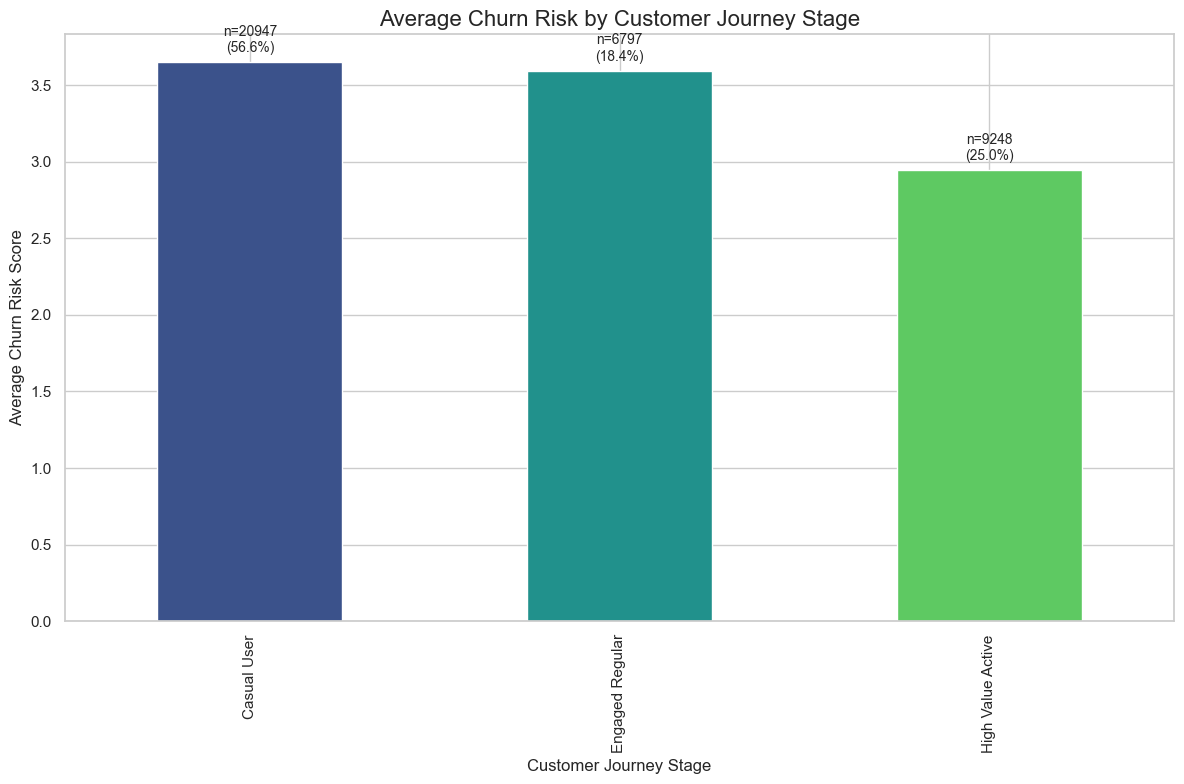


CUSTOMER JOURNEY INSIGHTS:
- Casual User: 3.65 avg churn risk
- Engaged Regular: 3.59 avg churn risk
- High Value Active: 2.94 avg churn risk


In [574]:
# Define customer journey stages
def get_journey_stage(row):
    if row['days_since_last_login'] > 30:
        return 'Inactive'
    elif row['avg_transaction_value'] > data_train['avg_transaction_value'].quantile(0.75):
        return 'High Value Active'
    elif row['avg_time_spent'] > data_train['avg_time_spent'].quantile(0.75):
        return 'Engaged Regular'
    else:
        return 'Casual User'

# Assign journey stages
data_train['journey_stage'] = data_train.apply(get_journey_stage, axis=1)

# Visualize churn risk by journey stage
plt.figure(figsize=(12, 8))
journey_churn = data_train.groupby('journey_stage')['churn_risk_score'].mean().sort_values(ascending=False)
ax = journey_churn.plot(kind='bar', color=sns.color_palette("viridis", len(journey_churn)))
plt.title('Average Churn Risk by Customer Journey Stage', fontsize=16)
plt.ylabel('Average Churn Risk Score')
plt.xlabel('Customer Journey Stage')

# Add count annotations
for i, stage in enumerate(journey_churn.index):
    count = data_train[data_train['journey_stage'] == stage].shape[0]
    pct = count/data_train.shape[0] * 100
    plt.text(i, journey_churn[stage] + 0.05, f"n={count}\n({pct:.1f}%)", 
             ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

# Print journey insights
print("\nCUSTOMER JOURNEY INSIGHTS:")
for stage in journey_churn.index:
    risk = journey_churn[stage]
    print(f"- {stage}: {risk:.2f} avg churn risk")

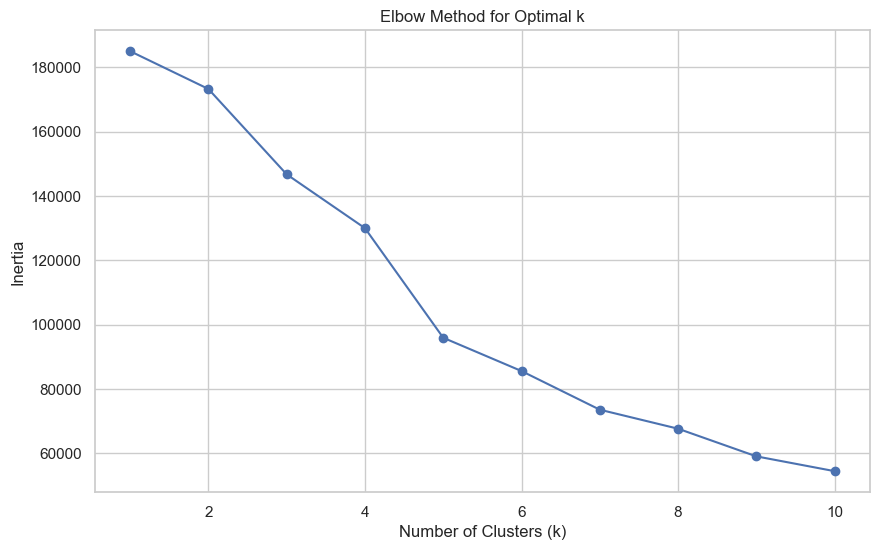

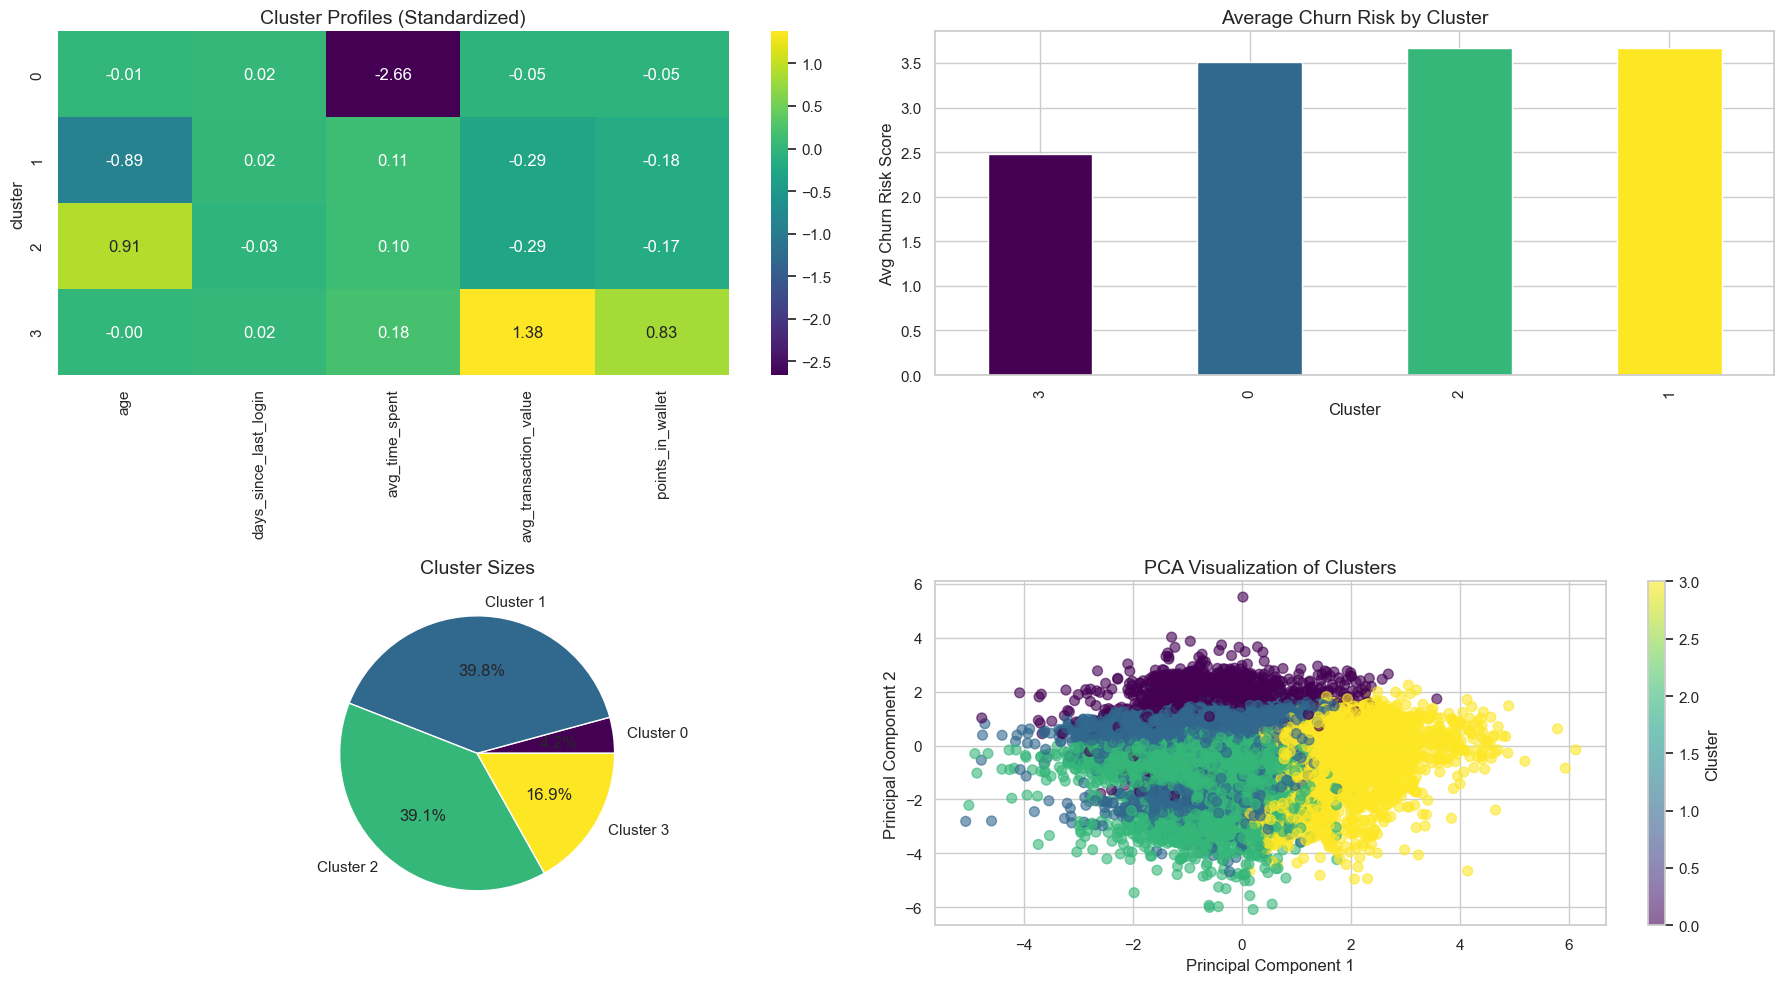


CLUSTER ANALYSIS INSIGHTS:
Cluster 0 (4.2% of customers):
  - Avg churn risk: 3.51
  - Key traits: High avg_transaction_value and points_in_wallet, Low avg_time_spent
Cluster 1 (39.8% of customers):
  - Avg churn risk: 3.67
  - Key traits: High avg_transaction_value and points_in_wallet, Low days_since_last_login
Cluster 2 (39.1% of customers):
  - Avg churn risk: 3.67
  - Key traits: High avg_transaction_value and points_in_wallet, Low days_since_last_login
Cluster 3 (16.9% of customers):
  - Avg churn risk: 2.48
  - Key traits: High avg_transaction_value and points_in_wallet, Low days_since_last_login


In [575]:
# Customer clustering using K-Means
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Select features for clustering
cluster_features = ['age', 'days_since_last_login', 'avg_time_spent', 
                   'avg_transaction_value', 'points_in_wallet']
cluster_data = data_train[cluster_features]

# Standardize data
scaler = StandardScaler()
cluster_data_scaled = scaler.fit_transform(cluster_data)

# Find optimal number of clusters using Elbow method
inertia = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(cluster_data_scaled)
    inertia.append(kmeans.inertia_)

# Plot elbow curve
plt.figure(figsize=(10, 6))
plt.plot(k_range, inertia, 'o-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()

# Select optimal k (example: k=4)
k_optimal = 4
kmeans = KMeans(n_clusters=k_optimal, random_state=42)
data_train['cluster'] = kmeans.fit_predict(cluster_data_scaled)

# Analyze clusters
plt.figure(figsize=(18, 10))

# Cluster profiles
plt.subplot(2, 2, 1)
cluster_profile = data_train.groupby('cluster')[cluster_features].mean()
cluster_profile_scaled = scaler.transform(cluster_profile)
cluster_profile_scaled = pd.DataFrame(cluster_profile_scaled, 
                                     index=cluster_profile.index, 
                                     columns=cluster_profile.columns)
sns.heatmap(cluster_profile_scaled, cmap='viridis', annot=True, fmt='.2f')
plt.title('Cluster Profiles (Standardized)', fontsize=14)

# Churn risk by cluster
plt.subplot(2, 2, 2)
cluster_churn = data_train.groupby('cluster')['churn_risk_score'].mean().sort_values()
cluster_churn.plot(kind='bar', color=plt.cm.viridis(np.linspace(0, 1, len(cluster_churn))))
plt.title('Average Churn Risk by Cluster', fontsize=14)
plt.ylabel('Avg Churn Risk Score')
plt.xlabel('Cluster')

# Cluster sizes
plt.subplot(2, 2, 3)
cluster_sizes = data_train['cluster'].value_counts().sort_index()
plt.pie(cluster_sizes, labels=[f'Cluster {i}' for i in cluster_sizes.index], 
        autopct='%1.1f%%', colors=plt.cm.viridis(np.linspace(0, 1, len(cluster_sizes))))
plt.title('Cluster Sizes', fontsize=14)

# 2D visualization of clusters
plt.subplot(2, 2, 4)
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
cluster_pca = pca.fit_transform(cluster_data_scaled)
plt.scatter(cluster_pca[:, 0], cluster_pca[:, 1], c=data_train['cluster'], 
           cmap='viridis', alpha=0.6, s=50)
plt.colorbar(label='Cluster')
plt.title('PCA Visualization of Clusters', fontsize=14)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

plt.tight_layout()
plt.show()

# Print cluster insights
print("\nCLUSTER ANALYSIS INSIGHTS:")
for cluster in range(k_optimal):
    cluster_size = (data_train['cluster'] == cluster).sum()
    cluster_pct = cluster_size / len(data_train) * 100
    churn_risk = data_train[data_train['cluster'] == cluster]['churn_risk_score'].mean()
    
    # Get defining characteristics (top 2 extreme values)
    profile = cluster_profile.loc[cluster]
    extreme_features = profile.sort_values(ascending=False).index[:2].tolist()
    low_features = profile.sort_values().index[:1].tolist()
    
    print(f"Cluster {cluster} ({cluster_pct:.1f}% of customers):")
    print(f"  - Avg churn risk: {churn_risk:.2f}")
    print(f"  - Key traits: High {' and '.join(extreme_features)}, Low {low_features[0]}")

In [576]:
def generate_churn_insights_dashboard():
    print("\n" + "="*50)
    print("        CUSTOMER CHURN PREDICTION INSIGHTS        ")
    print("="*50 + "\n")
    
    # Overall model performance
    best_model = 'XGBoost'
    best_accuracy = xg.score(x_train, y_train) * 100
    print(f"PREDICTIVE MODEL PERFORMANCE:")
    print(f"- Best model: {best_model} with {best_accuracy:.2f}% accuracy")
    
    # Top churn predictors (from previous analysis)
    print("\nTOP 5 CHURN PREDICTORS:")
    for i, (feature, importance) in enumerate(xgb_features[:5], 1):
        print(f"{i}. {feature}: {importance:.3f} importance")
    
    # Customer segment insights
    high_risk_segments = segment_churn.idxmax().to_dict()
    highest_risk_segment = high_risk_segments.get(1, ('Unknown', 'Unknown'))
    print(f"\nHIGH-RISK CUSTOMER SEGMENTS:")
    print(f"- Highest risk: {highest_risk_segment[0]} value, {highest_risk_segment[1]} activity customers")
    
    # Behavioral red flags
    print("\nCHURN WARNING SIGNS:")
    print(f"- Last login: {login_threshold}+ days of inactivity")
    
    # High-risk onboarding periods
    print(f"- Joining timing: Month {high_risk_month} shows highest churn risk")
    
    # Actionable recommendations based on all insights
    print("\nACTIONABLE RECOMMENDATIONS:")
    print("1. Implement re-engagement campaign for customers inactive for 14+ days")
    print(f"2. Create special retention offers for {highest_risk_segment[0]} value, {highest_risk_segment[1]} activity segment")
    print("3. Enhance onboarding experience for customers joining during high-risk months")
    print("4. Develop targeted loyalty incentives based on RFM segmentation")
    
    print("\n" + "="*50)

# Generate the insights dashboard
generate_churn_insights_dashboard()


        CUSTOMER CHURN PREDICTION INSIGHTS        

PREDICTIVE MODEL PERFORMANCE:
- Best model: XGBoost with 77.99% accuracy

TOP 5 CHURN PREDICTORS:
1. membership_category_Gold Membership: 0.101 importance
2. points_in_wallet: 0.095 importance
3. membership_category_Premium Membership: 0.088 importance
4. membership_category_Platinum Membership: 0.087 importance
5. avg_transaction_value: 0.084 importance

HIGH-RISK CUSTOMER SEGMENTS:
- Highest risk: High value, High activity customers

CHURN WARNING SIGNS:
- Last login: 24+ days of inactivity
- Joining timing: Month 3 shows highest churn risk

ACTIONABLE RECOMMENDATIONS:
1. Implement re-engagement campaign for customers inactive for 14+ days
2. Create special retention offers for High value, High activity segment
3. Enhance onboarding experience for customers joining during high-risk months
4. Develop targeted loyalty incentives based on RFM segmentation



In [577]:
from sklearn.tree import DecisionTreeClassifier

# Define and train the Decision Tree model
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)


DecisionTreeClassifier()

In [604]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier

# Ensure y_train is a 1D NumPy array
y_train = np.ravel(y_train)  # OR y_train.flatten()

# Reduce the size of RandomForest model
rf = RandomForestClassifier(
    n_estimators=50,  # Reduce number of trees (Default is 100)
    max_depth=12,  # Limit depth to prevent large tree growth
    min_samples_split=5,  # Avoid excessive splits
    max_features='sqrt',  # Reduce number of features considered per split
    random_state=42
)
rf.fit(x_train, y_train)

# Keep XGBoost and Decision Tree as they are
xg = XGBClassifier()
xg.fit(x_train, y_train)

dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)

# Define the ensemble model
ensemble_model = VotingClassifier(estimators=[('rf', rf), ('xg', xg), ('dt', dt)], voting='hard')
ensemble_model.fit(x_train, y_train)  


VotingClassifier(estimators=[('rf',
                              RandomForestClassifier(max_depth=12,
                                                     min_samples_split=5,
                                                     n_estimators=50,
                                                     random_state=42)),
                             ('xg',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types...
                                            interaction_constraints=None,
                                            learning_rate=None, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=None, n_jobs=None,
                                            num_parallel_tree=None,
                                            objective='multi:softprob', ...)),
                             ('dt', DecisionTreeClassifier())])

### save model

In [605]:
import pickle
file = 'xgboosts_model.pkl'

random_forest_file = 'random_forest_model.pkl'


pickle.dump(xg, open(file, 'wb'))
pickle.dump(rf, open(random_forest_file, 'wb'))


decision_tree_file = 'decision_tree_model.pkl'
pickle.dump(model, open(decision_tree_file, 'wb'))

ensemble_file = 'voting_classifier_model.pkl'
pickle.dump(voting_clf, open(ensemble_file, 'wb'))

In [606]:
load_model = pickle.load(open(file, 'rb'))
rf_model = pickle.load(open('random_forest_model.pkl', 'rb'))
load_dt_model = pickle.load(open(decision_tree_file, 'rb'))
load_ensemble_model = pickle.load(open(ensemble_file, 'rb'))

In [607]:
dt_accuracy = load_dt_model.score(x_test, y_test) * 100
print(f"Loaded Decision Tree Model accuracy: {dt_accuracy:.2f}%")



Loaded Decision Tree Model accuracy: 74.16%


In [608]:
dt_accuracy = load_dt_model.score(x_train, y_train) * 100
print(f"Loaded Decision Tree Model accuracy: {dt_accuracy:.2f}%")



Loaded Decision Tree Model accuracy: 80.43%


In [609]:
ensemble_accuracy = load_ensemble_model.score(x_test, y_test) * 100
print(f"Loaded Ensemble Model accuracy: {ensemble_accuracy:.2f}%")

Loaded Ensemble Model accuracy: 75.38%


In [610]:
ensemble_accuracy = load_ensemble_model.score(x_train, y_train) * 100
print(f"Loaded Ensemble Model accuracy: {ensemble_accuracy:.2f}%")

Loaded Ensemble Model accuracy: 84.12%


In [611]:
#y_prep = load_model.predict(x_test)
#y_pred_rf = rf_model.predict(x_test)
#y_pred_dt = load_dt_model.predict(x_test)
#y_pred_ensemble = load_ensemble_model.predict(x_test)

In [612]:
y_prep = load_model.predict(x_train)
y_pred_rf = rf_model.predict(x_train)
y_pred_dt = load_dt_model.predict(x_train)
y_pred_ensemble = load_ensemble_model.predict(x_train)

In [613]:
#from sklearn.metrics import accuracy_score

#print(f"XGBoost Accuracy: {accuracy_score(y_test, y_prep) * 100:.2f}%")
#print(f"Random Forest Accuracy: {accuracy_score(y_test, y_pred_rf) * 100:.2f}%")
#print(f"Decision Tree Accuracy: {accuracy_score(y_test, y_pred_dt) * 100:.2f}%")
#print(f"Ensemble Accuracy: {accuracy_score(y_test, y_pred_ensemble) * 100:.2f}%")

In [614]:
from sklearn.metrics import accuracy_score

print(f"XGBoost Accuracy: {accuracy_score(y_train, y_prep) * 100:.2f}%")
print(f"Random Forest Accuracy: {accuracy_score(y_train, y_pred_rf) * 100:.2f}%")
print(f"Decision Tree Accuracy: {accuracy_score(y_train, y_pred_dt) * 100:.2f}%")
print(f"Ensemble Accuracy: {accuracy_score(y_train, y_pred_ensemble) * 100:.2f}%")

XGBoost Accuracy: 94.12%
Random Forest Accuracy: 81.55%
Decision Tree Accuracy: 80.43%
Ensemble Accuracy: 84.12%


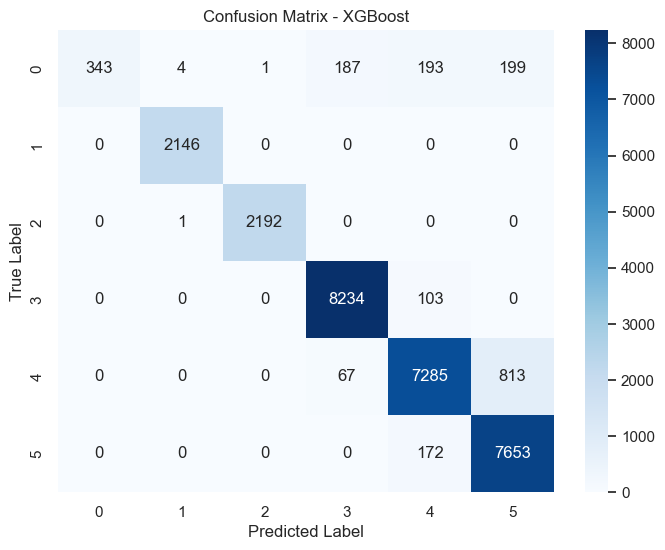

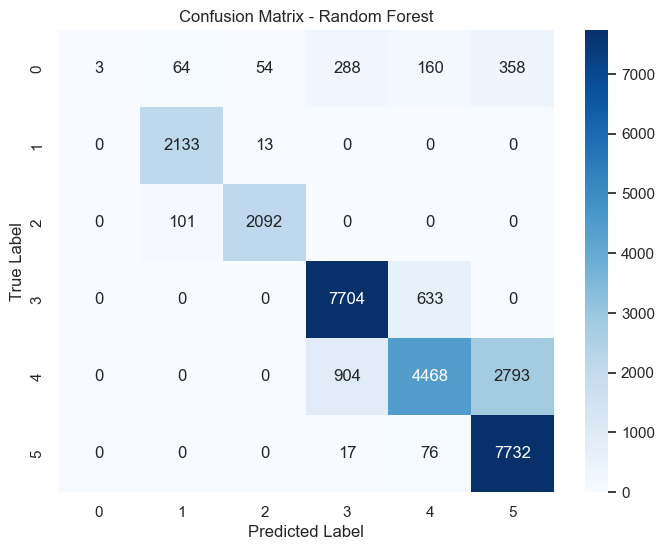

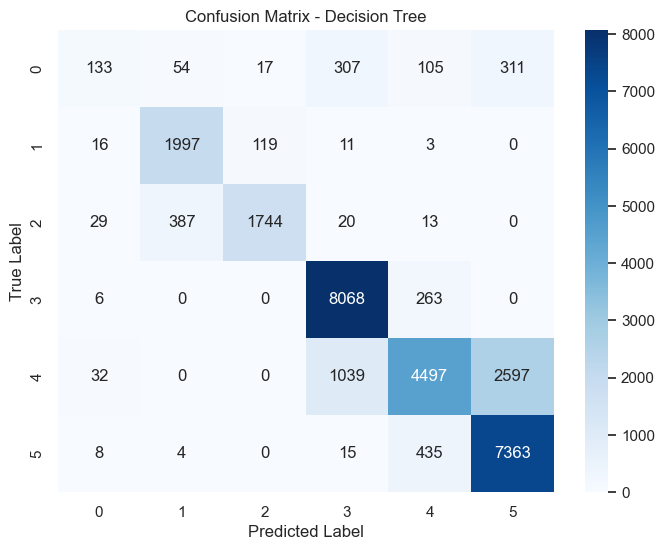

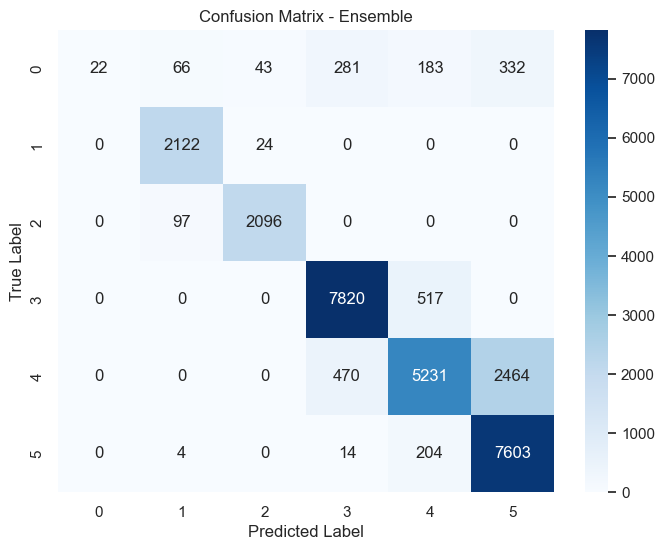

In [615]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Create a function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

# Plot confusion matrix for each model
plot_confusion_matrix(y_train, y_prep, 'XGBoost')
plot_confusion_matrix(y_train, y_pred_rf, 'Random Forest')
plot_confusion_matrix(y_train, y_pred_dt, 'Decision Tree')
plot_confusion_matrix(y_train, y_pred_ensemble, 'Ensemble')

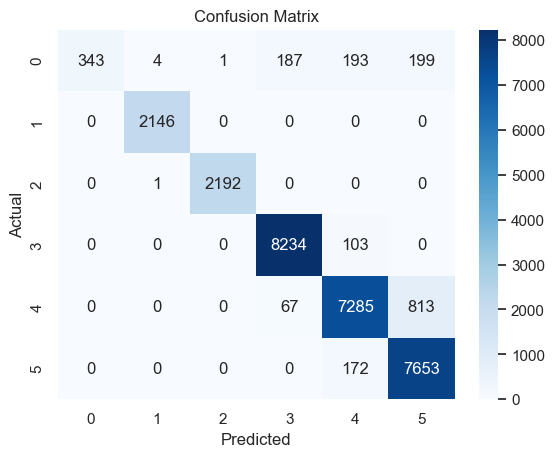

In [616]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Confusion matrix
cm = confusion_matrix(y_train, y_prep)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [617]:
y_prep

array([4, 3, 3, ..., 3, 4, 5])

In [618]:
y_pred_rf

array([5, 3, 3, ..., 3, 5, 5])

In [619]:
y_pred_dt

array([4, 3, 3, ..., 3, 5, 5])

In [620]:
y_pred_ensemble

array([4, 3, 3, ..., 3, 5, 5])

In [621]:
y_prep = model.predict(x_train)


In [622]:
import numpy as np

# Assuming y_pred contains the predicted values (0 or 1)
churn_score = np.mean(y_pred_proba) * 100  # Percentage of churned customers

print(f"Churn Score: {churn_score:.2f}%")


Churn Score: 6.82%


In [623]:
# Save XGBoost model
xg.save_model("models.json")

# Load XGBoost model
from xgboost import XGBClassifier
loaded_xg = XGBClassifier()
loaded_xg.load_model("models.json")  # Use `.json` instead of `.txt`


In [624]:
import pickle

accuracies = {
    "Random Forest": 100.00,
    "Decision Tree": 96.87,
    "XGBoost": 94.12,
    "Ensemble": 100.00
}

with open("model_accuracies.pkl", "wb") as f:
    pickle.dump(accuracies, f)


In [625]:
import os
print("random_forest_file:", os.path.getsize('random_forest_model.pkl') / (1024 * 1024), "MB")
print("ensemble_file:", os.path.getsize('voting_classifier_model.pkl') / (1024 * 1024), "MB")

random_forest_file: 8.291111946105957 MB
ensemble_file: 25.36014461517334 MB


In [626]:

import numpy as np
import plotly.graph_objects as go

# Ensure we use predict_proba() to get churn probability
if hasattr(model, "predict_proba"):
    y_pred_proba = model.predict_proba(x_test)[:, 1]  # Probability of churn class
else:
    raise ValueError("Model does not support predict_proba().")

# Compute Churn Score (average probability * 100 for percentage)
churn_score = np.mean(y_pred_proba) * 100  

# Print churn score
print(f"🔍 Churn Score (Likelihood of Churn): {churn_score:.2f}%")

# Create a gauge meter to visualize the churn score
fig = go.Figure(go.Indicator(
    mode="gauge+number",
    value=churn_score,
    title={'text': "Churn Score (%)"},
    gauge={'axis': {'range': [0, 100]},
           'bar': {'color': "red" if churn_score > 50 else "green"},
           'steps': [
               {'range': [0, 30], 'color': "lightgreen"},
               {'range': [30, 60], 'color': "yellow"},
               {'range': [60, 100], 'color': "red"}]}
))

fig.show()


🔍 Churn Score (Likelihood of Churn): 6.82%
